In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the relevant datasets
vehicle_2015 = pd.read_csv('../data/vehicle_2015.csv')
accident_2015 = pd.read_csv('../data/accident_2015.csv')

C:\Users\Shaief\AppData\Local\Temp\ipykernel_13552\2742509379.py:2: DtypeWarning: Columns (41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_2015 = pd.read_csv('../data/vehicle_2015.csv')


In [3]:
# import the relevant datasets
vehicle_2015 = pd.read_csv('../data/vehicle_2015.csv')
accident_2015 = pd.read_csv('../data/accident_2015.csv')

C:\Users\Shaief\AppData\Local\Temp\ipykernel_13552\2742509379.py:2: DtypeWarning: Columns (41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_2015 = pd.read_csv('../data/vehicle_2015.csv')


In [4]:
# check which features have null values
print(vehicle_2015.columns[(vehicle_2015.isna().sum() > 0).tolist()])
print(accident_2015.columns[(accident_2015.isna().sum() > 0).tolist()])

Index(['vin_character_6', 'vin_character_7', 'vin_character_8',
       'vin_character_9', 'vin_character_10', 'vin_character_11',
       'vin_character_12'],
      dtype='object')
Index(['trafficway_identifier_2', 'work_zone',
       'related_factors_crash_level_1_name',
       'related_factors_crash_level_2_name',
       'related_factors_crash_level_3_name'],
      dtype='object')


In [5]:
# check which columns these datasets share
for col in vehicle_2015.columns.tolist():
    if col in accident_2015.columns.tolist():
        print(col)

state_number
consecutive_number
number_of_motor_vehicles_in_transport_mvit
day_of_crash
month_of_crash
hour_of_crash
minute_of_crash
first_harmful_event
first_harmful_event_name
manner_of_collision
timestamp_of_crash


In [6]:
# create a list of columns to drop based on preliminary analysis of the CSV files (done outside of coding using MS Excel)
cols_to_drop_vehicle = ['state_number',
                        'vehicle_number',
                        'first_harmful_event',
                        'manner_of_collision',
                        'unit_type',
                        'registration_state',
                        'registered_vehicle_owner',
                        'vehicle_make',
                        'make_model_combined',
                        'body_type',
                        'vehicle_model_year',
                        'vehicle_identification_number_vin',
                        'vin_character_1',
                        'vin_character_2',
                        'vin_character_3',
                        'vin_character_4',
                        'vin_character_5',
                        'vin_character_6',
                        'vin_character_7',
                        'vin_character_8',
                        'vin_character_9',
                        'vin_character_10',
                        'vin_character_11',
                        'vin_character_12',
                        'mcid_issuing_authority',
                        'mcid_identification_number',
                        'motor_carrier_identification_number_mcid',
                        'gross_vehicle_weight_rating',
                        'vehicle_configuration',
                        'vehicle_configuration_name',
                        'cargo_body_type',
                        'hazardous_material_placard',
                        'hazardous_material_identification_number',
                        'hazardous_material_class_number',
                        'release_of_hazardous_material_from_the_cargo_compartment',
                        'special_use',
                        'special_use_name',
                        'emergency_motor_vehicle_use',
                        'travel_speed',
                        'vehicle_removal',
                        'driver_presence',
                        'drivers_zip_code',
                        'non_cdl_license_status',
                        'commercial_motor_vehicle_license_status',
                        'license_compliance_with_class_of_vehicle',
                        'driver_height',
                        'driver_weight',
                        'month_of_first_crash_suspension_or_conviction',
                        'year_of_first_crash_suspension_or_conviction',
                        'month_of_last_crash_suspension_or_conviction',
                        'year_of_last_crash_suspension_or_conviction',
                        'roadway_surface_condition',
                        'critical_event_precrash',
                        'attempted_avoidance_maneuver',
                        'attempted_avoidance_maneuver_name',
                        'crash_type',
                        'timestamp_of_crash']
                   
cols_to_drop_accident = ['state_number',
                         'number_of_vehicle_forms_submitted_all',
                         'number_of_motor_vehicles_in_transport_mvit',
                         'number_of_forms_submitted_for_persons_in_motor_vehicles',
                         'county',
                         'city',
                         'day_of_crash',
                         'month_of_crash',
                         'year_of_crash',
                         'hour_of_crash',
                         'minute_of_crash',
                         'land_use',
                         'functional_system',
                         'ownership',
                         'ownership_name',
                         'route_signing',
                         'trafficway_identifier',
                         'trafficway_identifier_2',
                         'milepoint',
                         'special_jurisdiction',
                         'special_jurisdiction_name',
                         'first_harmful_event',
                         'first_harmful_event_name',
                         'manner_of_collision',
                         'relation_to_junction_specific_location',
                         'work_zone',
                         'relation_to_trafficway',
                         'light_condition_name',
                         'atmospheric_conditions_1',
                         'atmospheric_conditions_2',
                         'atmospheric_conditions',
                         'school_bus_related',
                         'rail_grade_crossing_identifier',
                         'hour_of_notification',
                         'minute_of_notification',
                         'hour_of_arrival_at_scene',
                         'minute_of_arrival_at_scene',
                         'hour_of_ems_arrival_at_hospital',
                         'minute_of_ems_arrival_at_hospital',
                         'related_factors_crash_level_1',
                         'related_factors_crash_level_2',
                         'related_factors_crash_level_3',
                         'timestamp_of_crash']

In [7]:
# drop the columns
vehicle_2015_formatted = vehicle_2015.drop(cols_to_drop_vehicle, axis=1)
accident_2015_formatted = accident_2015.drop(cols_to_drop_accident, axis=1)

In [8]:
display(vehicle_2015_formatted.head())
display(accident_2015_formatted.head())

consecutive_number  number_of_motor_vehicles_in_transport_mvit  \
0              240247                                           3   
1              470149                                           2   
2               80369                                           2   
3              320119                                           9   
4              470078                                           1   

   number_of_occupants  day_of_crash  month_of_crash  hour_of_crash  \
0                    1             3               9             17   
1                    2            11               3             23   
2                    1            21               9             15   
3                    2             6               2             15   
4                    1            14               2              9   

   minute_of_crash    first_harmful_event_name hit_and_run  \
0               46  Motor Vehicle in Transport          No   
1               18  Motor Vehicle in Transport          No   
2               41  Motor Vehicle in Transport          No   
3               13  Motor Vehicle in Transport          No   
4               13        Tree (Standing Only)          No   

  registration_state_name  ... roadway_surface_condition_name  \
0                Virginia  ...                            Wet   
1               Tennessee  ...                            Wet   
2                Colorado  ...                            Dry   
3                  Nevada  ...                            Dry   
4               Tennessee  ...                            Dry   

  traffic_control_device  traffic_control_device_functioning  \
0                      0                         No Controls   
1                     20         Device Functioning Properly   
2                      2         Device Functioning Properly   
3                      2         Device Functioning Properly   
4                      0                         No Controls   

  pre_event_movement_prior_to_recognition_of_critical_event  \
0                                                 15          
1                                                 11          
2                                                  1          
3                                                  1          
4                                                 14          

                     critical_event_precrash_name  \
0  Over the Lane Line on Left Side of Travel Lane   
1                        Turning Left at Junction   
2    Crossing Over (Passing Through) Intersection   
3    Crossing Over (Passing Through) Intersection   
4      Off the Edge of the Road on the Right Side   

                      pre_impact_stability pre_impact_location  \
0               Precrash Stability Unknown                   2   
1                                 Tracking                   1   
2                                 Tracking                   1   
3                                 Tracking                   1   
4  Skidding Laterally – Clockwise Rotation                   4   

                                     crash_type_name fatalities_in_vehicle  \
0  SAME TRAFFICWAY, SAME DIRECTION, CONFIGURATION...                     1   
1  CHANGING TRAFFICWAY, VEHICLE TURNING, CONFIGUR...                     1   
2  INTERSECTING PATHS (VEHICLE DAMAGE), CONFIGURA...                     1   
3  INTERSECTING PATHS (VEHICLE DAMAGE), CONFIGURA...                     0   
4  SINGLE DRIVER, CONFIGURATION A: RIGHT ROADSIDE...                     1   

   driver_drinking  
0         Drinking  
1         Drinking  
2      No Drinking  
3      No Drinking  
4      No Drinking  

[5 rows x 58 columns]

state_name  consecutive_number  number_of_parked_working_vehicles  \
0    Montana              300019                                  0   
1       Ohio              390099                                  0   
2       Utah              490123                                  0   
3      Texas              481184                                  1   
4     Oregon              410333                                  0   

   number_of_forms_submitted_for_persons_not_in_motor_vehicles  \
0                                                  0             
1                                                  0             
2                                                  0             
3                                                  0             
4                                                  0             

   number_of_persons_not_in_motor_vehicles_in_transport_mvit  \
0                                                  0           
1                                                  0           
2                                                  0           
3                                                  5           
4                                                  0           

   number_of_persons_in_motor_vehicles_in_transport_mvit  day_of_week  \
0                                                  7                7   
1                                                 15                7   
2                                                 28                3   
3                                                  5                4   
4                                                 14                3   

   national_highway_system land_use_name functional_system_name  ...  \
0                        1         Rural             Interstate  ...   
1                        1         Rural             Interstate  ...   
2                        1         Rural             Interstate  ...   
3                        1         Rural             Interstate  ...   
4                        1         Rural             Interstate  ...   

  relation_to_trafficway_name  light_condition  atmospheric_conditions_1_name  \
0                  On Roadway                1              Severe Crosswinds   
1                  On Roadway                1       Blowing Sand, Soil, Dirt   
2                  On Roadway                1       Blowing Sand, Soil, Dirt   
3                  On Roadway                1       Blowing Sand, Soil, Dirt   
4                  On Roadway                2       Blowing Sand, Soil, Dirt   

          atmospheric_conditions_2_name atmospheric_conditions_name  \
0              Blowing Sand, Soil, Dirt           Severe Crosswinds   
1  No Additional Atmospheric Conditions    Blowing Sand, Soil, Dirt   
2  No Additional Atmospheric Conditions    Blowing Sand, Soil, Dirt   
3  No Additional Atmospheric Conditions    Blowing Sand, Soil, Dirt   
4  No Additional Atmospheric Conditions    Blowing Sand, Soil, Dirt   

  related_factors_crash_level_1_name related_factors_crash_level_2_name  \
0                                NaN                                NaN   
1          Backup Due to Prior Crash                                NaN   
2                                NaN                                NaN   
3                                NaN                                NaN   
4                                NaN                                NaN   

  related_factors_crash_level_3_name  number_of_fatalities  \
0                                NaN                     1   
1                                NaN                     1   
2                                NaN                     1   
3                                NaN                     1   
4                                NaN                     1   

  number_of_drunk_drivers  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 27 c

In [9]:
# explore each feature for unique values
for col in vehicle_2015_formatted.columns:
    print('\n')
    print(vehicle_2015_formatted[col].value_counts())
    print(vehicle_2015_formatted[col].nunique())

for col in accident_2015_formatted.columns:
    print('\n')
    print(accident_2015_formatted[col].value_counts())
    print(accident_2015_formatted[col].nunique())



consecutive_number
260911    58
390096    31
390126    29
340244    19
420704    18
          ..
120983     1
370282     1
530298     1
130287     1
100121     1
Name: count, Length: 32538, dtype: int64
32538


number_of_motor_vehicles_in_transport_mvit
2     22872
1     18902
3      4920
4      1412
5       535
6       282
7       168
9        81
8        72
58       58
18       36
31       31
29       29
10       20
19       19
16       16
14       14
11       11
Name: count, dtype: int64
18


number_of_occupants
1     34132
2      9674
3      2837
4      1377
5       620
0       221
6       213
99      149
7       109
8        46
9        19
10       17
11        9
12        6
13        6
15        4
14        4
20        4
16        3
18        3
24        2
40        2
19        2
22        2
37        1
17        1
51        1
36        1
53        1
43        1
27        1
46        1
50        1
38        1
41        1
31        1
34        1
25        1
32        1
29       

In [10]:
# combine the two dataframes
df = vehicle_2015_formatted.merge(accident_2015_formatted,
                                  how='left',
                                  on='consecutive_number',
                                  suffixes=(),
                                  copy=True)

In [11]:
# drop the consecutive_number column since merging is complete
df.drop('consecutive_number', axis=1, inplace=True)

In [12]:
# create a dict containing columns and corresponding values in the columns that are to be removed from the dataframe
rows_to_remove = {'number_of_occupants': [99],
                  'hour_of_crash': [99],
                  'minute_of_crash': [99],
                  'first_harmful_event_name': ['Unknown'],
                  'manner_of_collision_name': ['Not Reported', 'Unknown'],
                  'hit_and_run': ['Unknown'],
                  'registration_state_name': ['Not Reported', 'Unknown'],
                  'registered_vehicle_owner_name': ['Unknown'],
                  'vehicle_make_name': ['Other Make', 'Unknown Make'],
                  'vehicle_trailing': ['Unknown'],
                  'cargo_body_type_name': ['Unknown'],
                  'bus_use': ['Unknown', 'Not Reported'],
                  'location_of_rollover': ['Unknown'],
                  'most_harmful_event': [99],
                  'related_factors_vehicle_level_1': [99],
                  'related_factors_vehicle_level_2': [99],
                  'previous_recorded_crashes': [98, 99, 998],
                  'previous_recorded_suspensions_and_revocations': [99, 998],
                  'previous_dwi_convictions': [99, 998],
                  'previous_speeding_convictions': [99, 998],
                  'previous_other_moving_violation_convictions': [99, 998],
                  'speeding_related': ['Unknown', 'No Driver Present/Unknown if Driver Present'],
                  'related_factors_driver_level_1': [99],
                  'related_factors_driver_level_2': [99],
                  'related_factors_driver_level_3': [99],
                  'related_factors_driver_level_4': [99],
                  'trafficway_description': ['Not Reported', 'Unknown'],
                  'speed_limit': [98, 99],
                  'roadway_alignment': ['Not Reported', 'Unknown'],
                  'roadway_grade': ['Unknown'],
                  'roadway_surface_type': ['Unknown'],
                  'roadway_surface_condition_name': ['Not Reported', 'Unknown'],
                  'traffic_control_device': [98, 99],
                  'traffic_control_device_functioning': ['Not Reported', 'Unknown'],
                  'pre_event_movement_prior_to_recognition_of_critical_event': [98, 99],
                  'critical_event_precrash_name': ['Unknown'],
                  'pre_impact_stability': ['No Driver Present/Unknown if Driver Present'],
                  'pre_impact_location': [0, 9],
                  'crash_type_name': ['MISCELLANEOUS, CONFIGURATION M: BACKING, ETC., Unknown Crash Type'],
                  'national_highway_system': [9],
                  'land_use_name': ['Not Reported', 'Unknown'],
                  'functional_system_name': ['Trafficway Not in State Inventory', 'Not Reported', 'Unknown'],
                  'route_signing_name': ['Unknown'],
                  'latitude': [77.7777, 88.8888, 99.9999],
                  'longitude': [777.7777, 888.8888, 999.9999],
                  'relation_to_junction_within_interchange_area': ['Not Reported', 'Unknown'],
                  'relation_to_junction_specific_location_name': ['Not Reported', 'Unknown'],
                  'type_of_intersection': ['Unknown', 'Not Reported'],
                  'relation_to_trafficway_name': ['Not Reported', 'Unknown'],
                  'light_condition': [7, 8, 9],
                  'atmospheric_conditions_1_name': ['Other', 'Not Reported', 'Unknown'],
                  'atmospheric_conditions_2_name': ['Other', 'Not Reported', 'Unknown'],
                  'atmospheric_conditions_name': ['Other', 'Not Reported', 'Unknown'],
                  'related_factors_crash_level_1_name': ['Unknown'],
                  'related_factors_crash_level_2_name': ['Unknown'],
                  'related_factors_crash_level_3_name': ['Unknown']}

In [13]:
# drop the rows that have values that will not be used for modeling
for key, values in rows_to_remove.items():
    df.drop(df.loc[df[key].isin(values)].index, inplace=True)

In [14]:
# add minutes to the hour column, then drop
df['hour_of_crash'] = df['hour_of_crash'] + (df['minute_of_crash'] / 60)
df.drop('minute_of_crash', axis=1, inplace=True)

In [15]:
# convert the categorical values of the lighting conditions to an ordinal one
# multiply all values by 10 to avoid any overlapping

df['light_condition'] = df['light_condition'] * 10

light_dict = {20: 5,
              60: 4,
              30: 3,
              50: 2,
              40: 1,
              10: 0}

for key, value in light_dict.items():
    df.loc[df['light_condition'] == key, 'light_condition'] = value

In [16]:
# change the values for days of the week
df['day_of_week'] = df['day_of_week'] - 1
df[df['day_of_week'] == 0]['day_of_week'] = 7

C:\Users\Shaief\AppData\Local\Temp\ipykernel_13552\784363194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['day_of_week'] == 0]['day_of_week'] = 7


<a id='bar_graph'></a>

## Bar Graphs

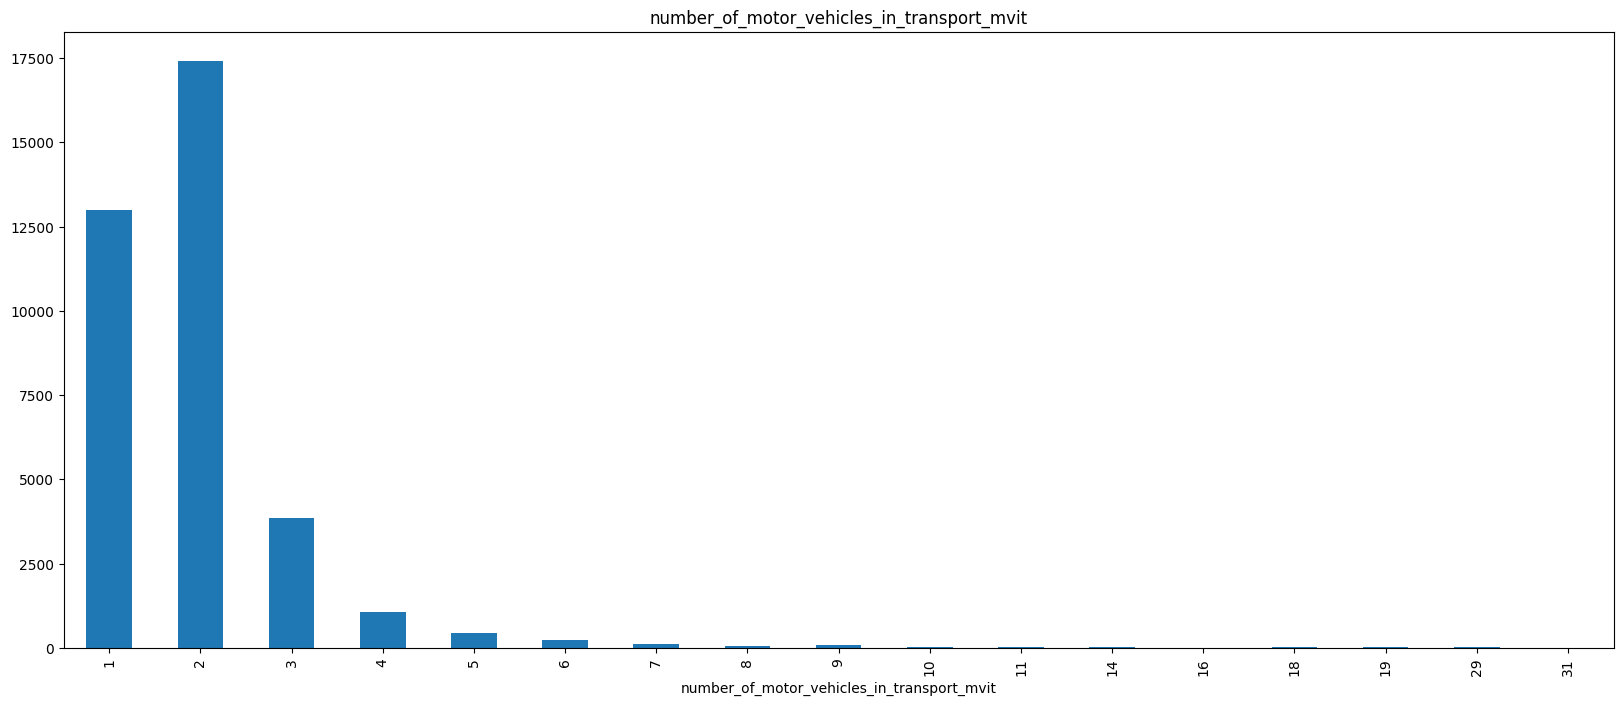

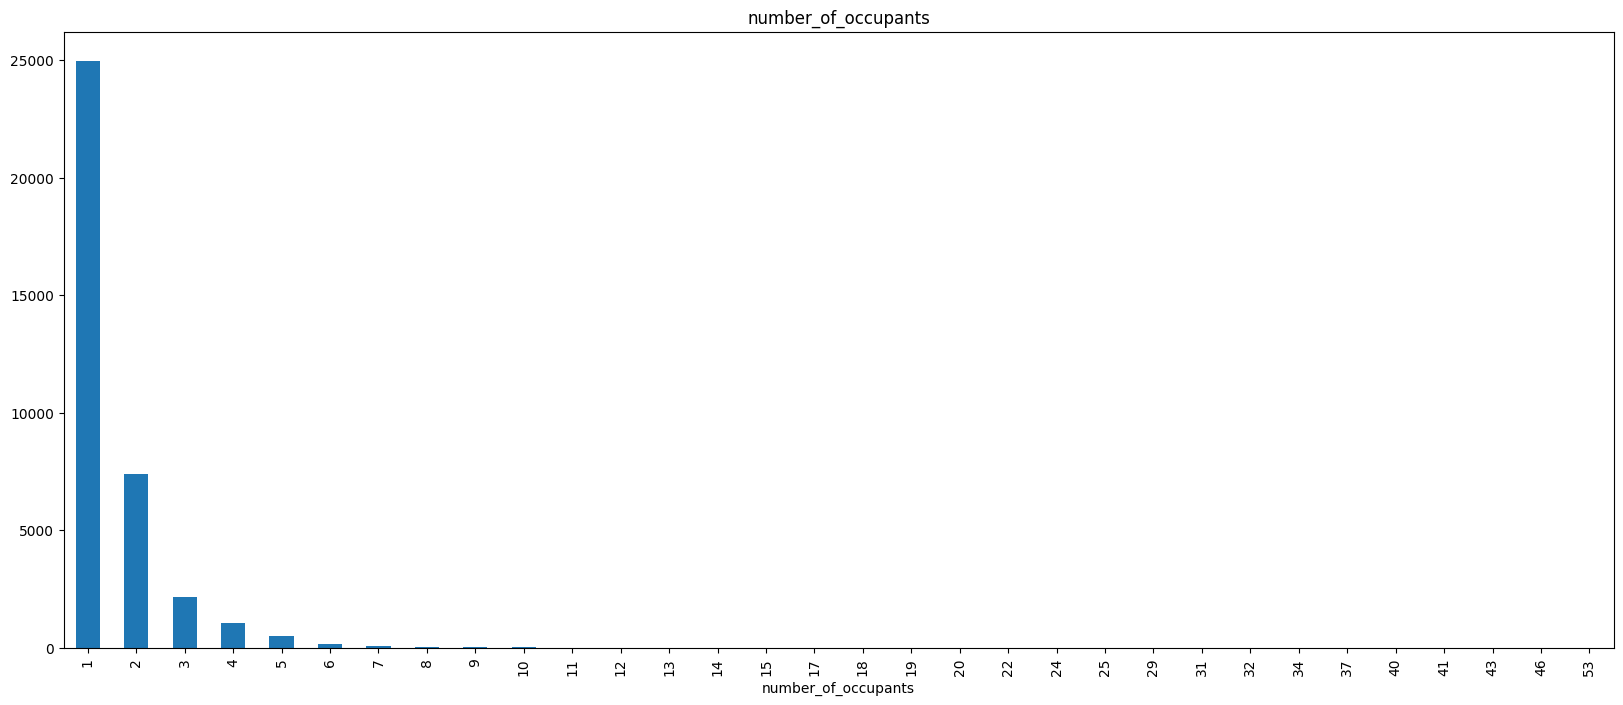

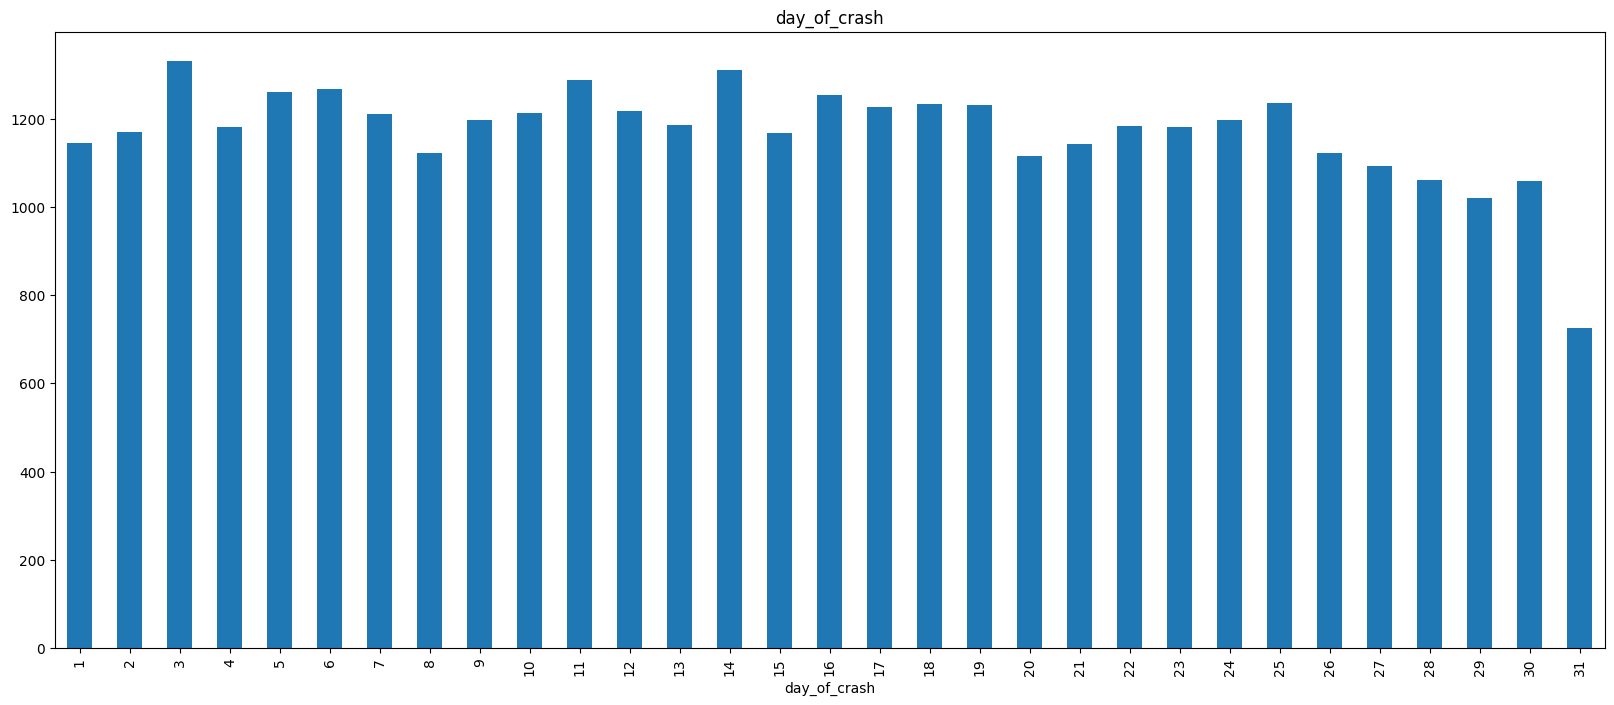

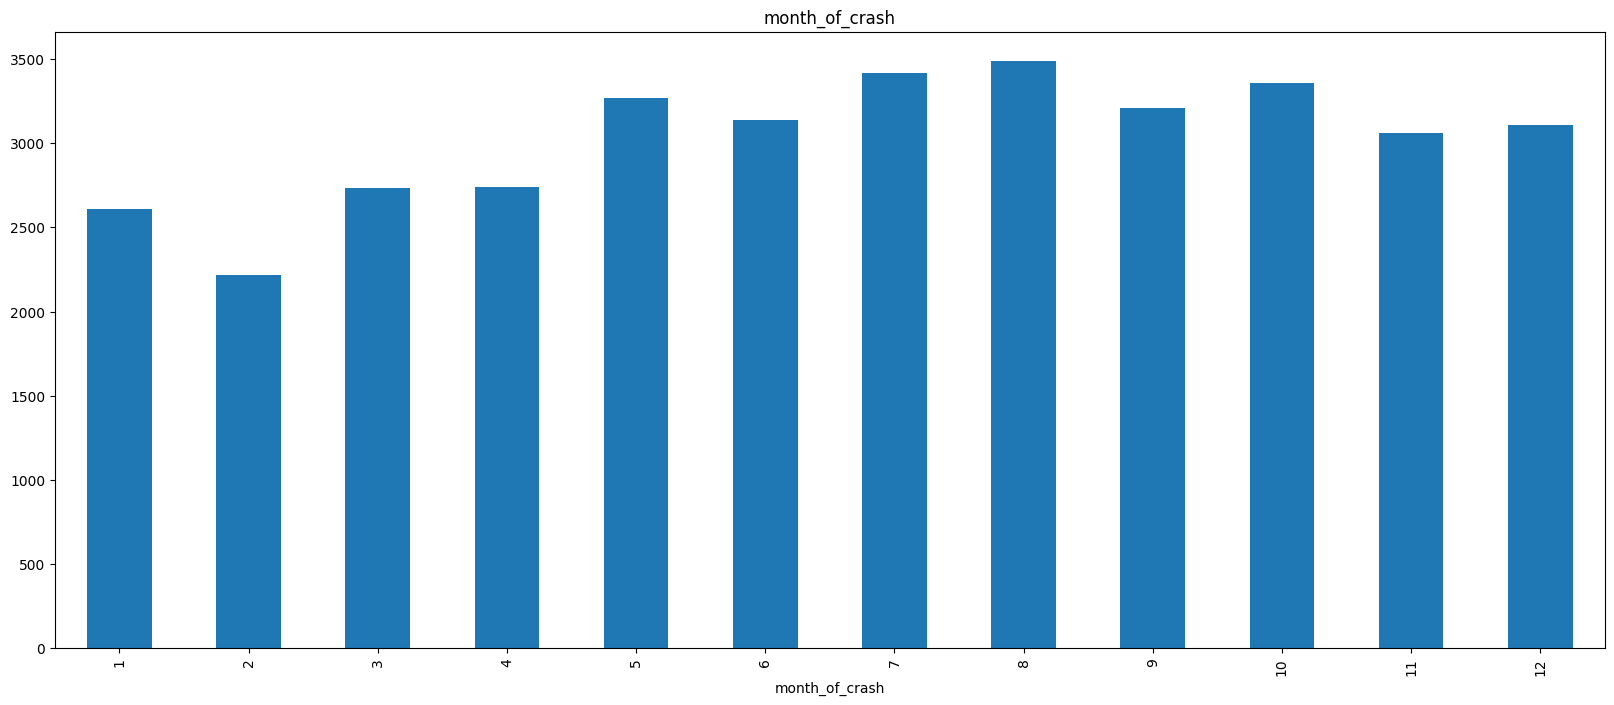

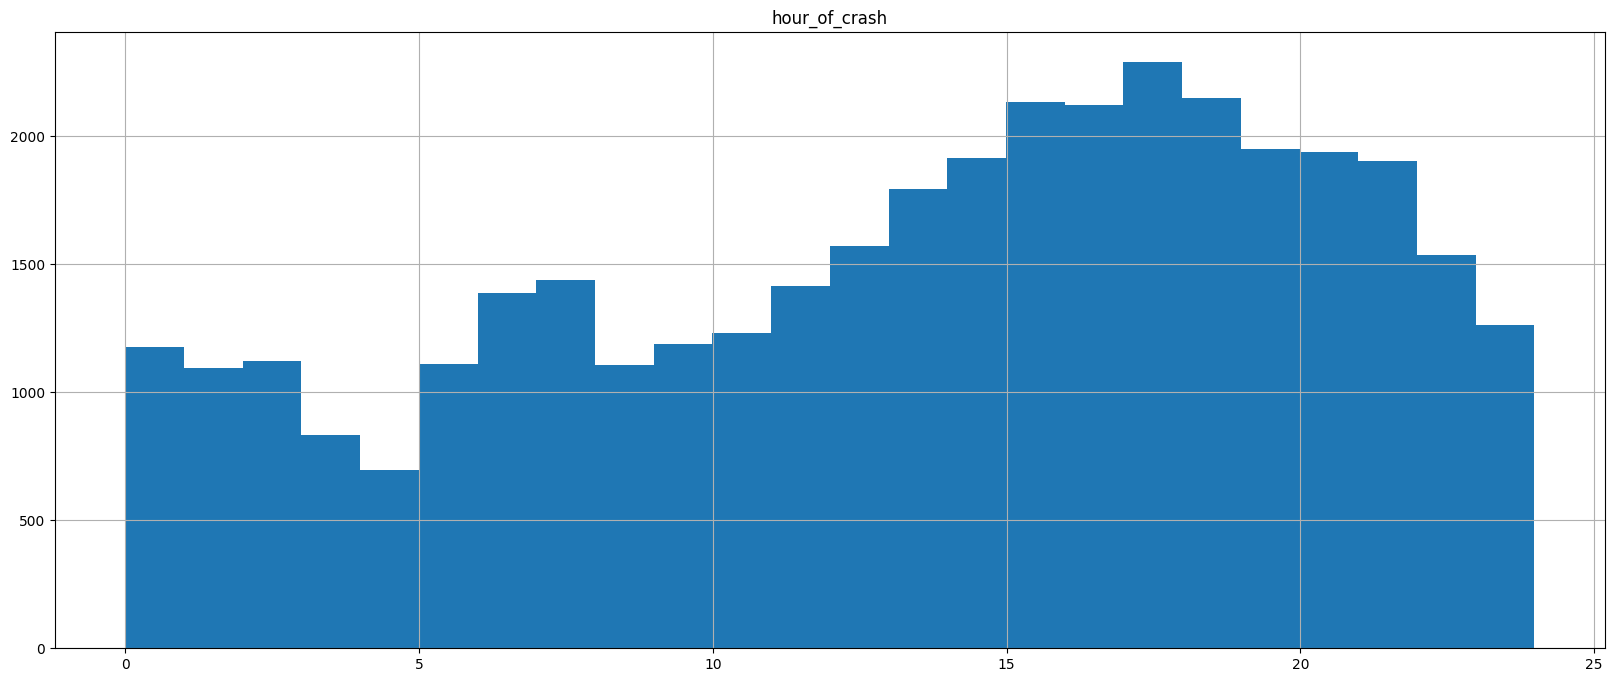

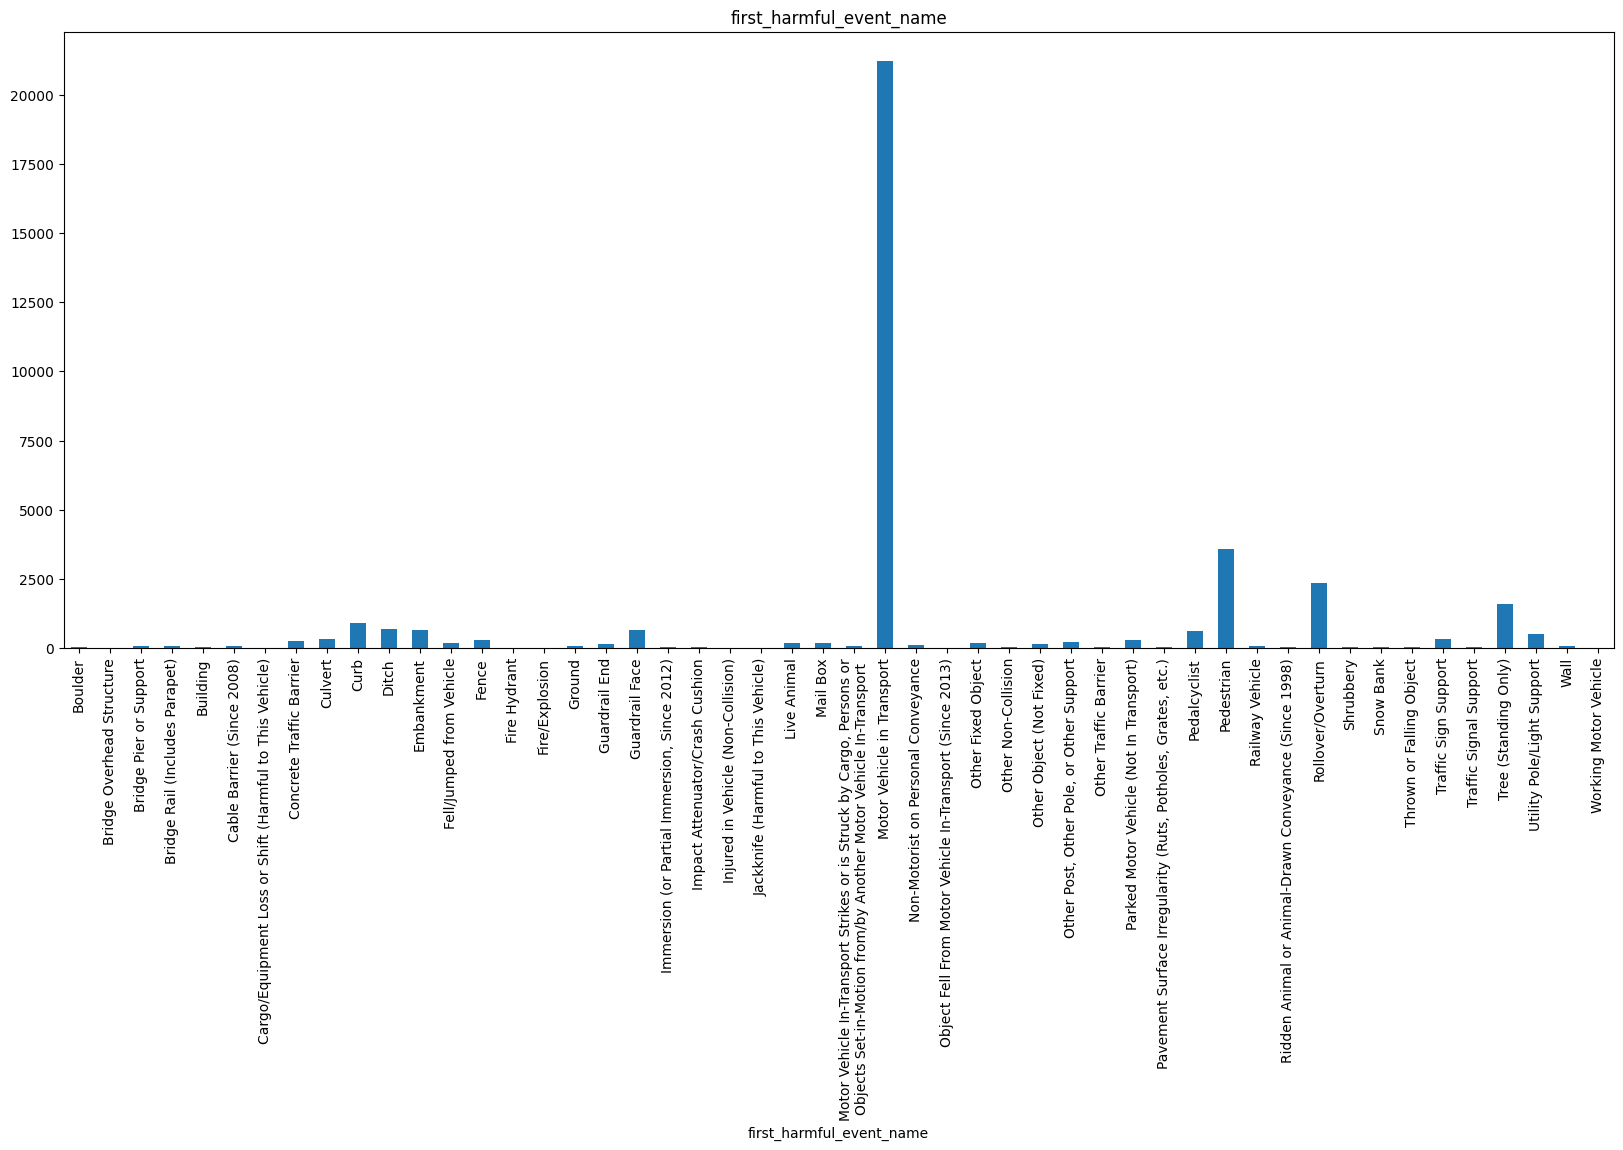

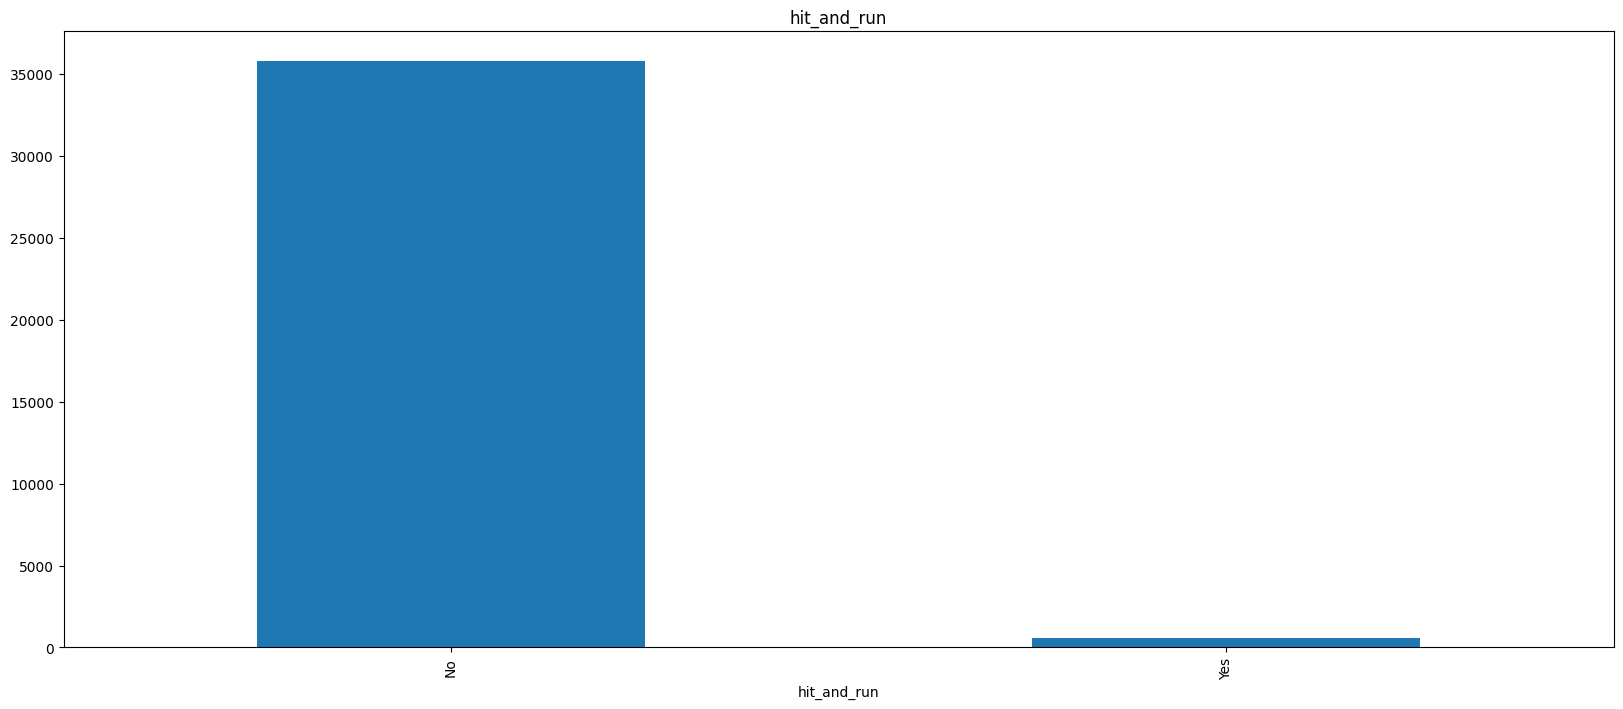

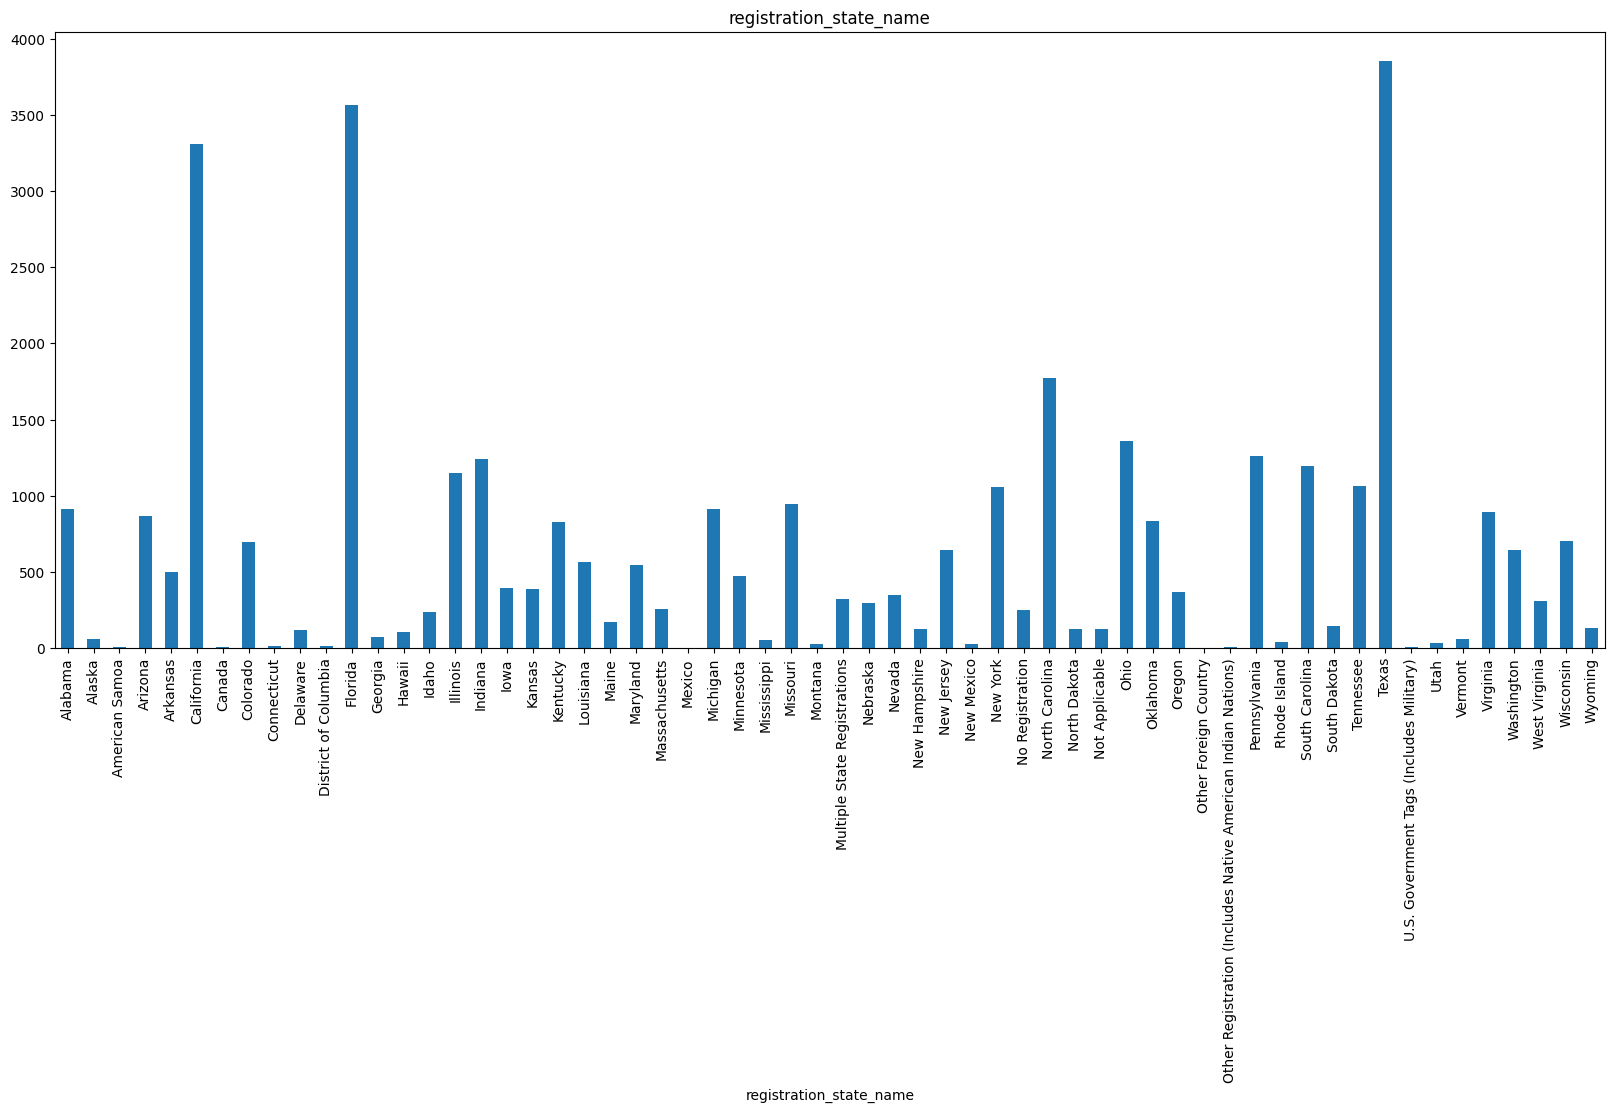

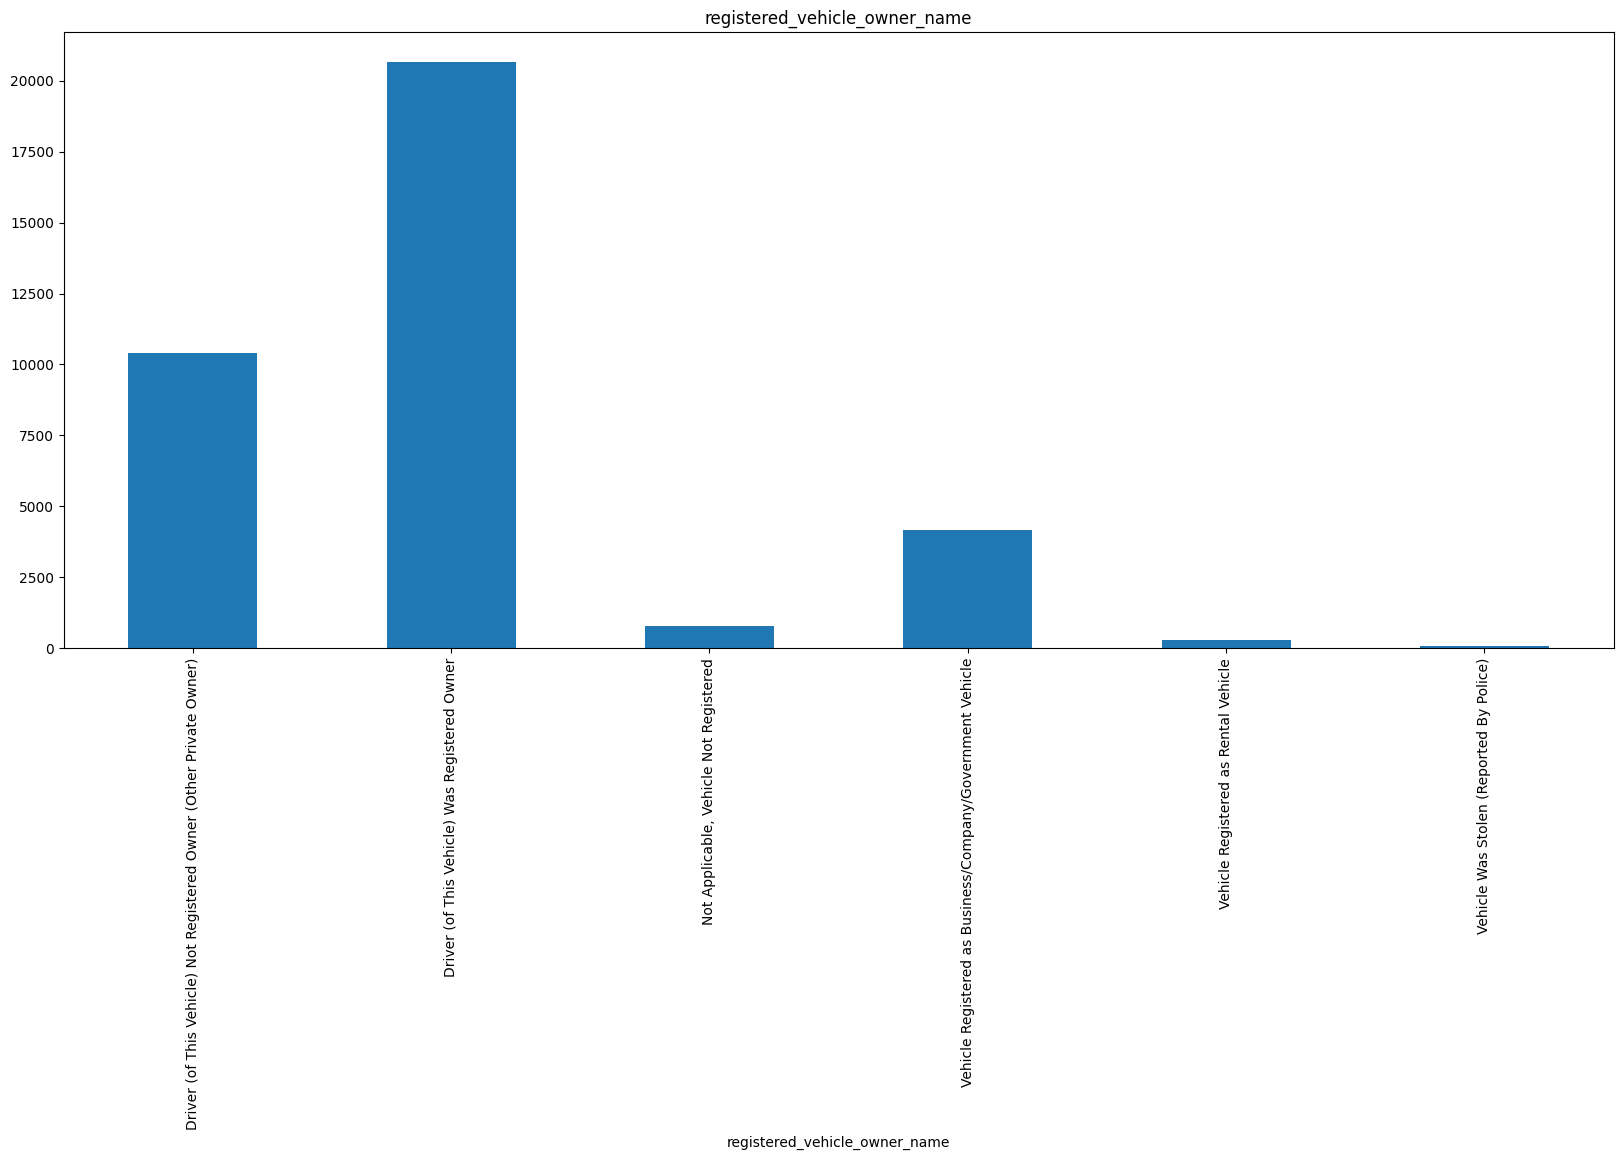

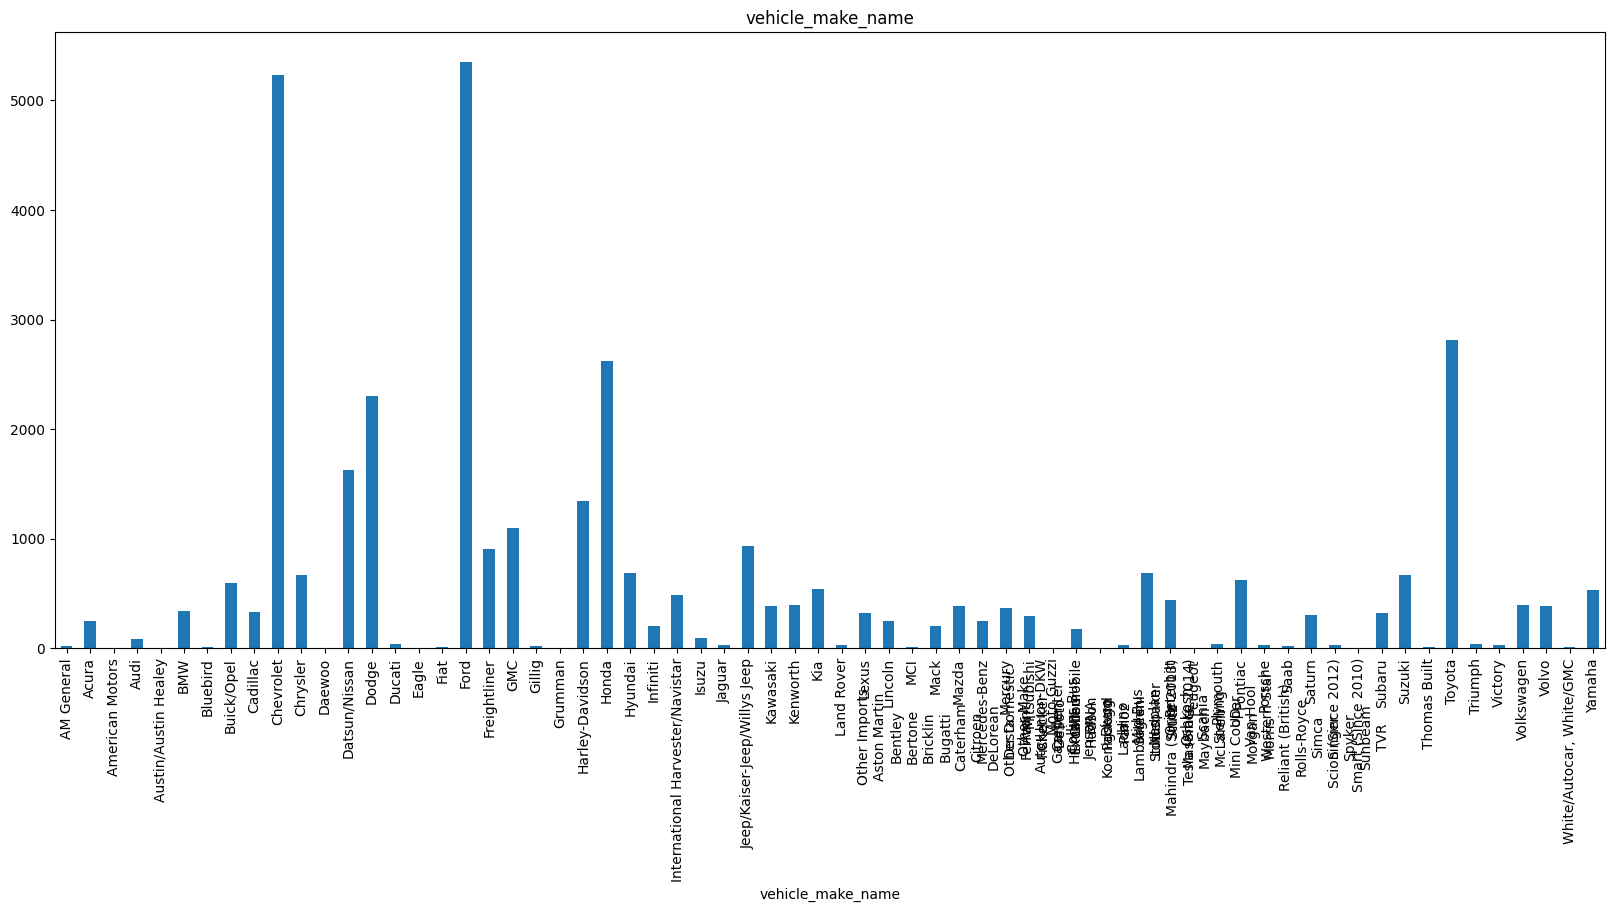

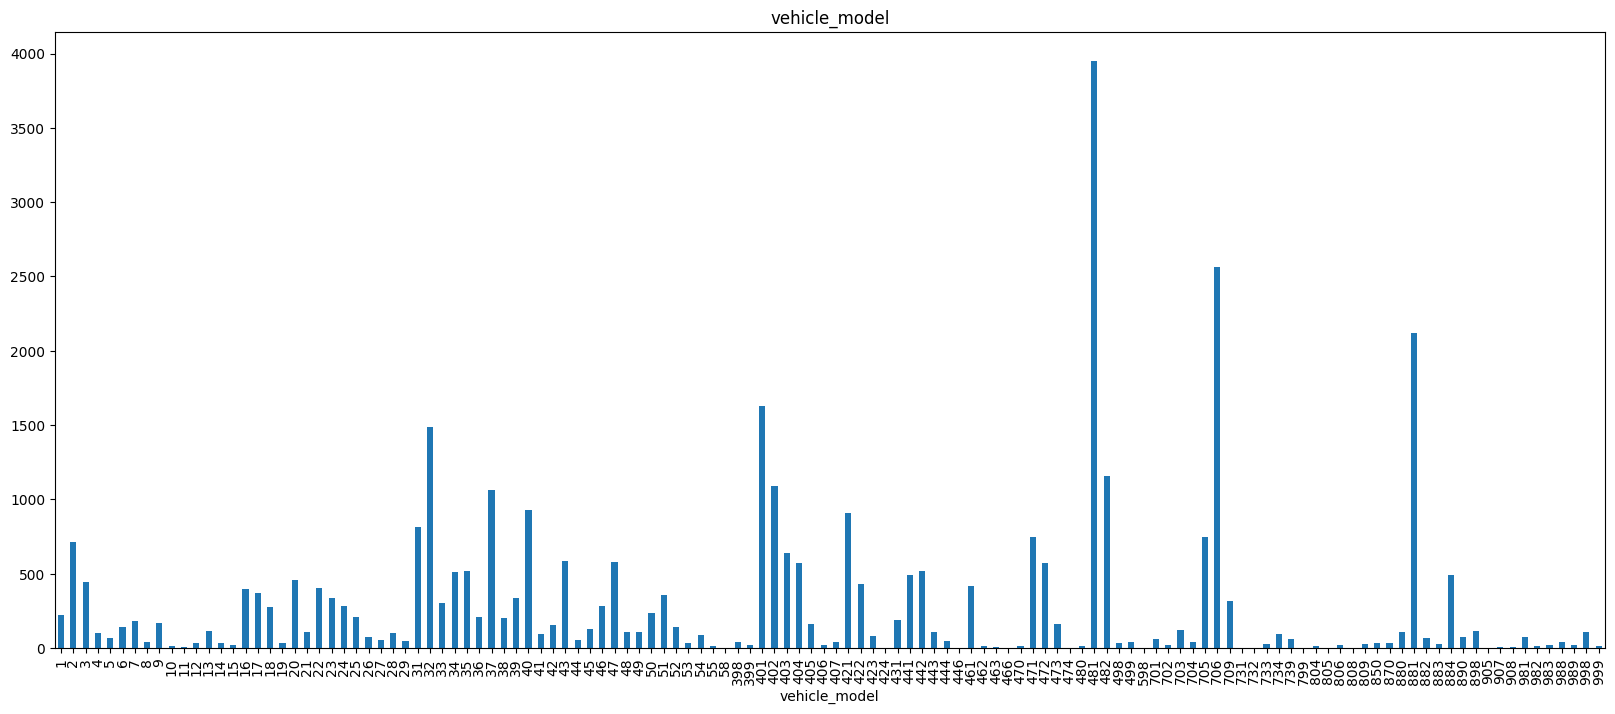

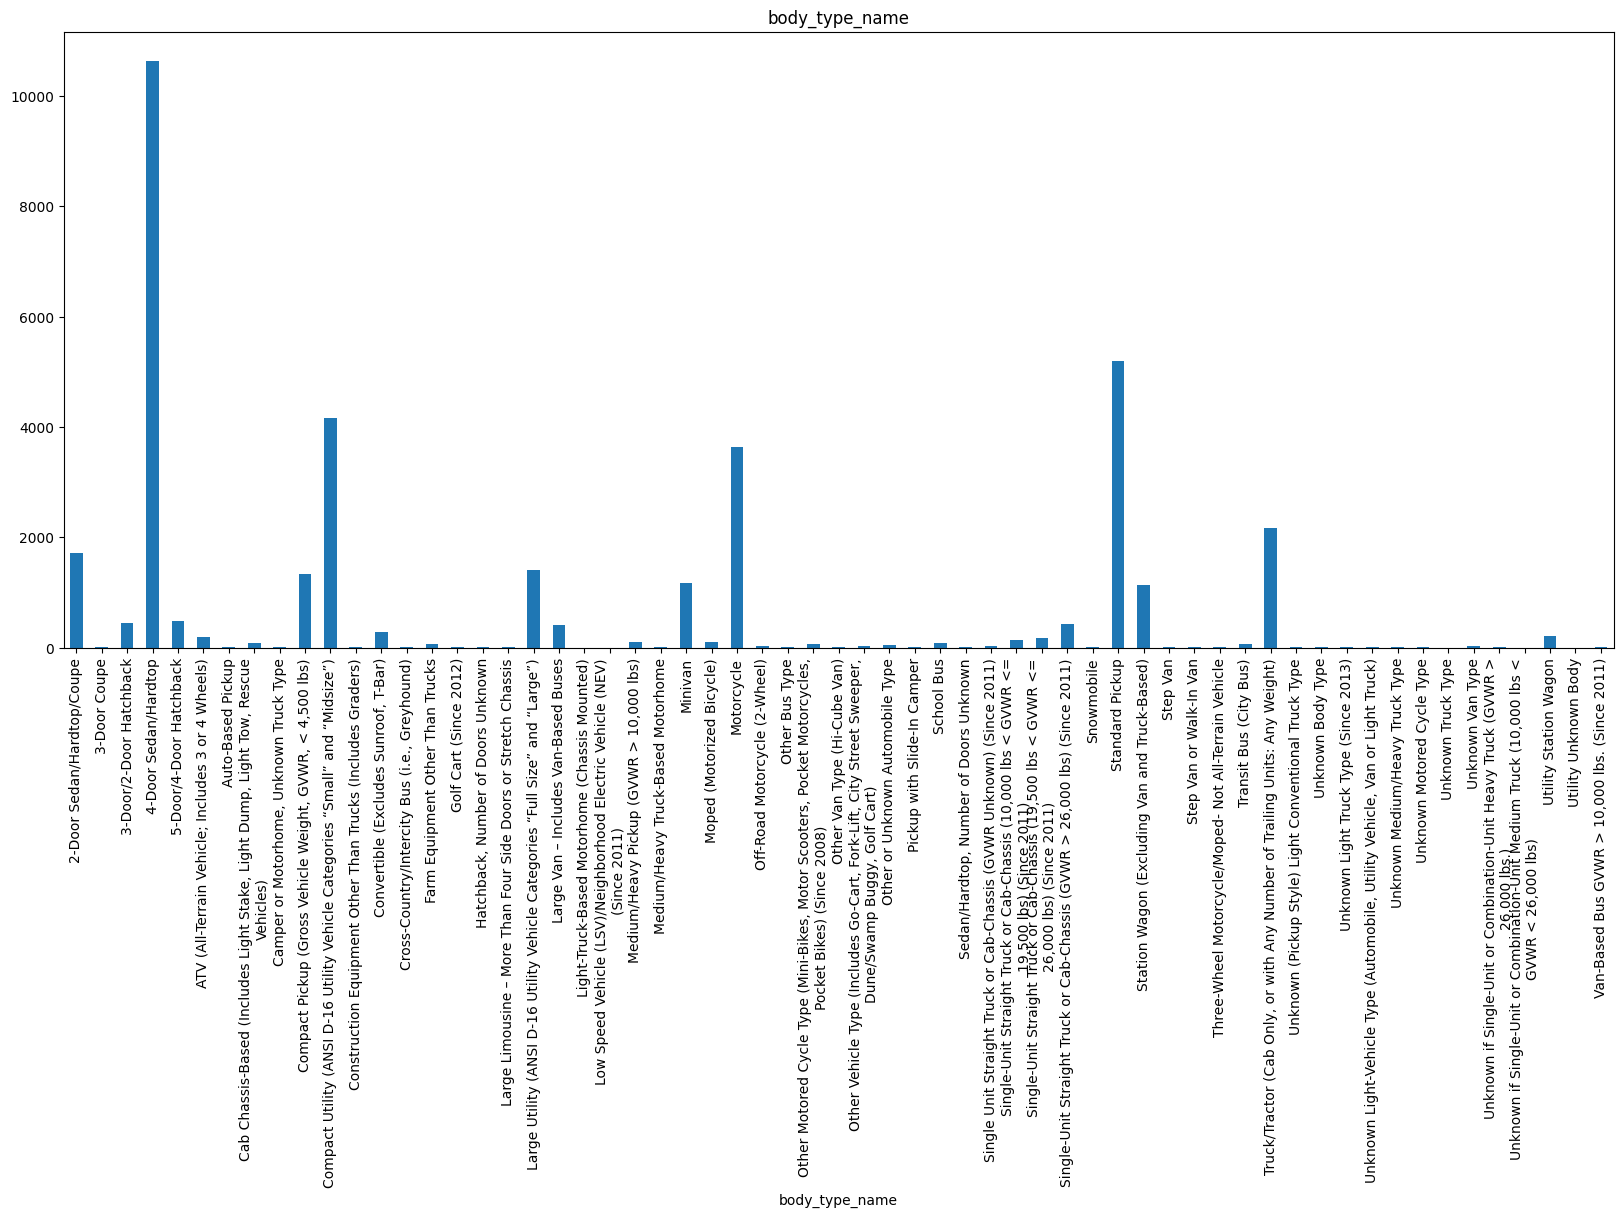

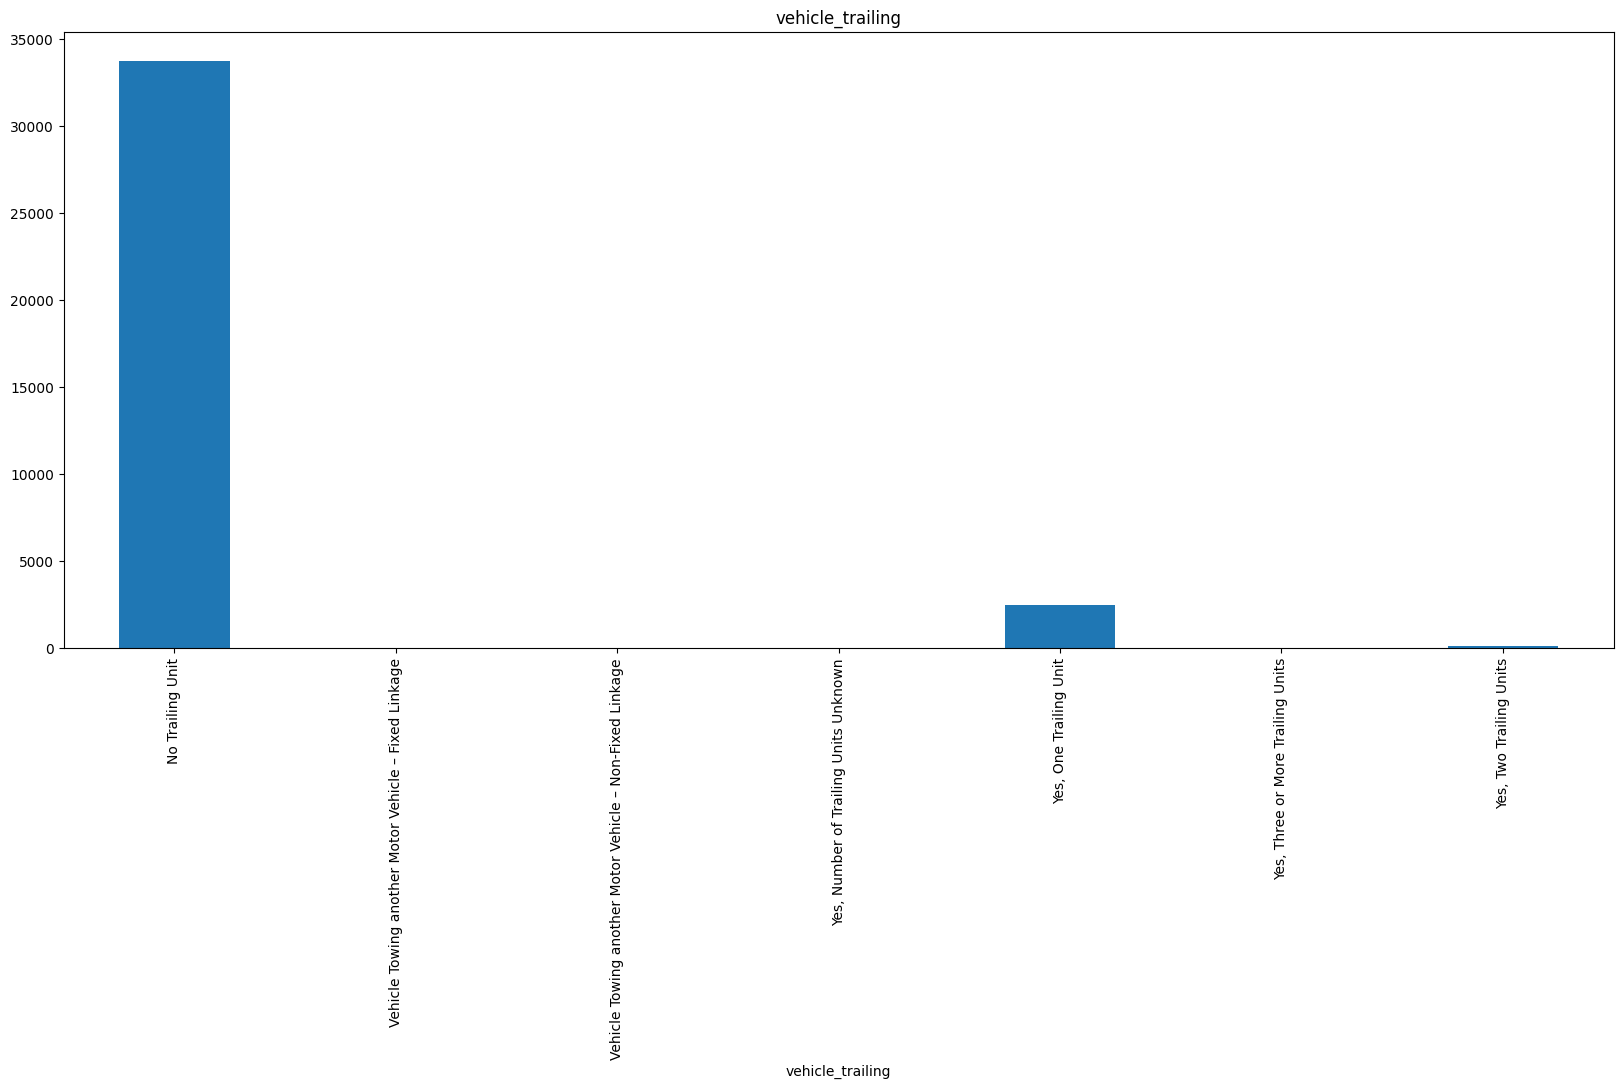

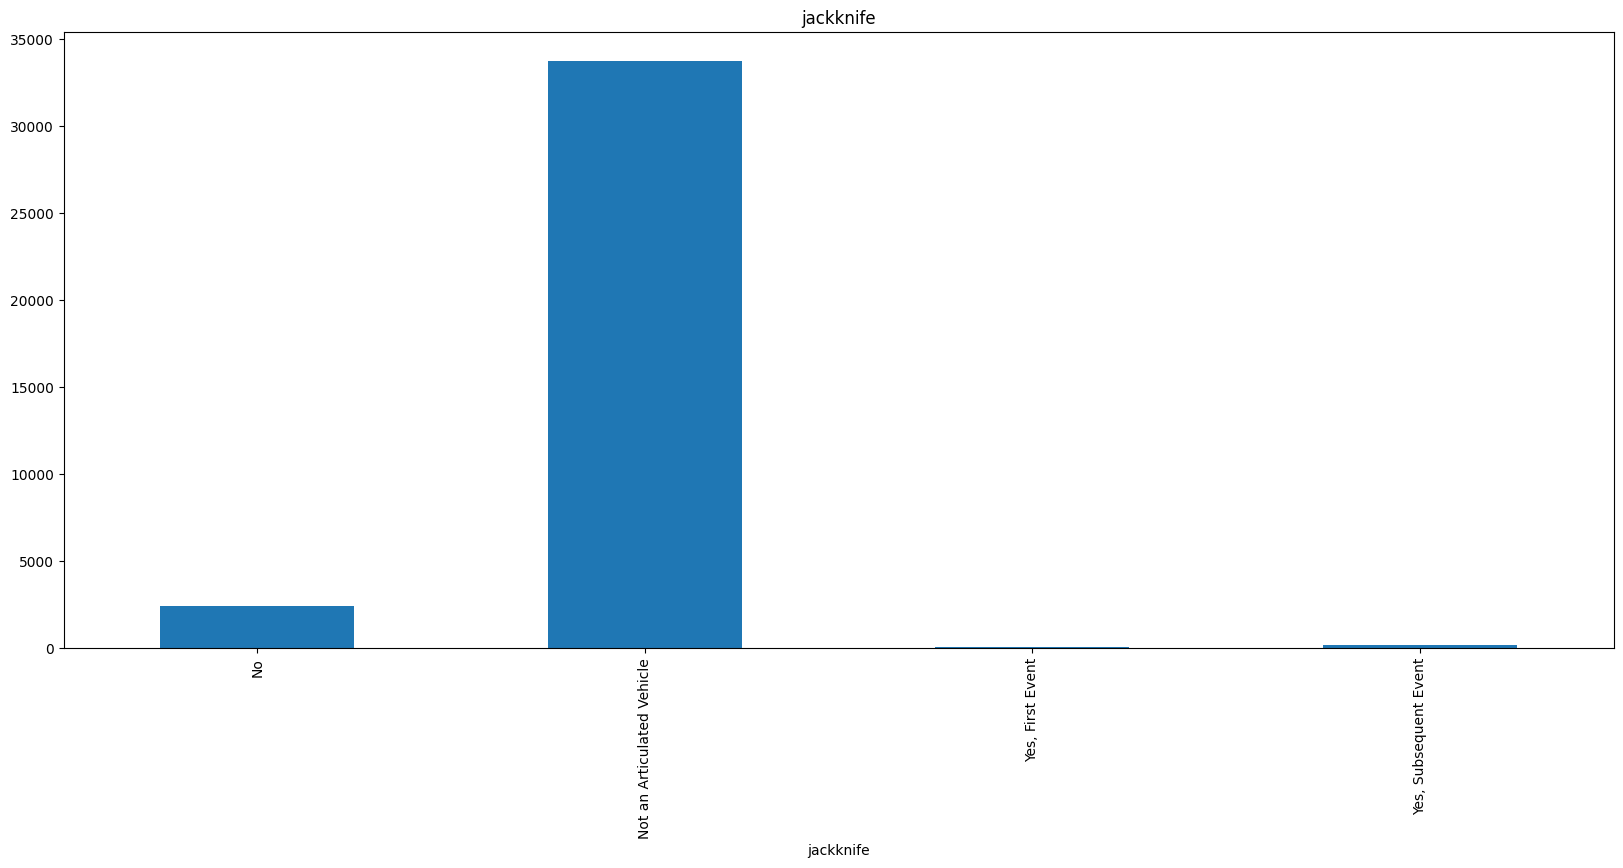

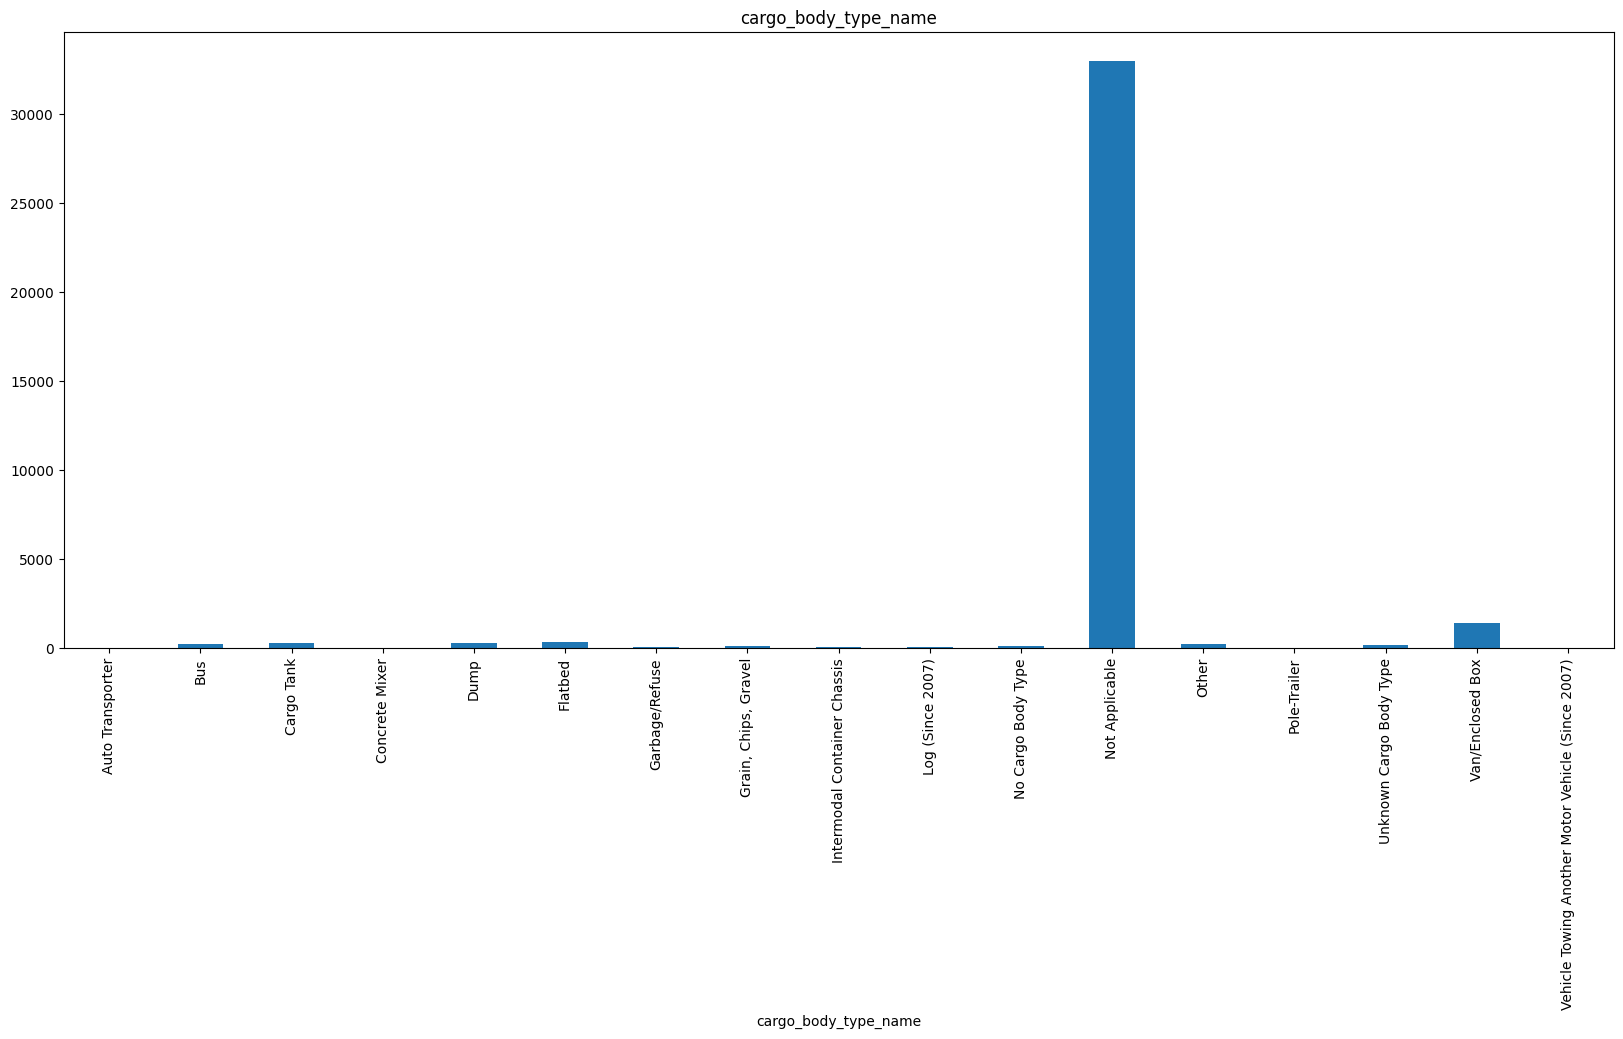

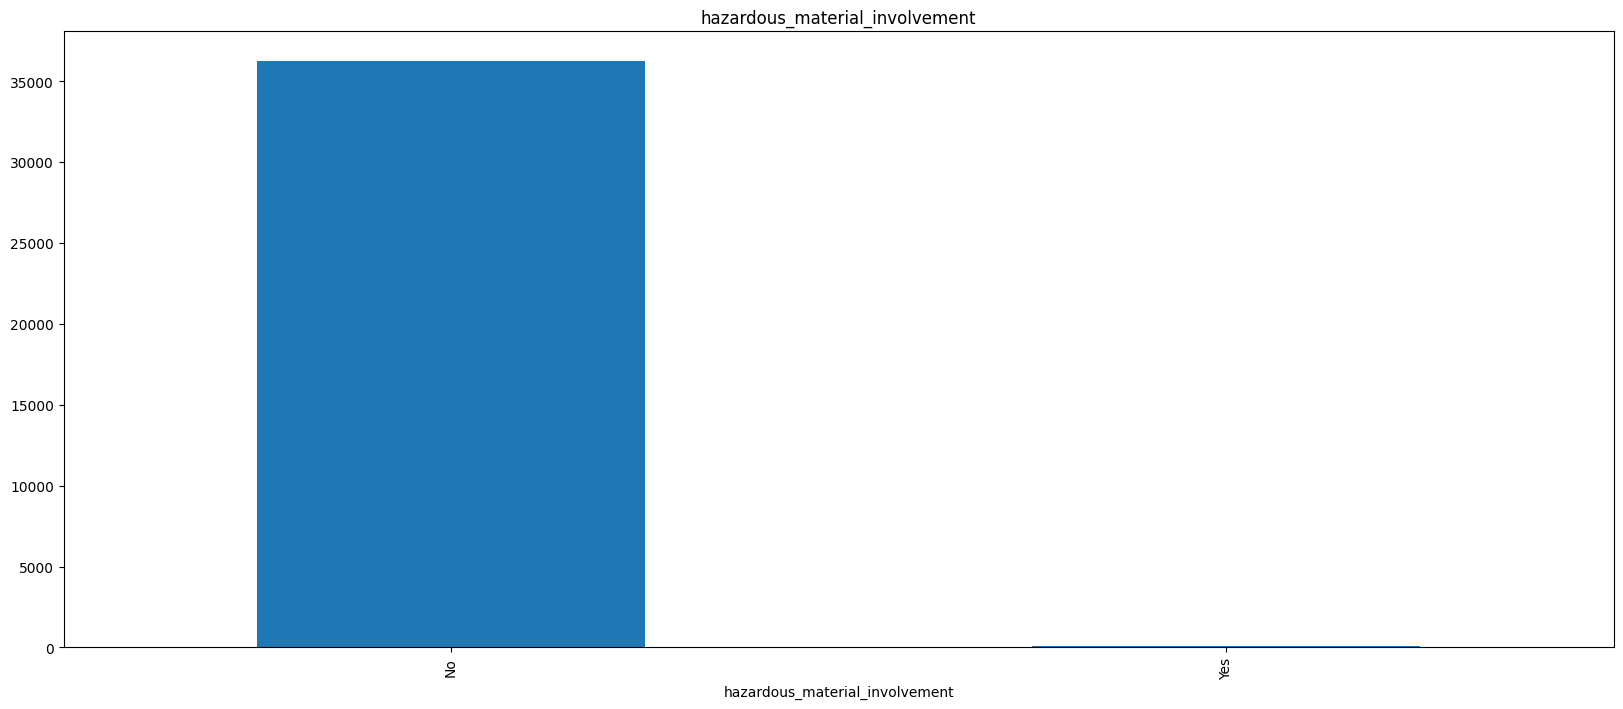

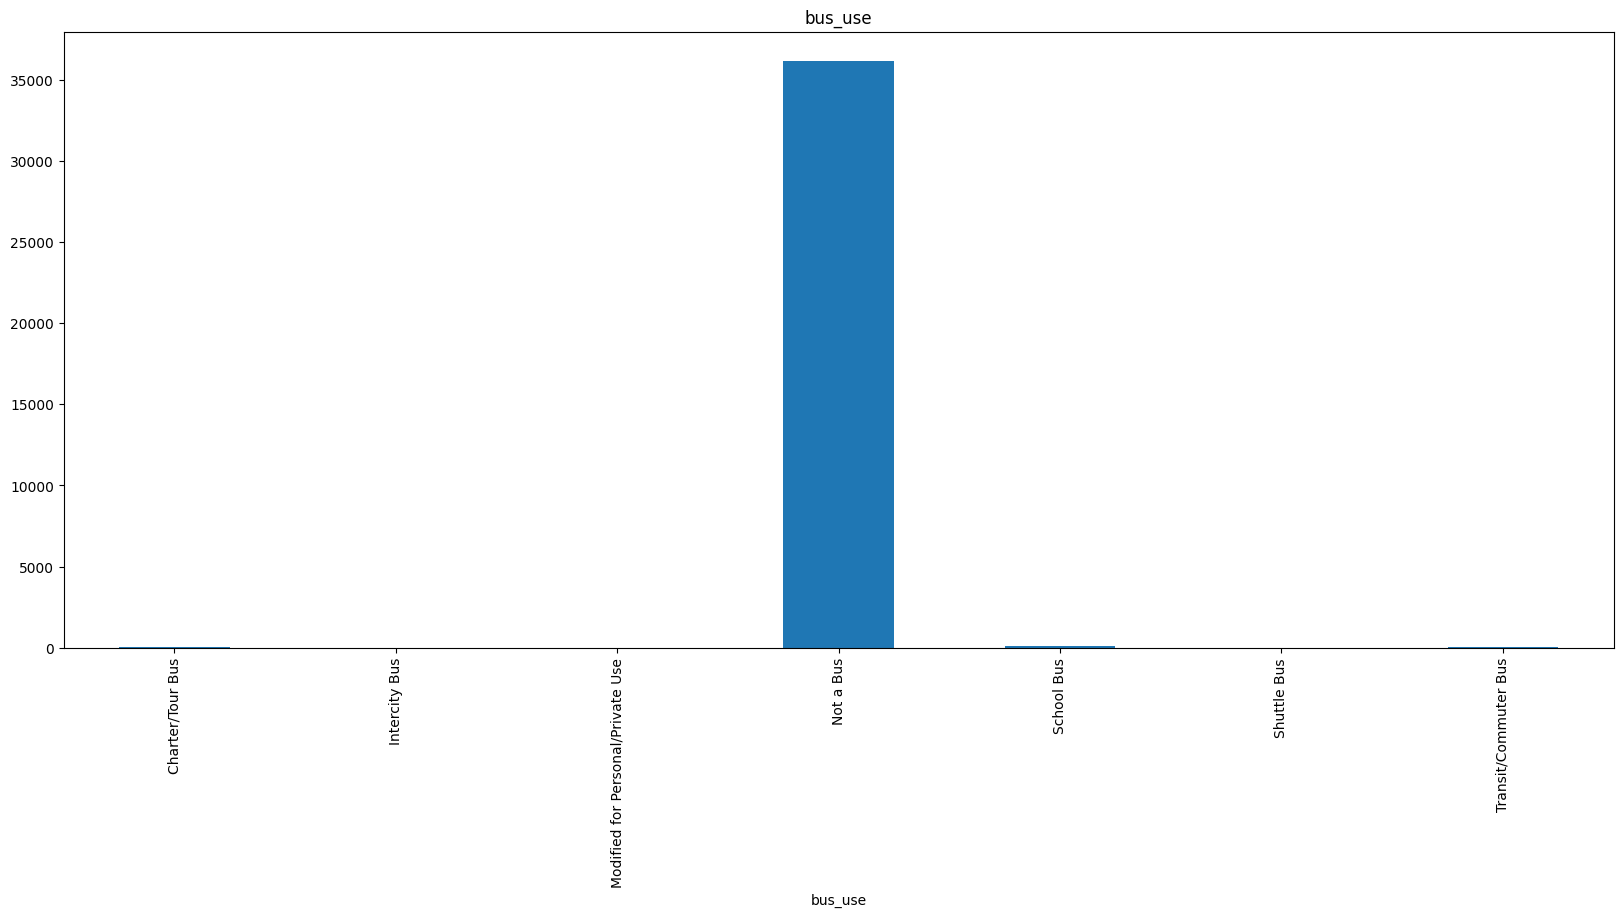

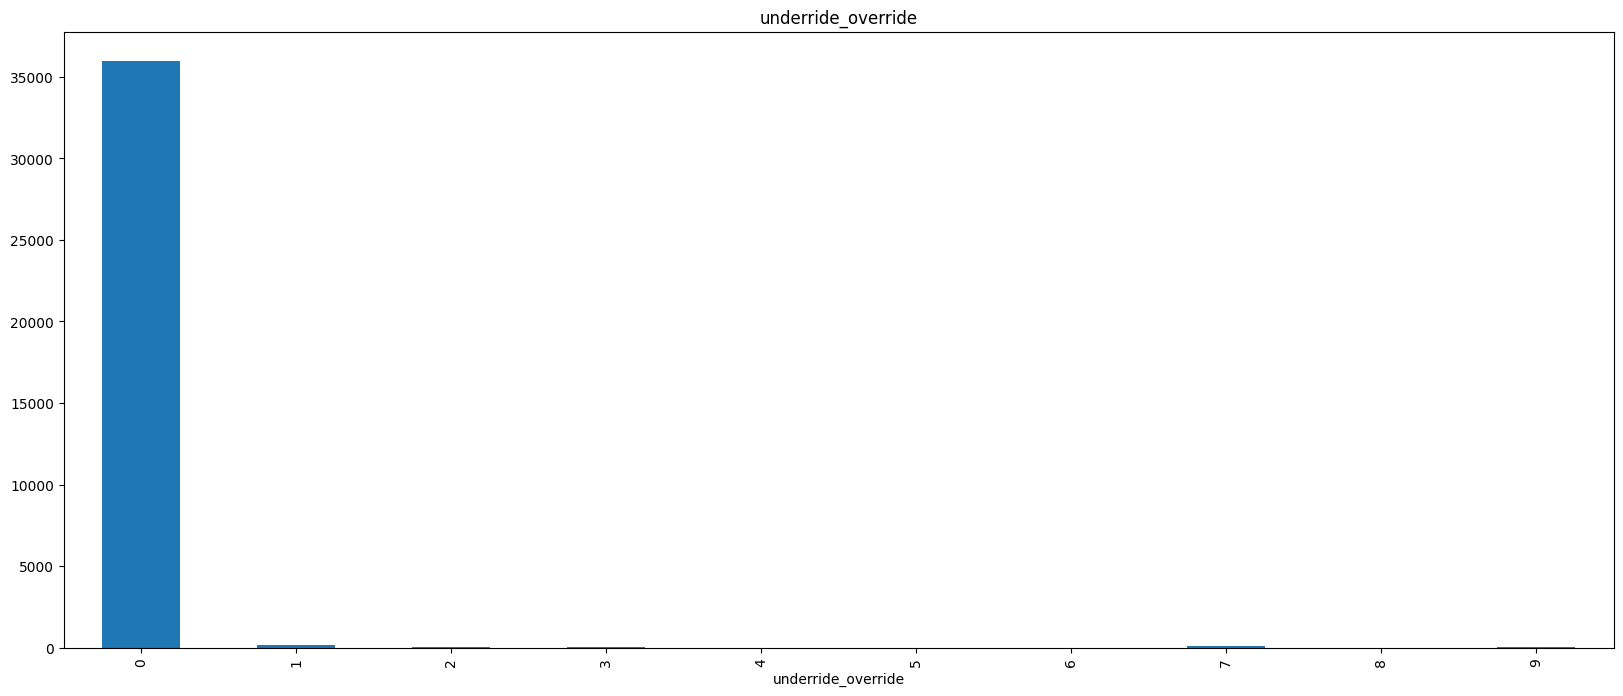

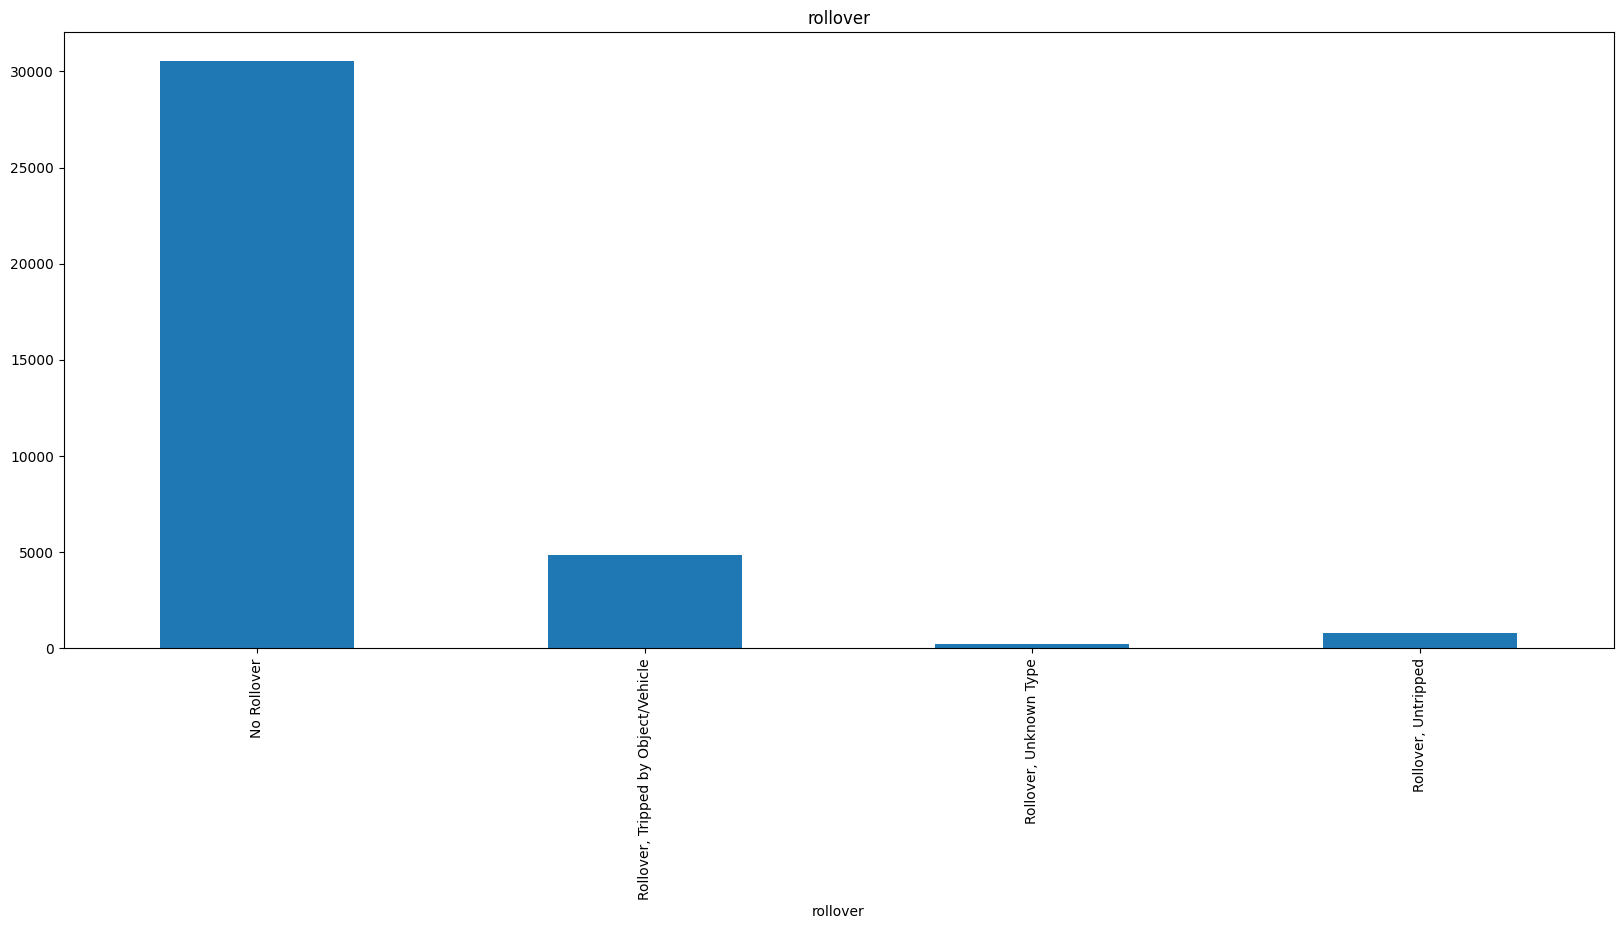

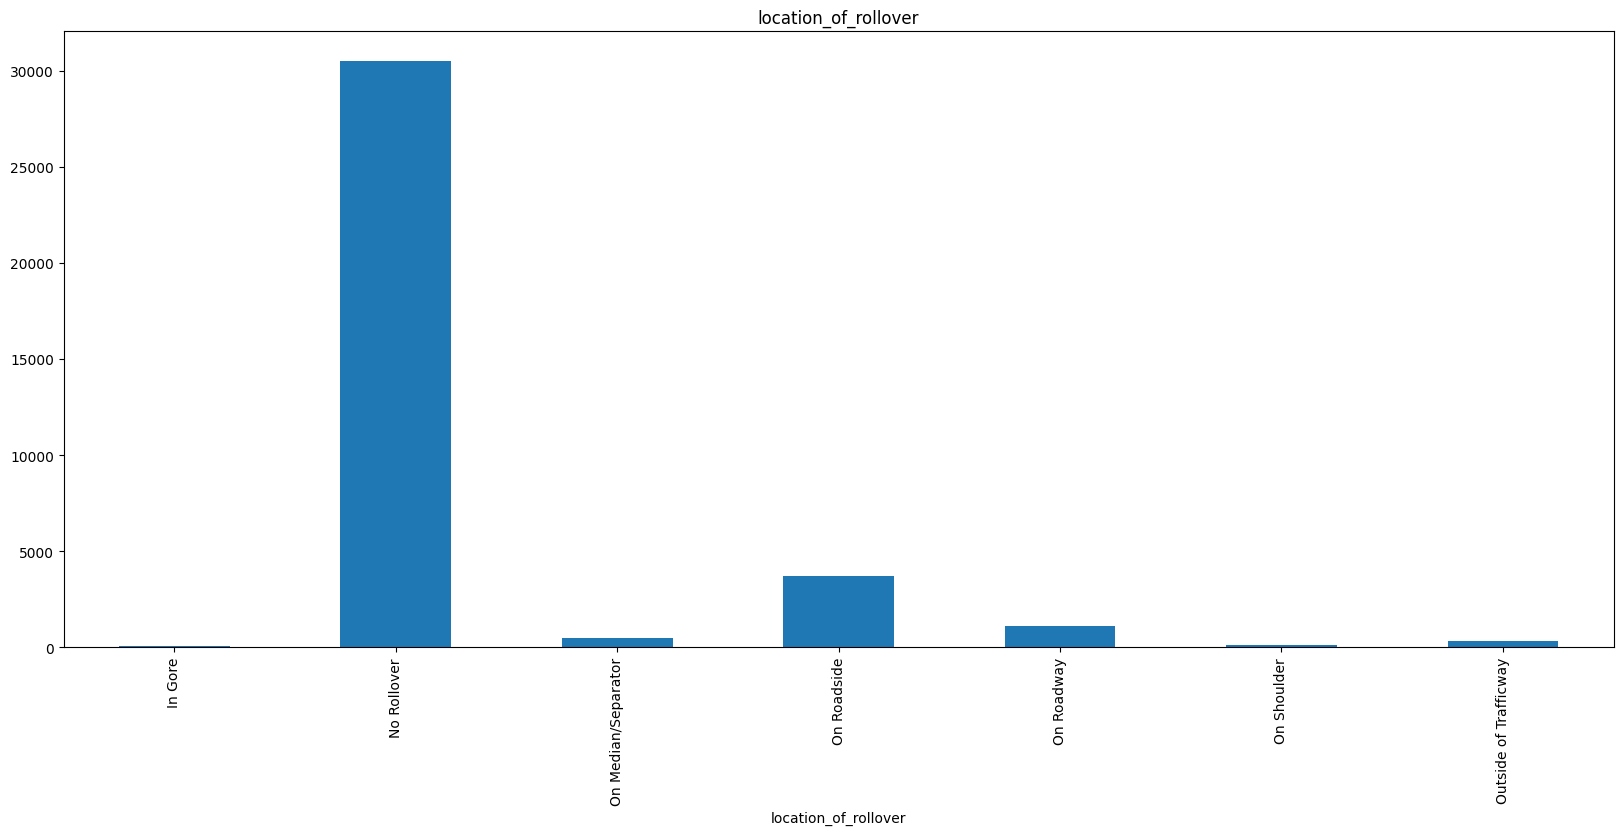

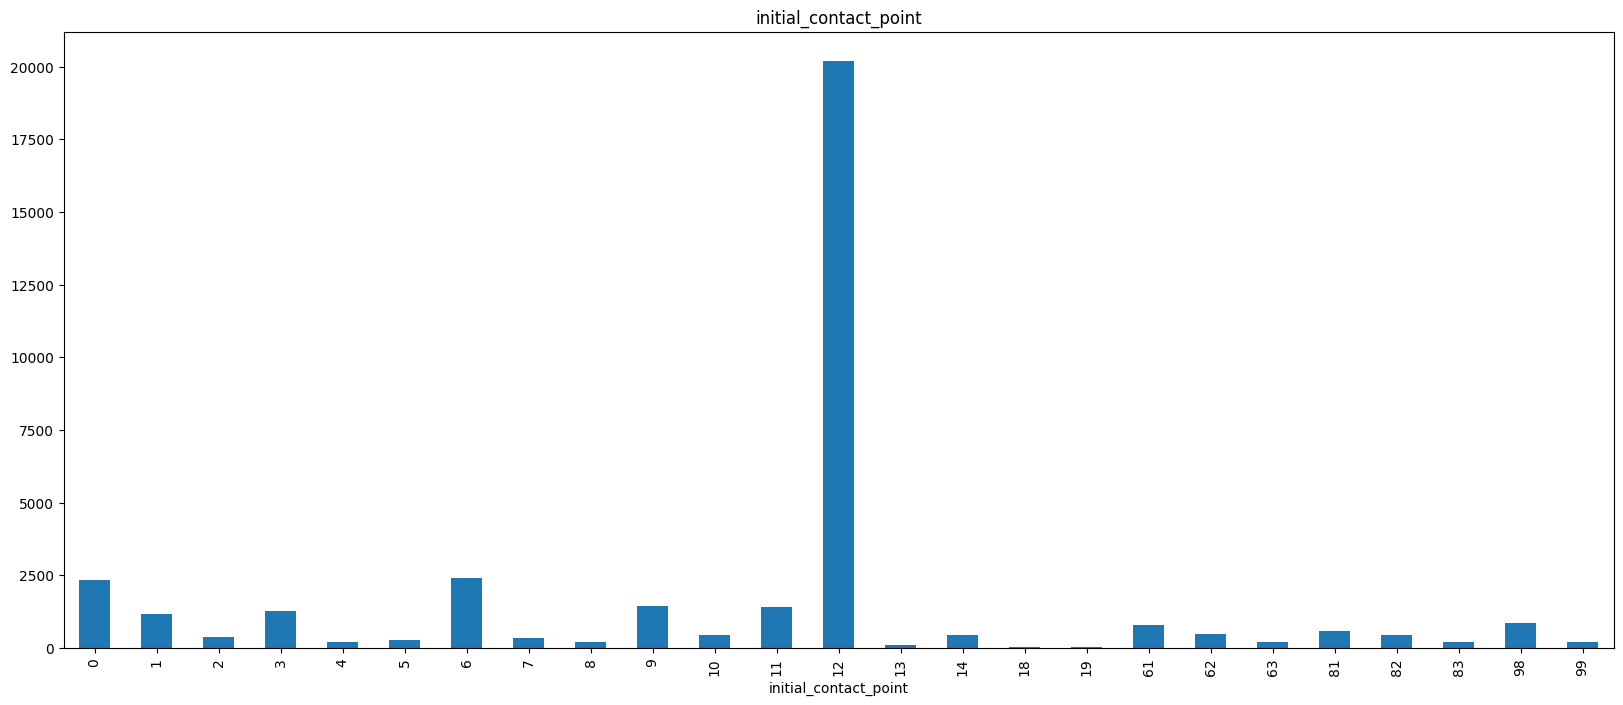

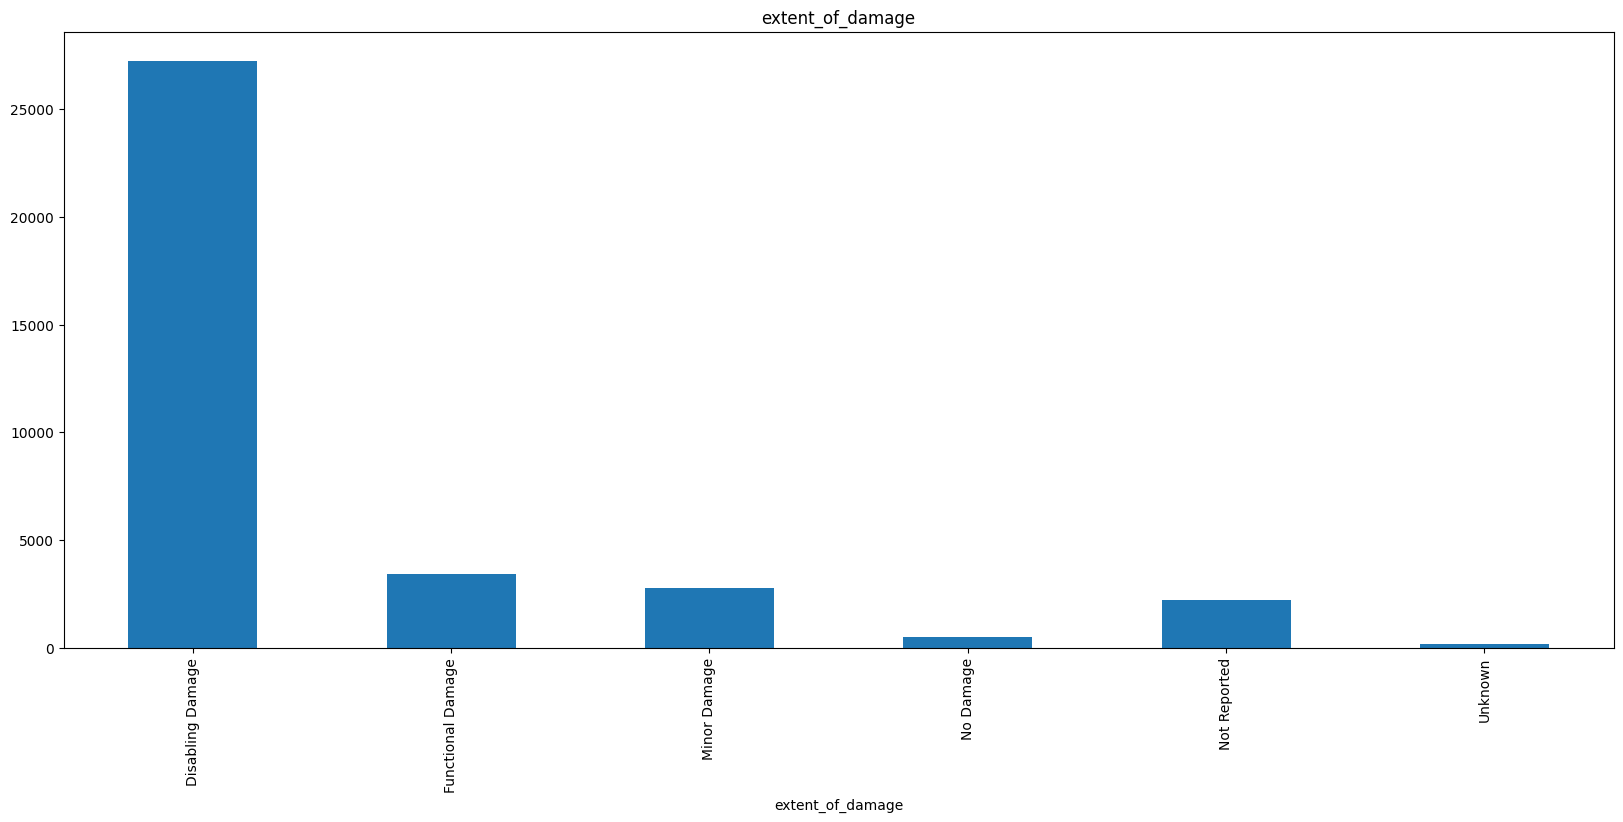

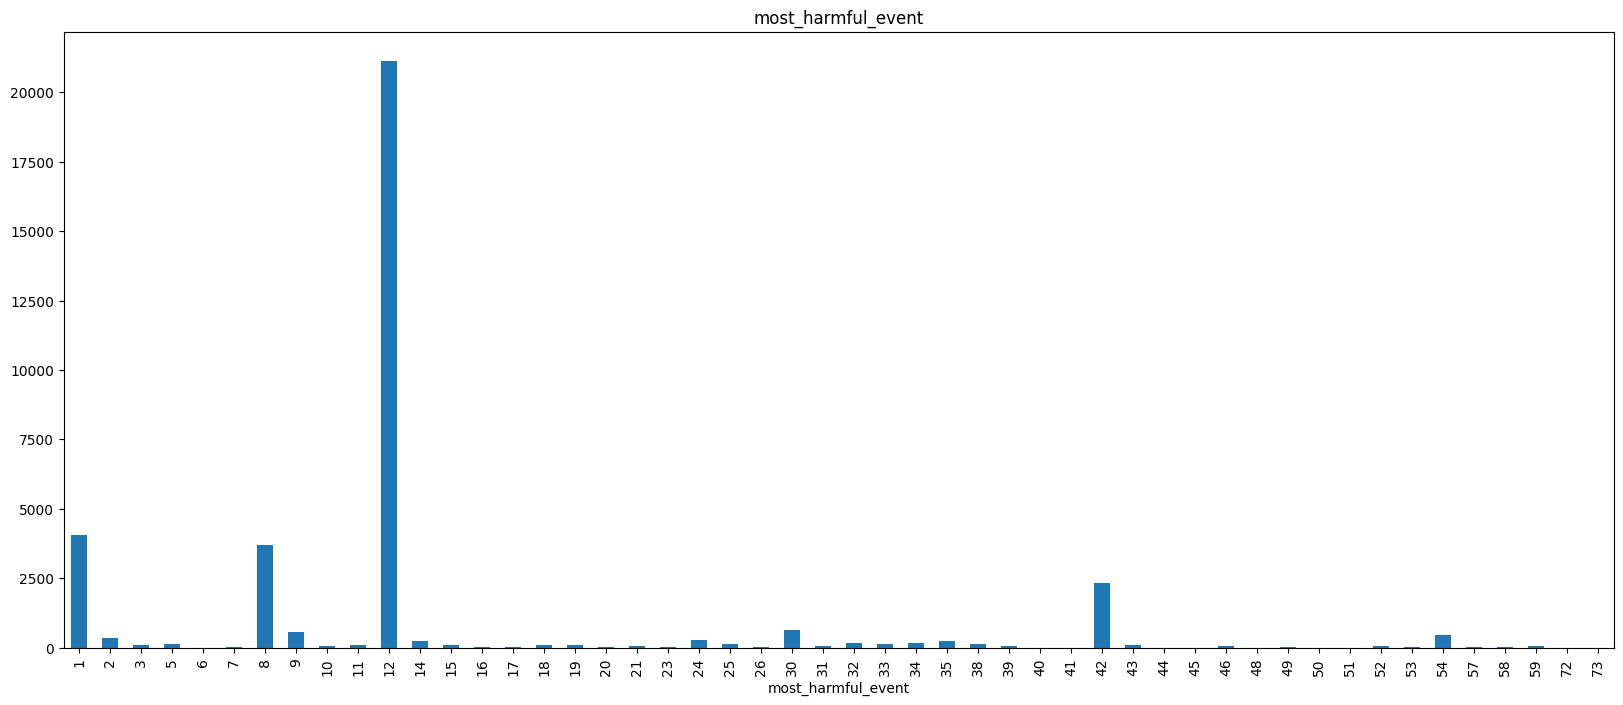

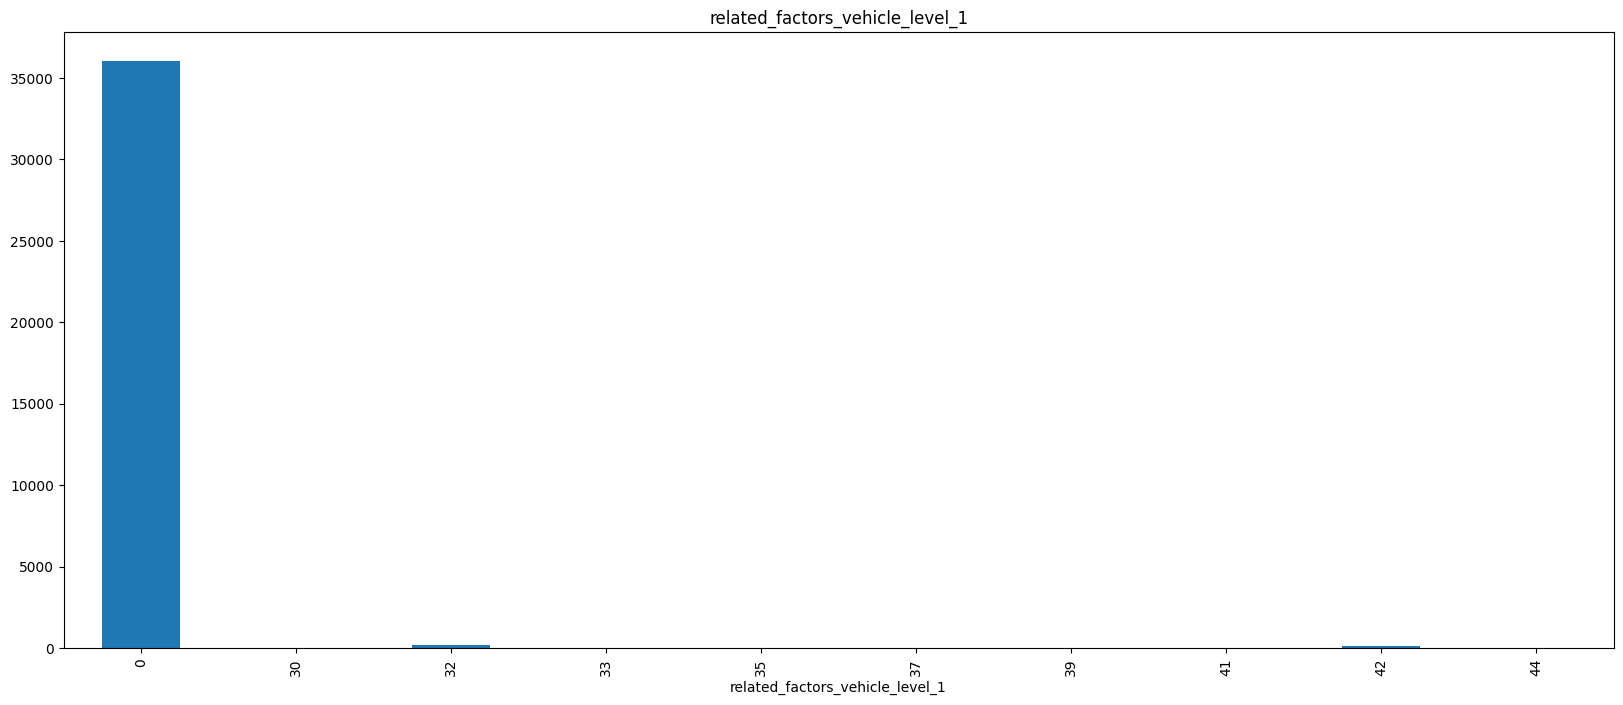

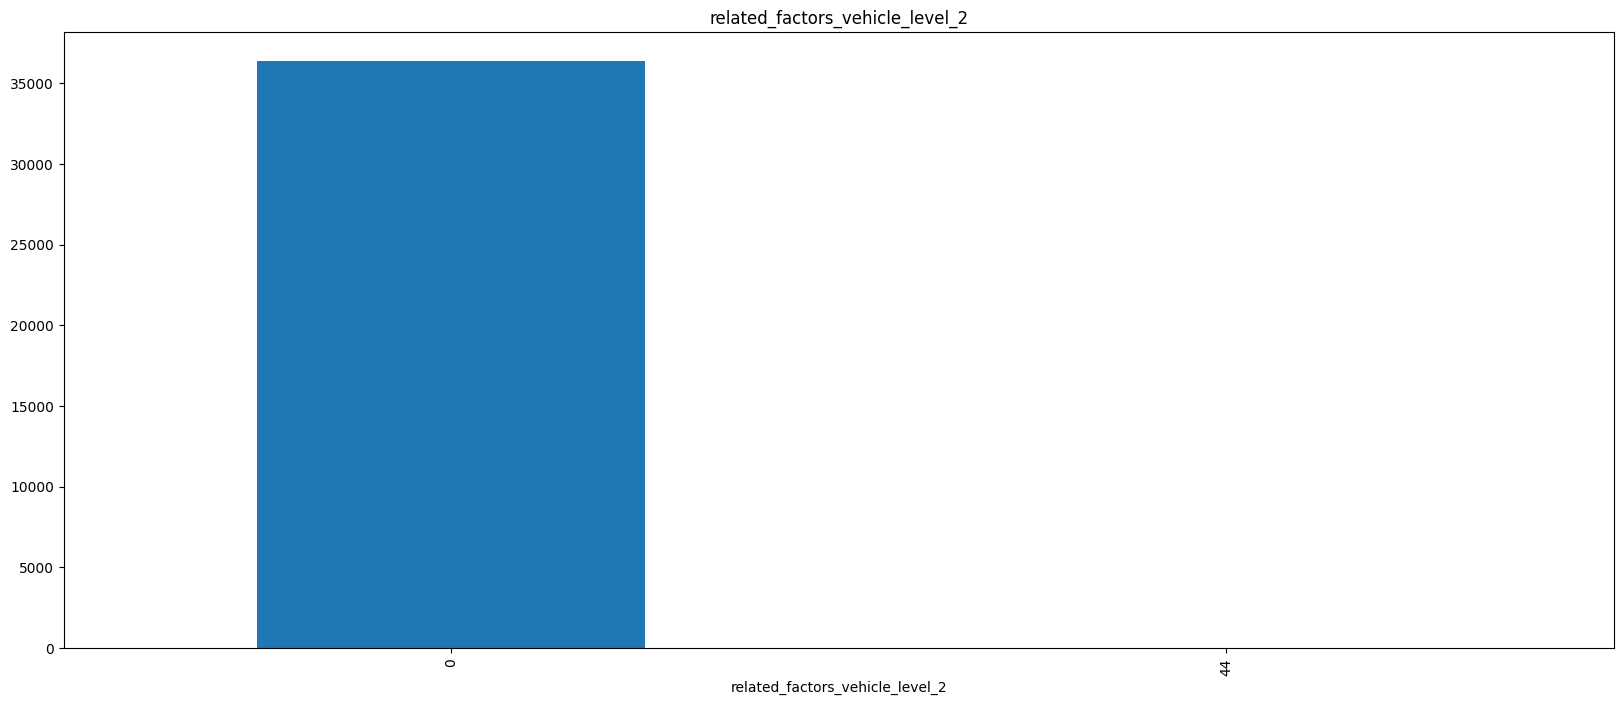

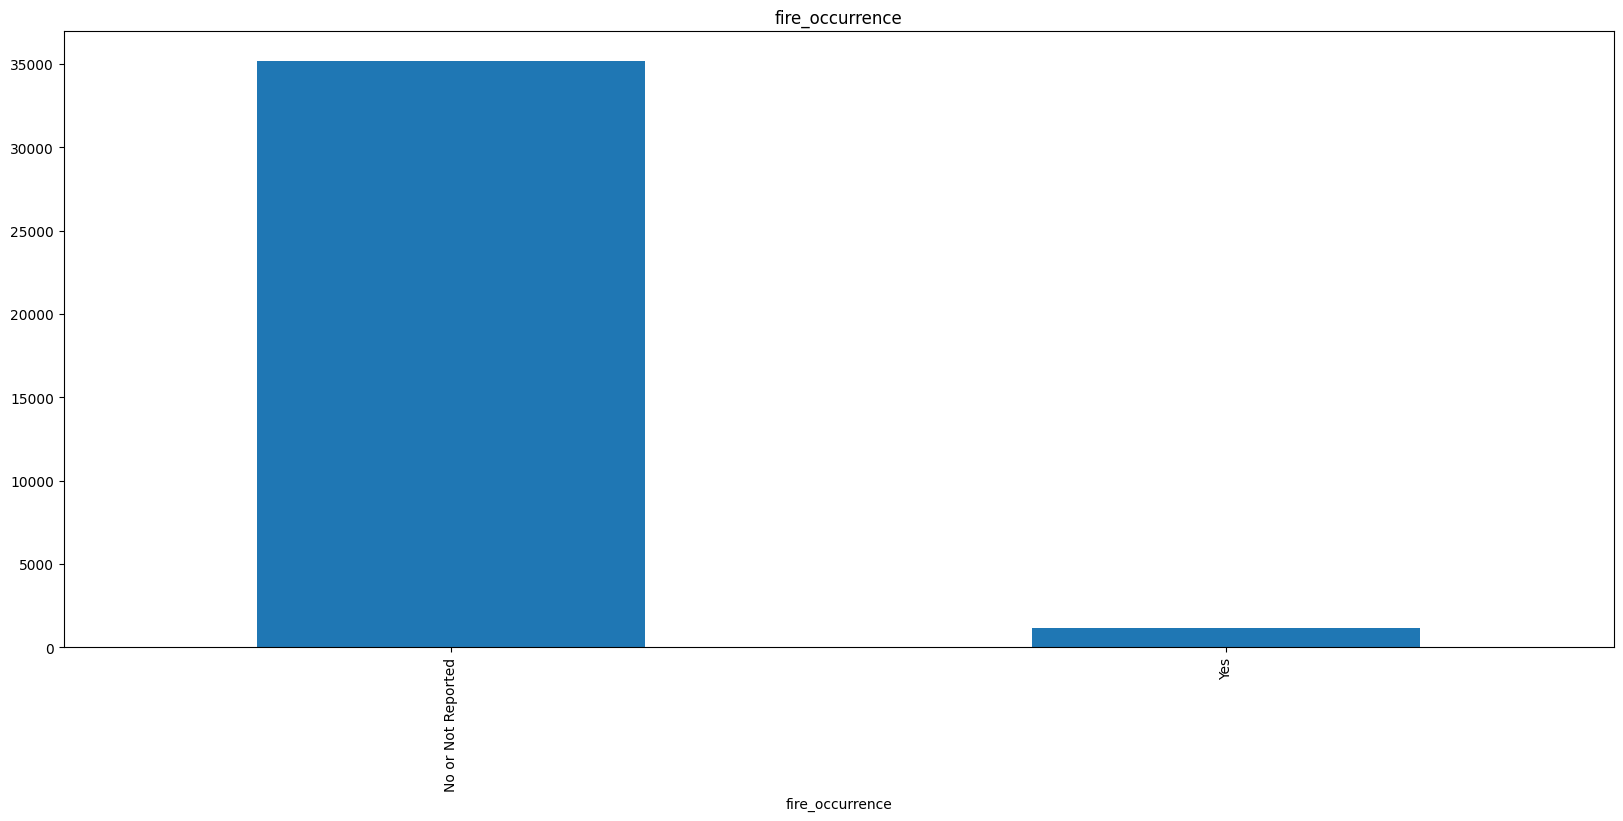

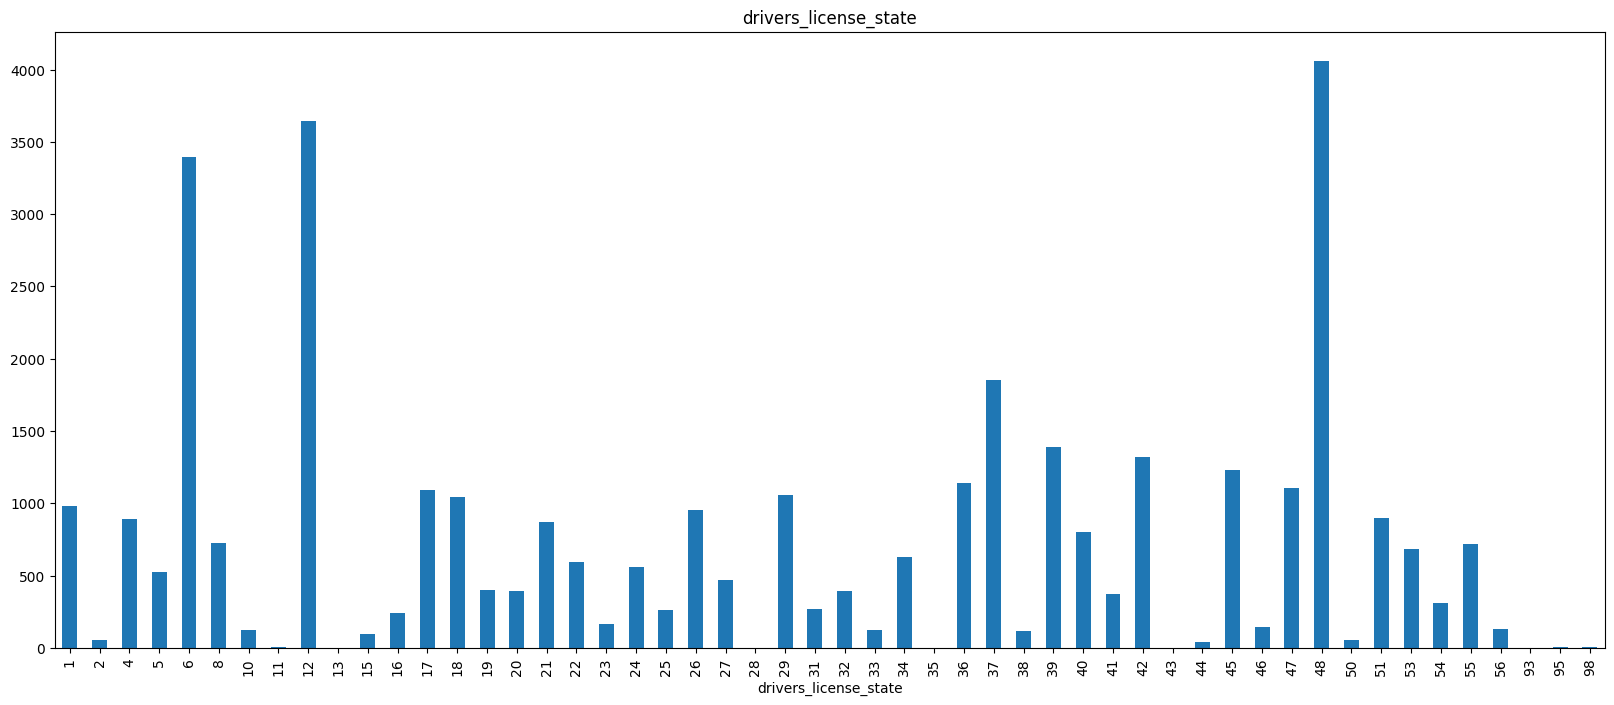

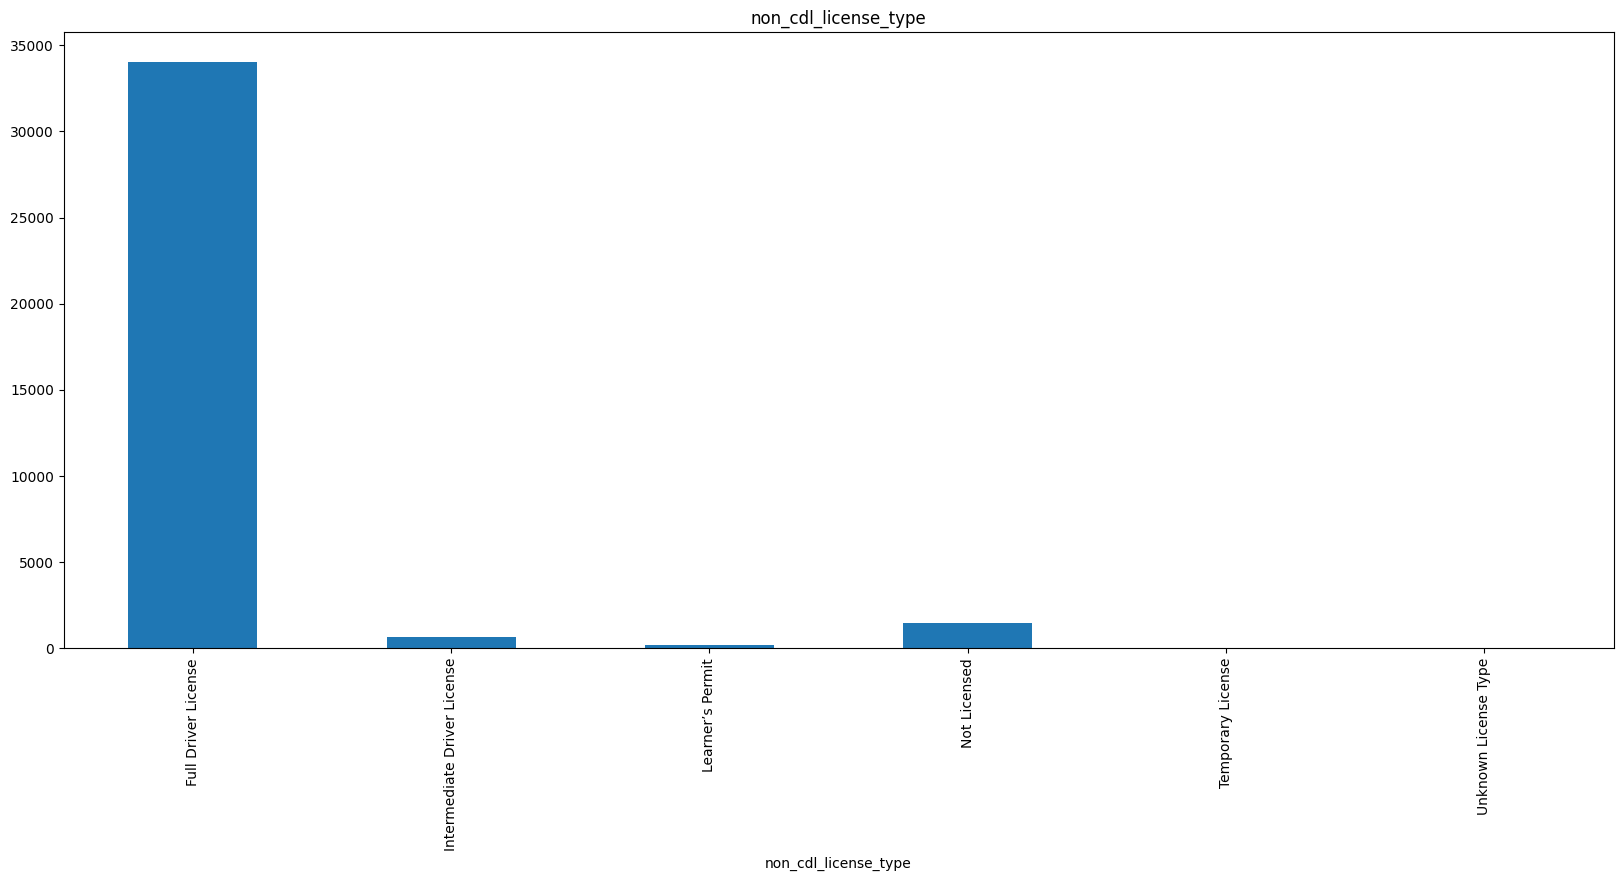

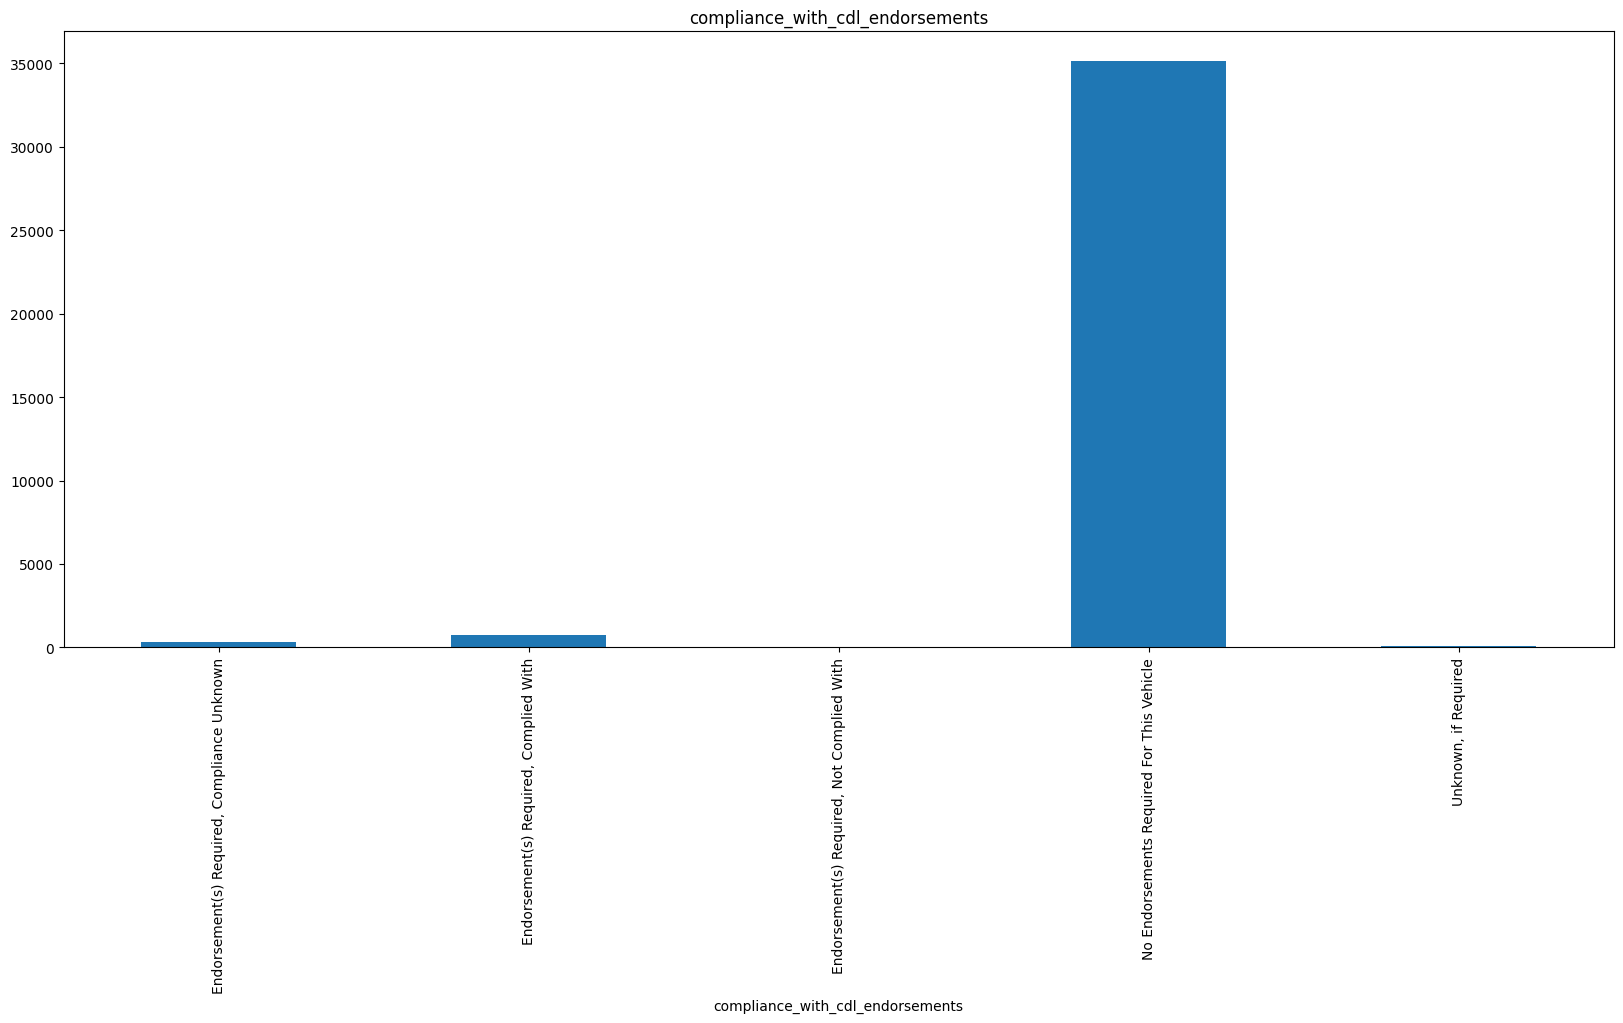

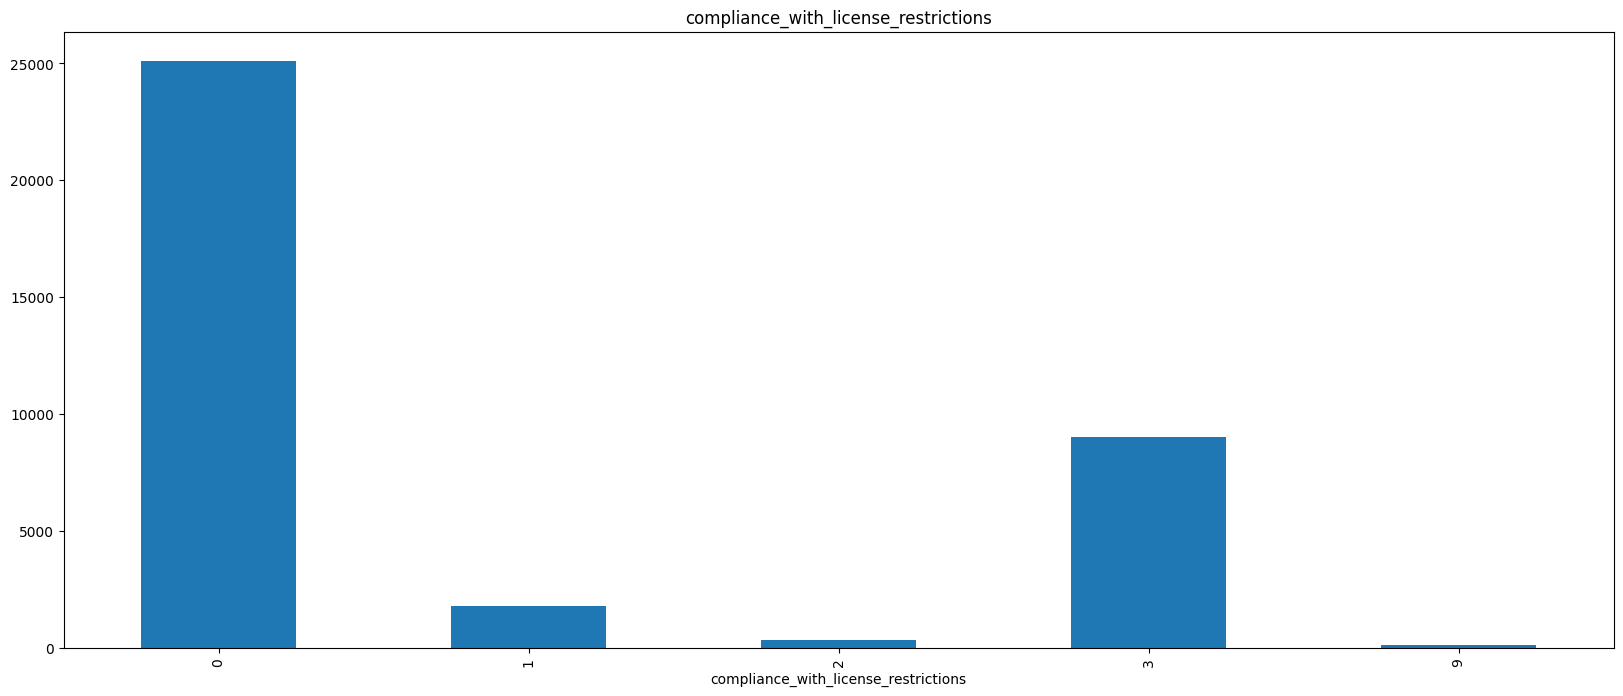

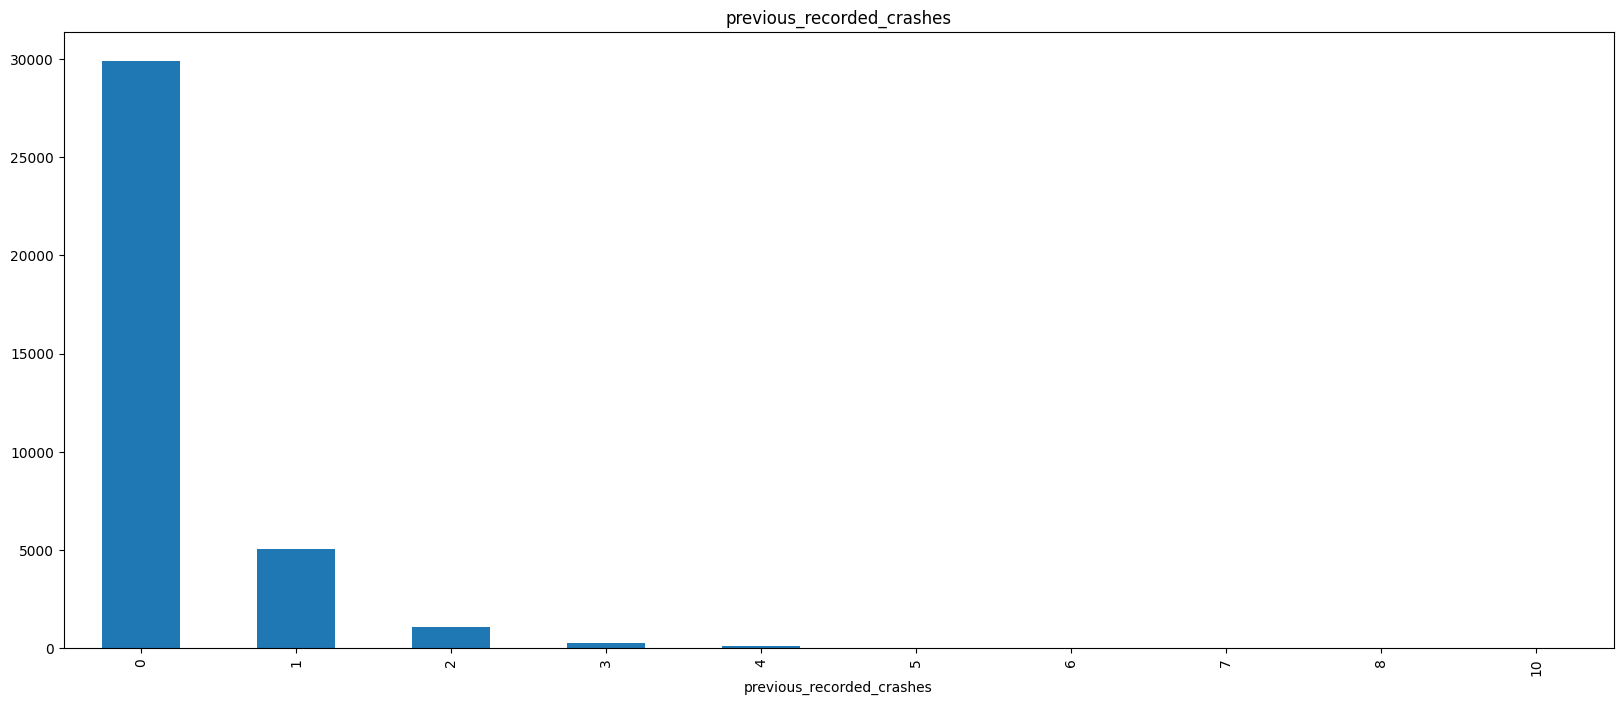

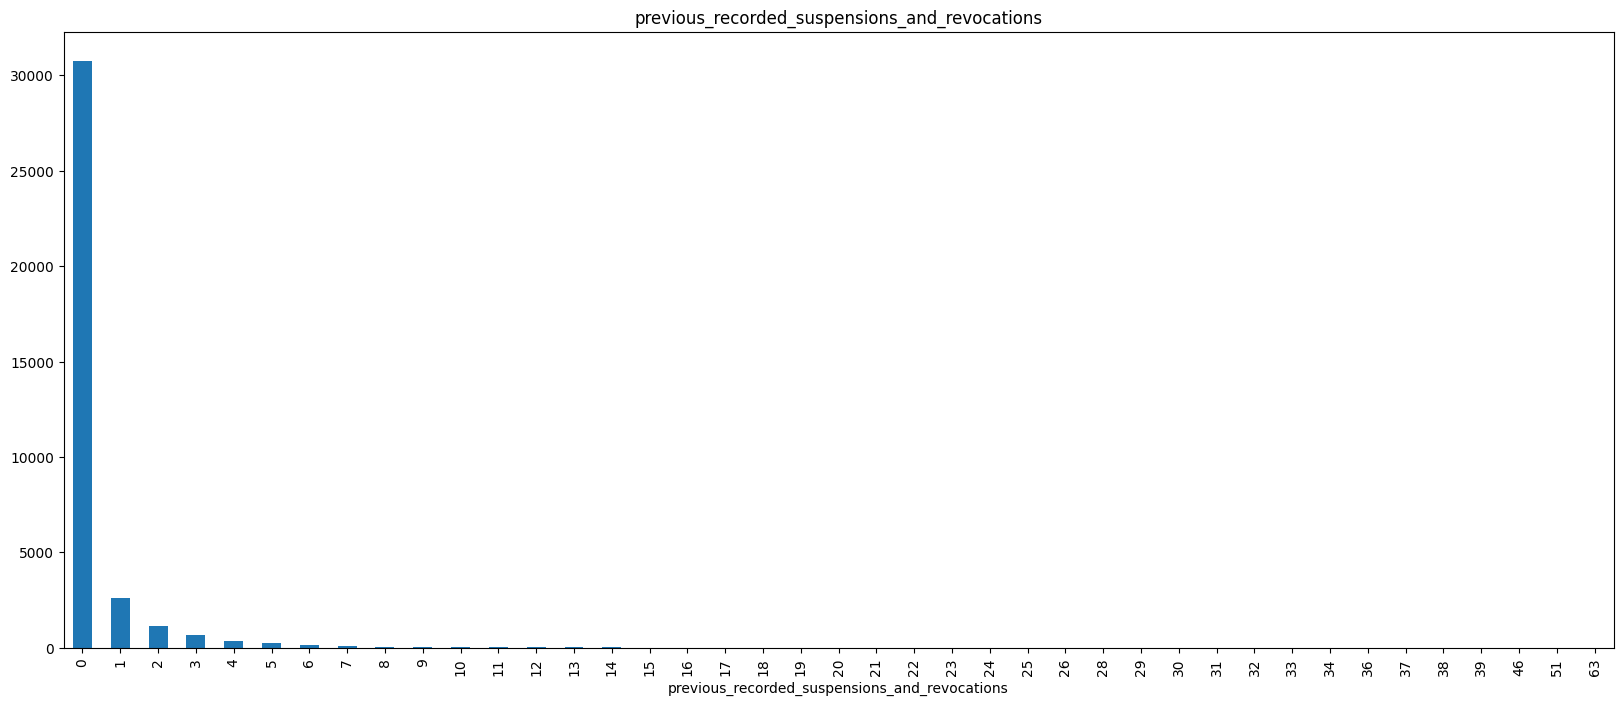

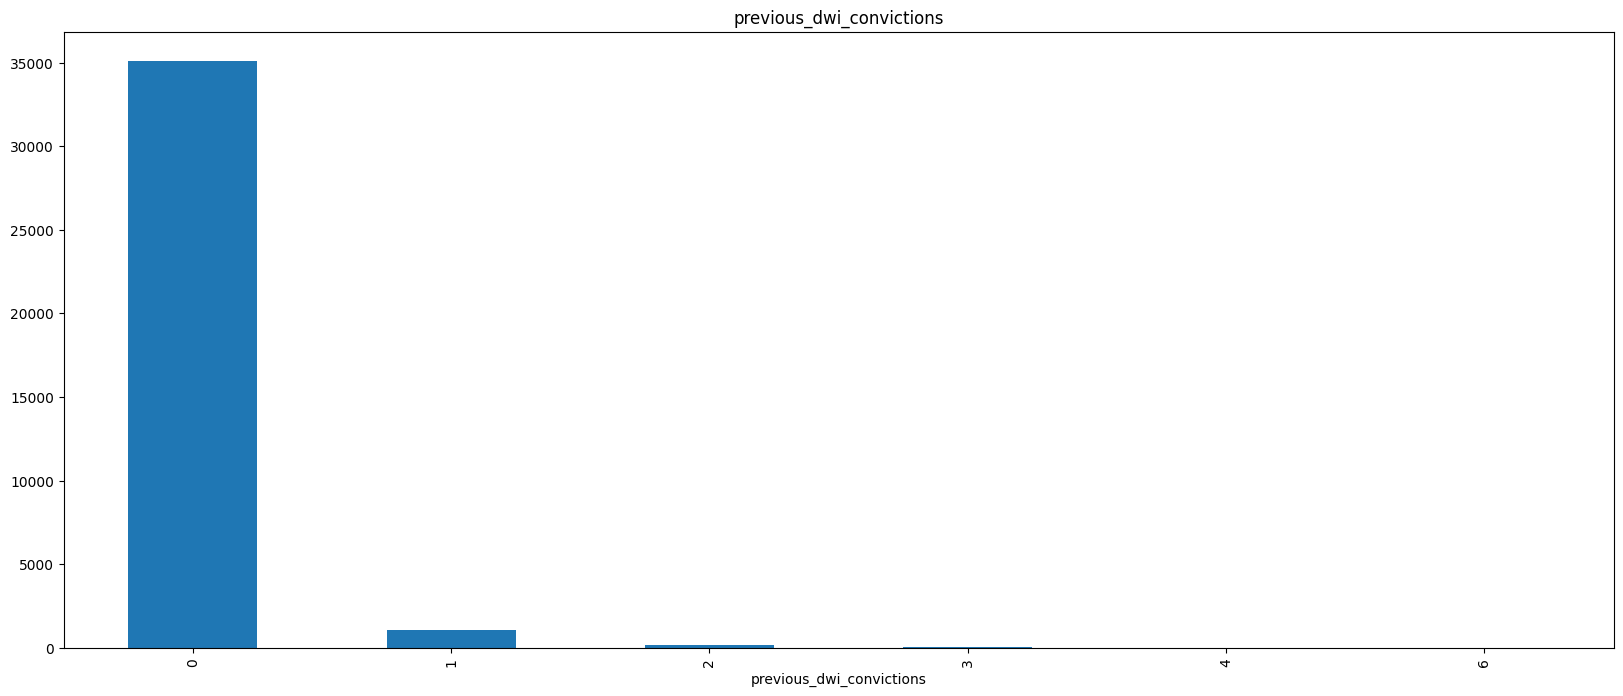

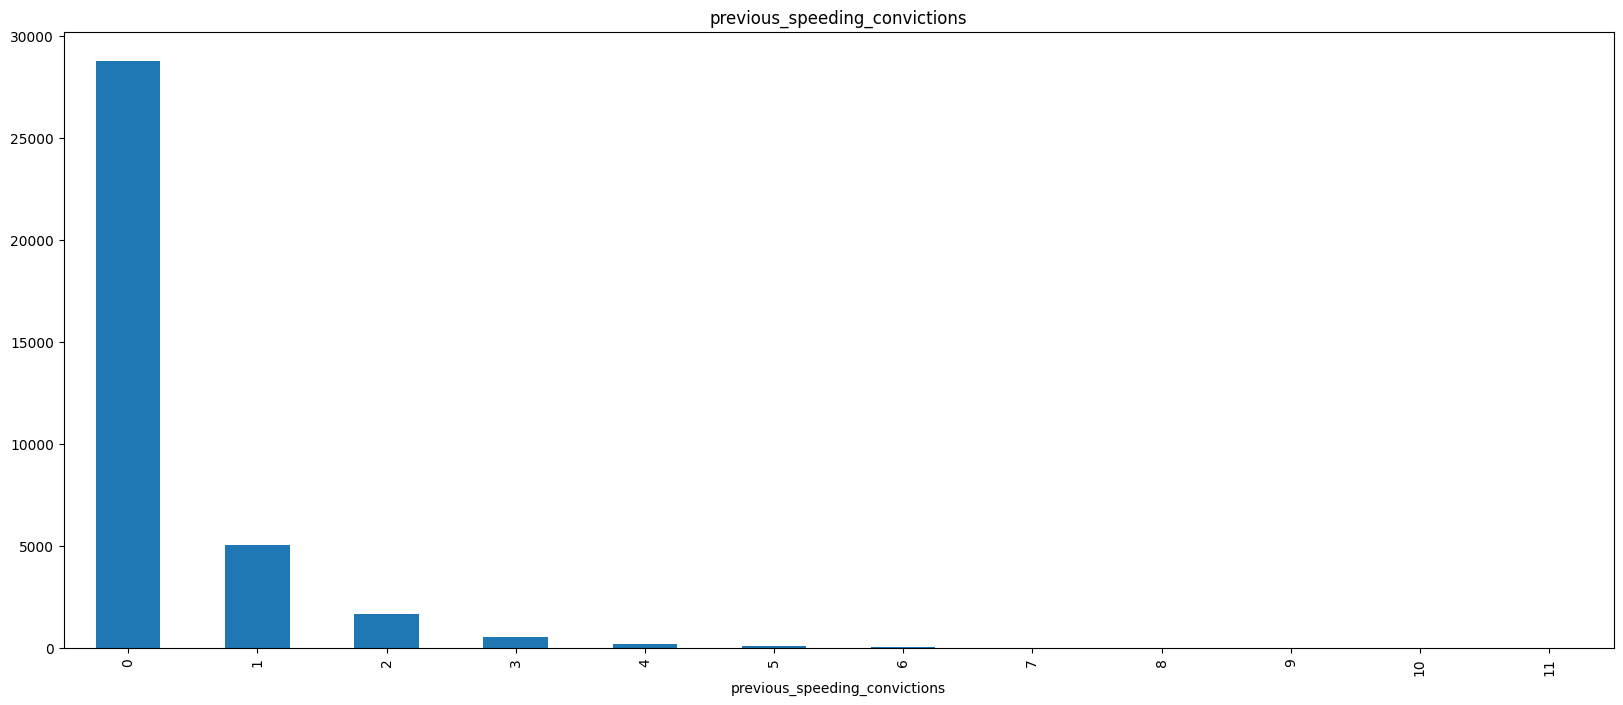

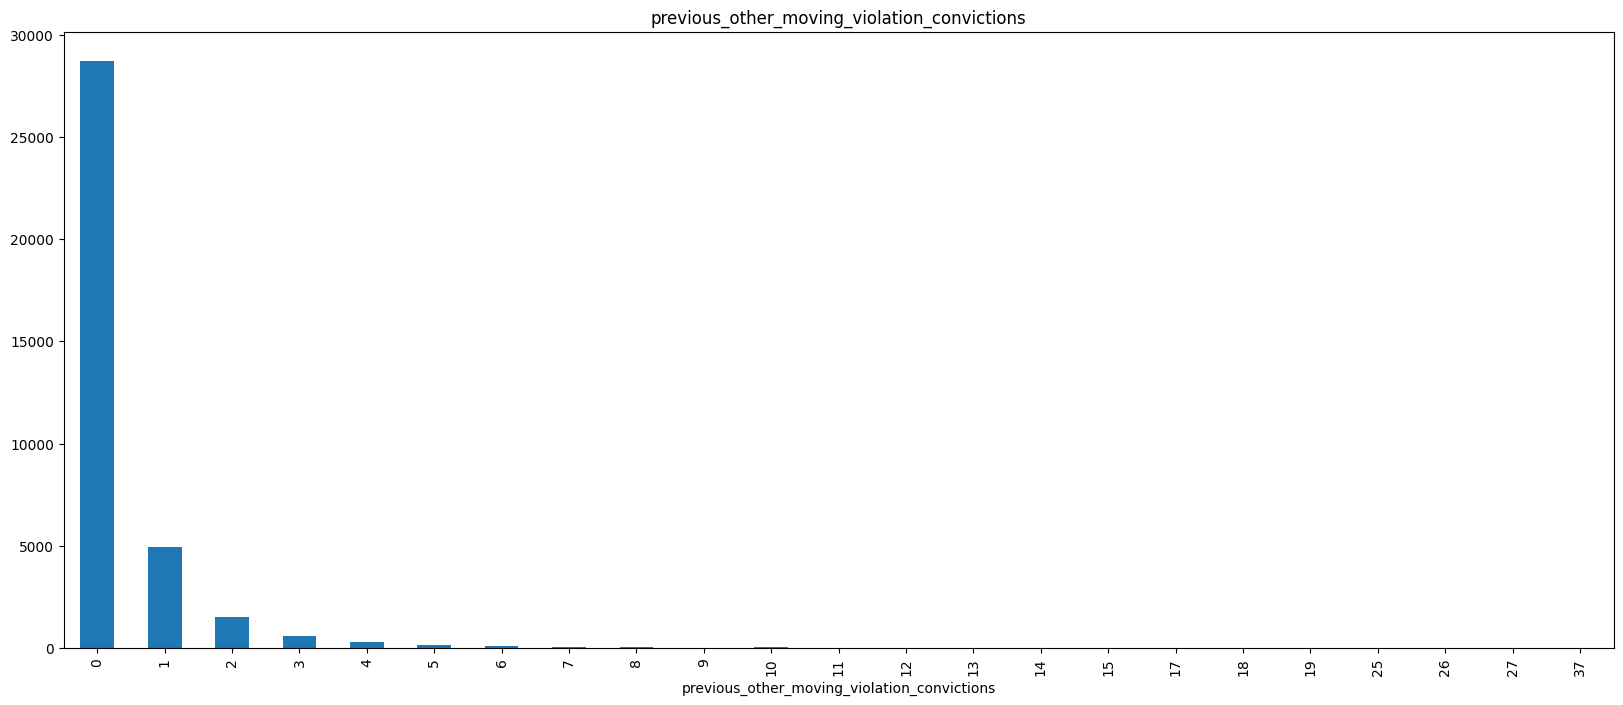

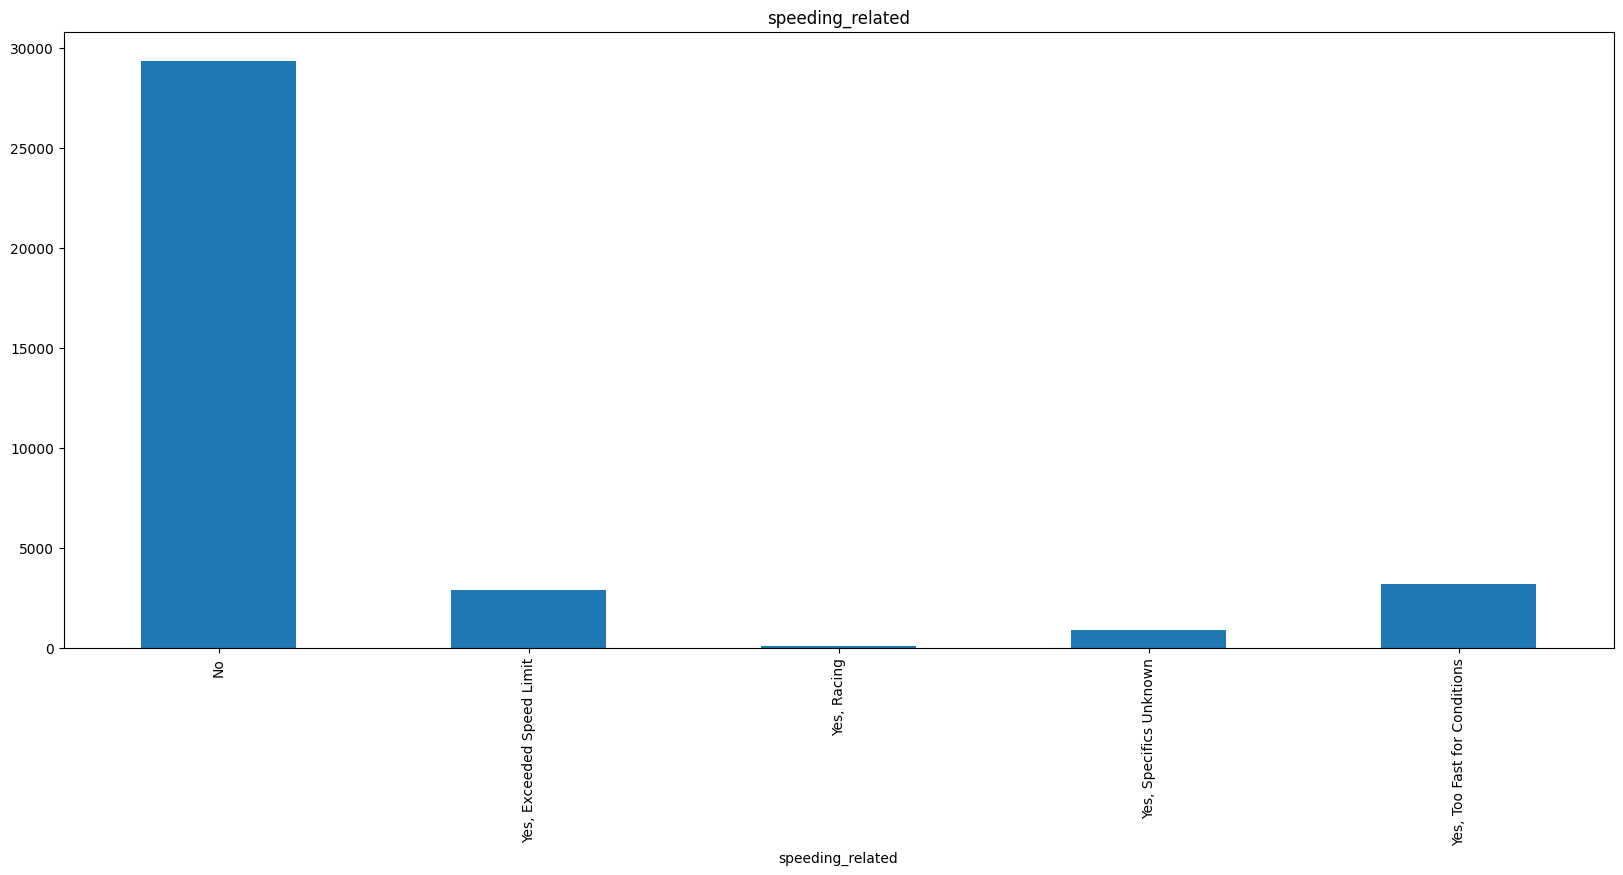

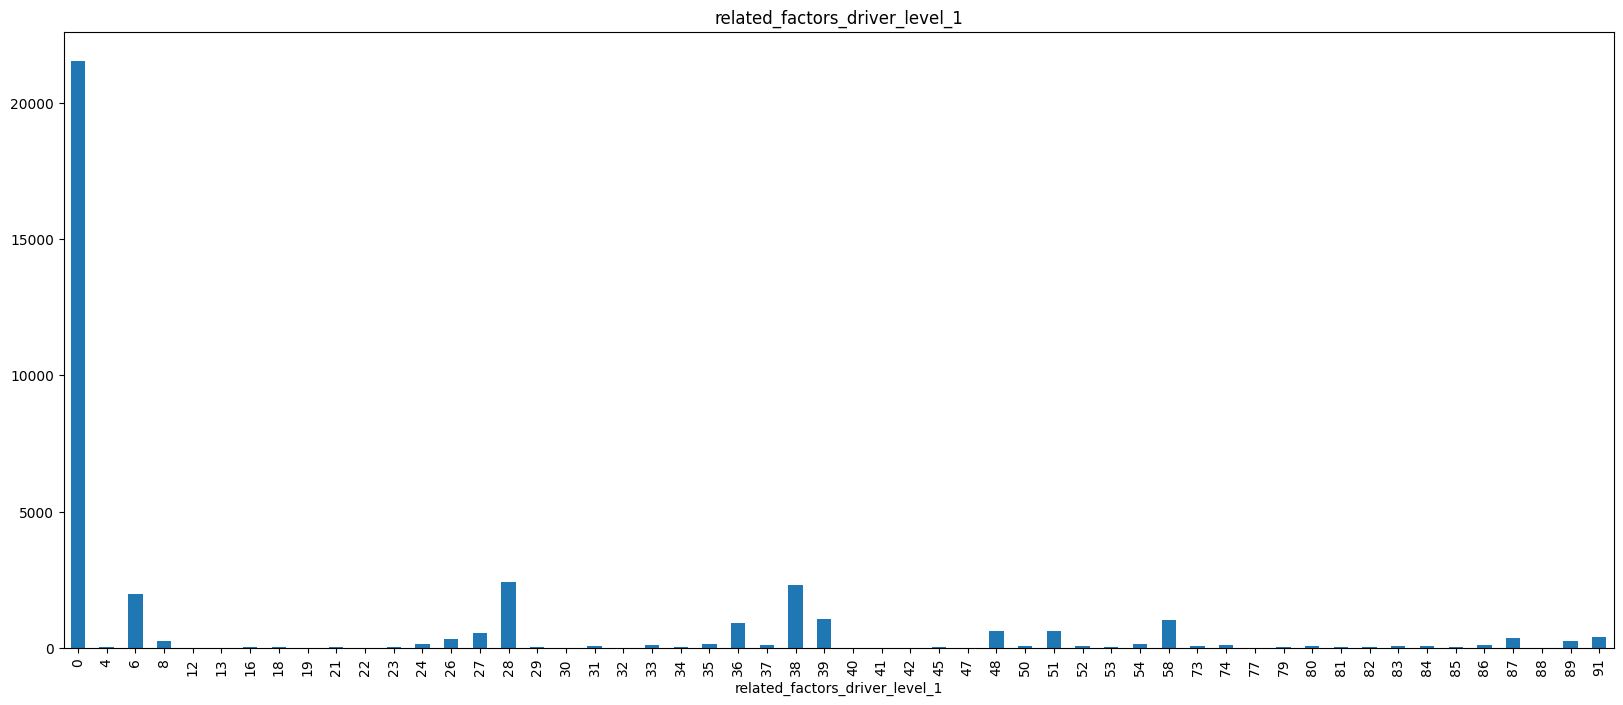

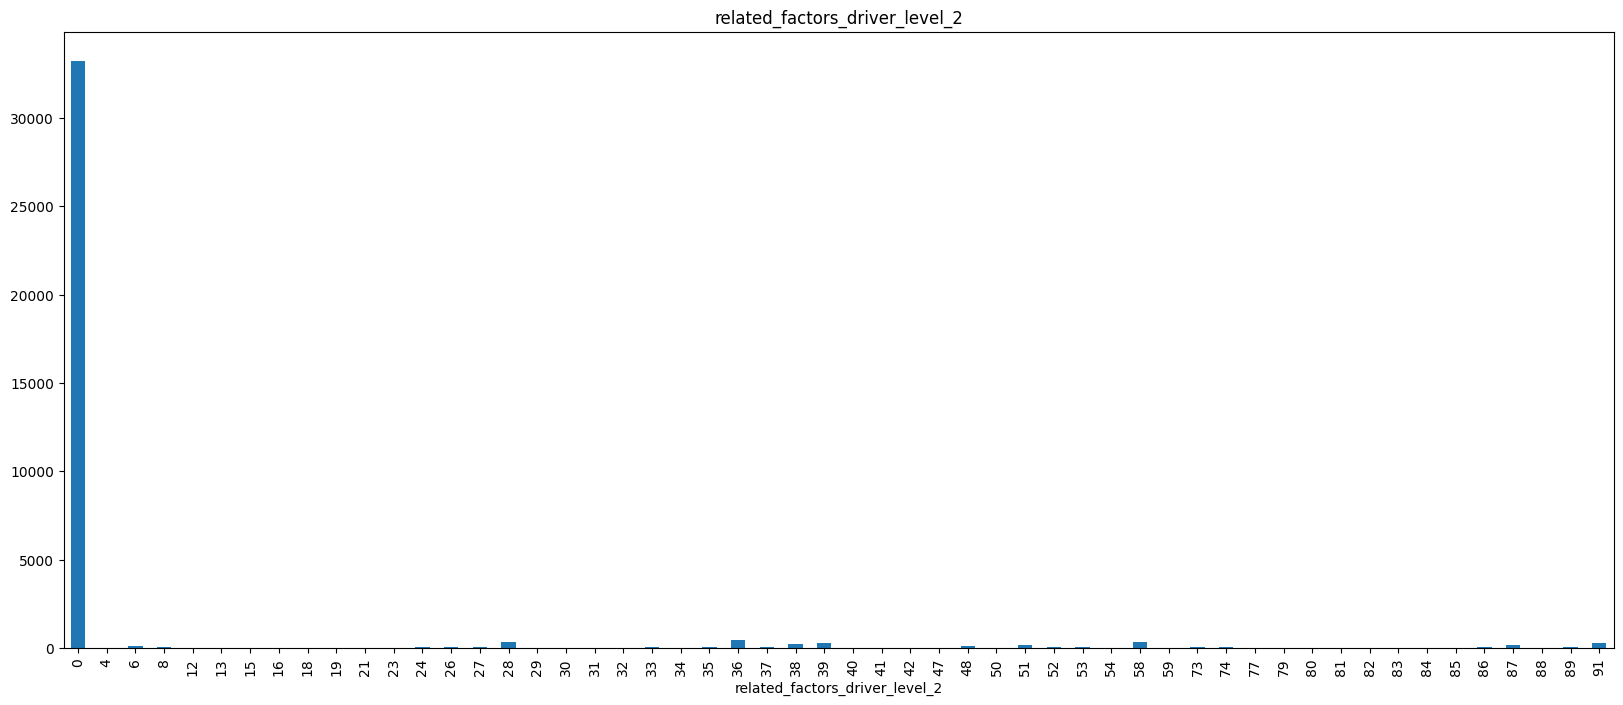

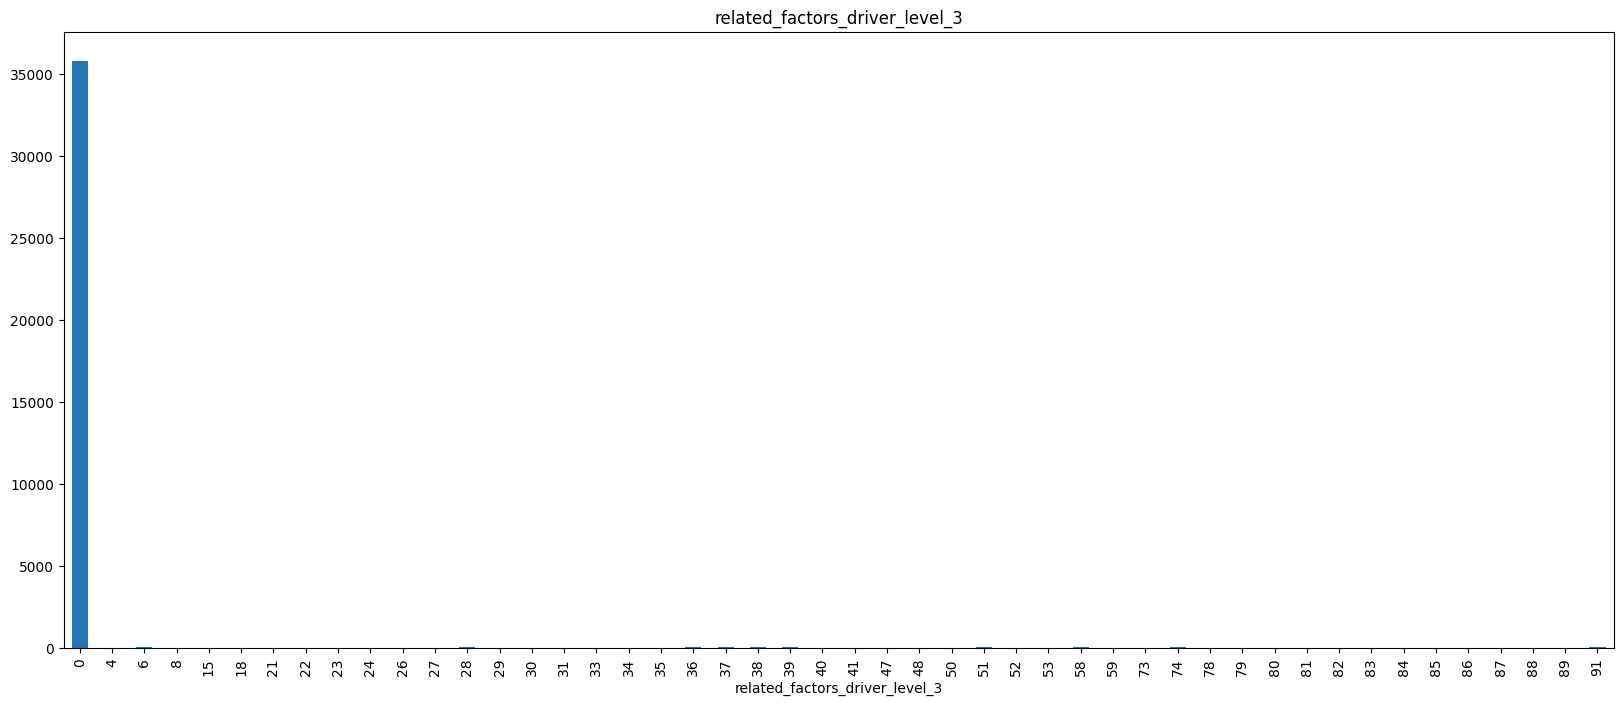

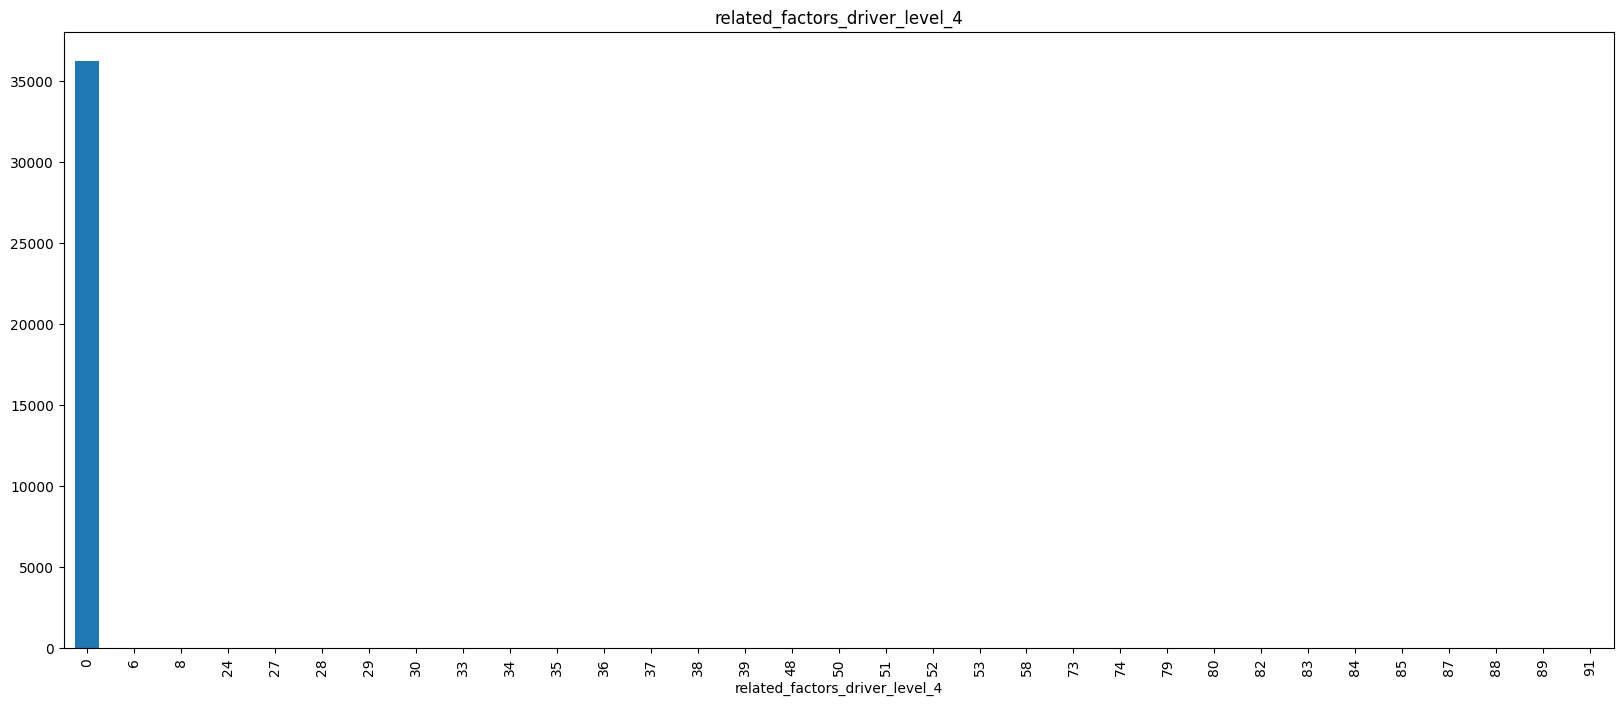

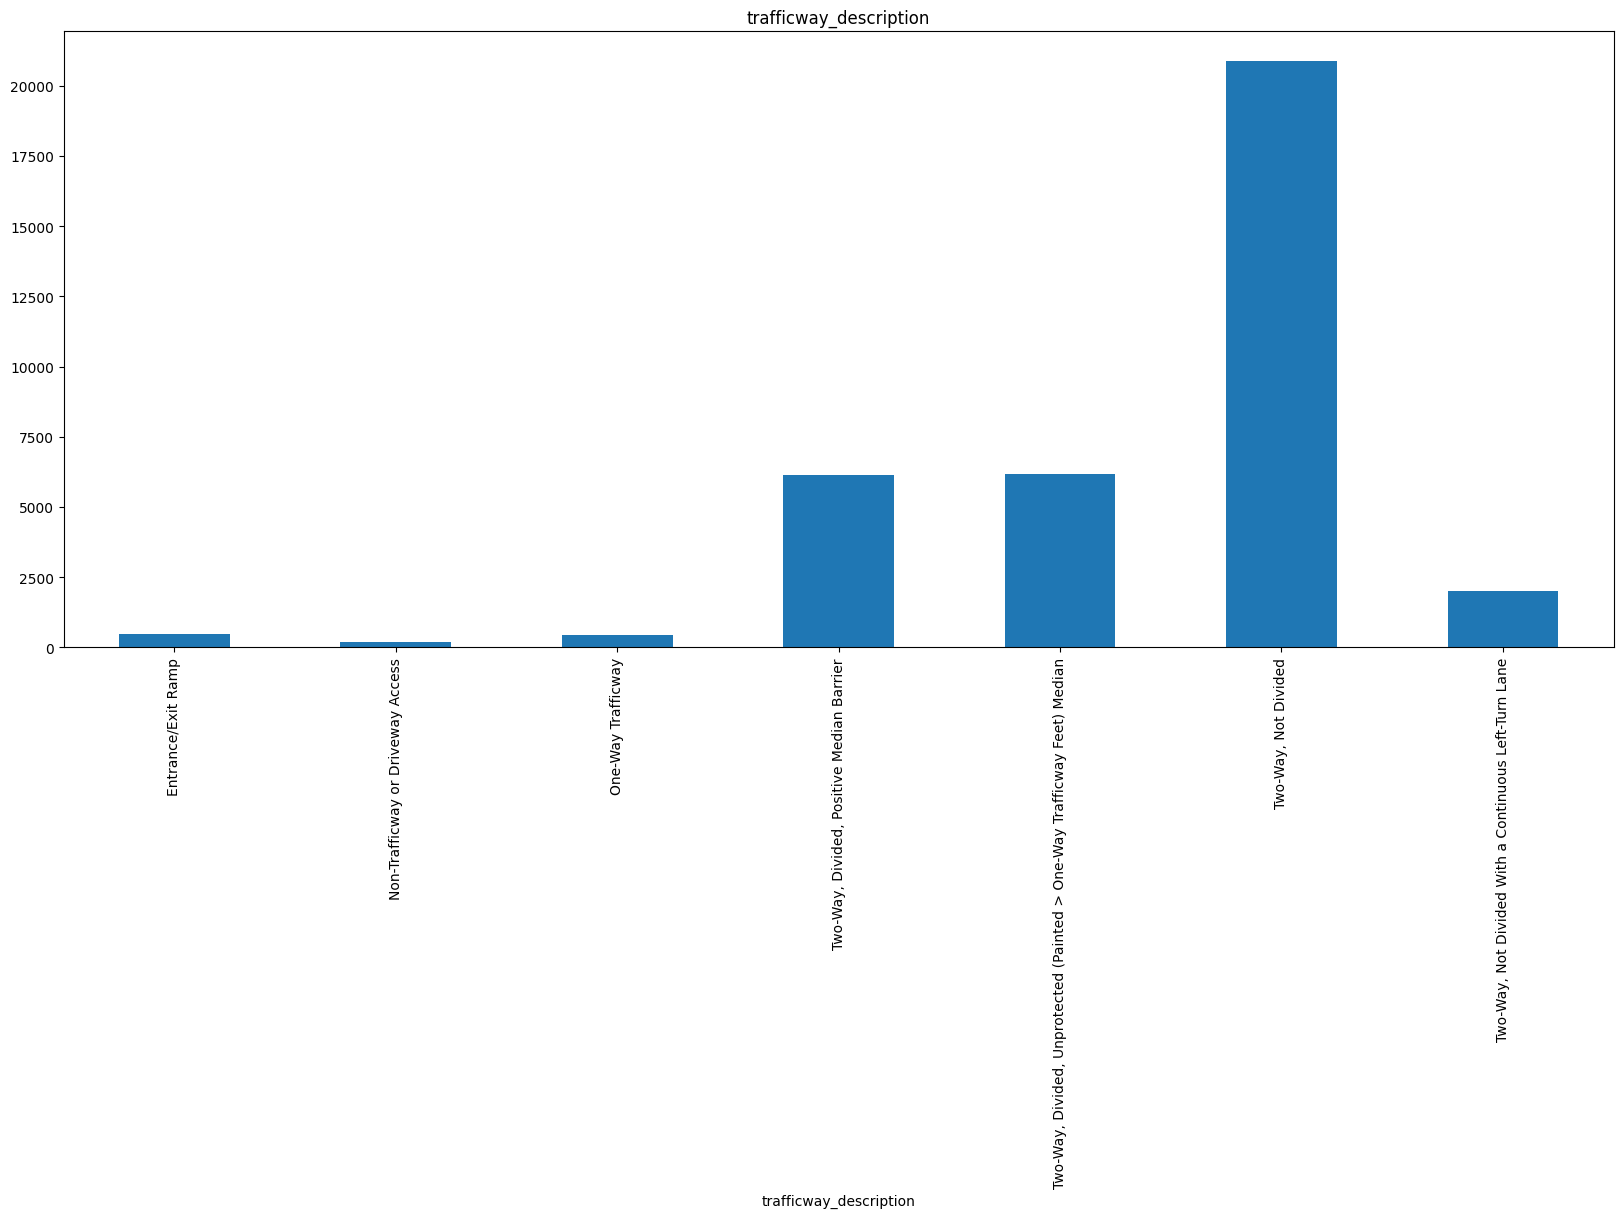

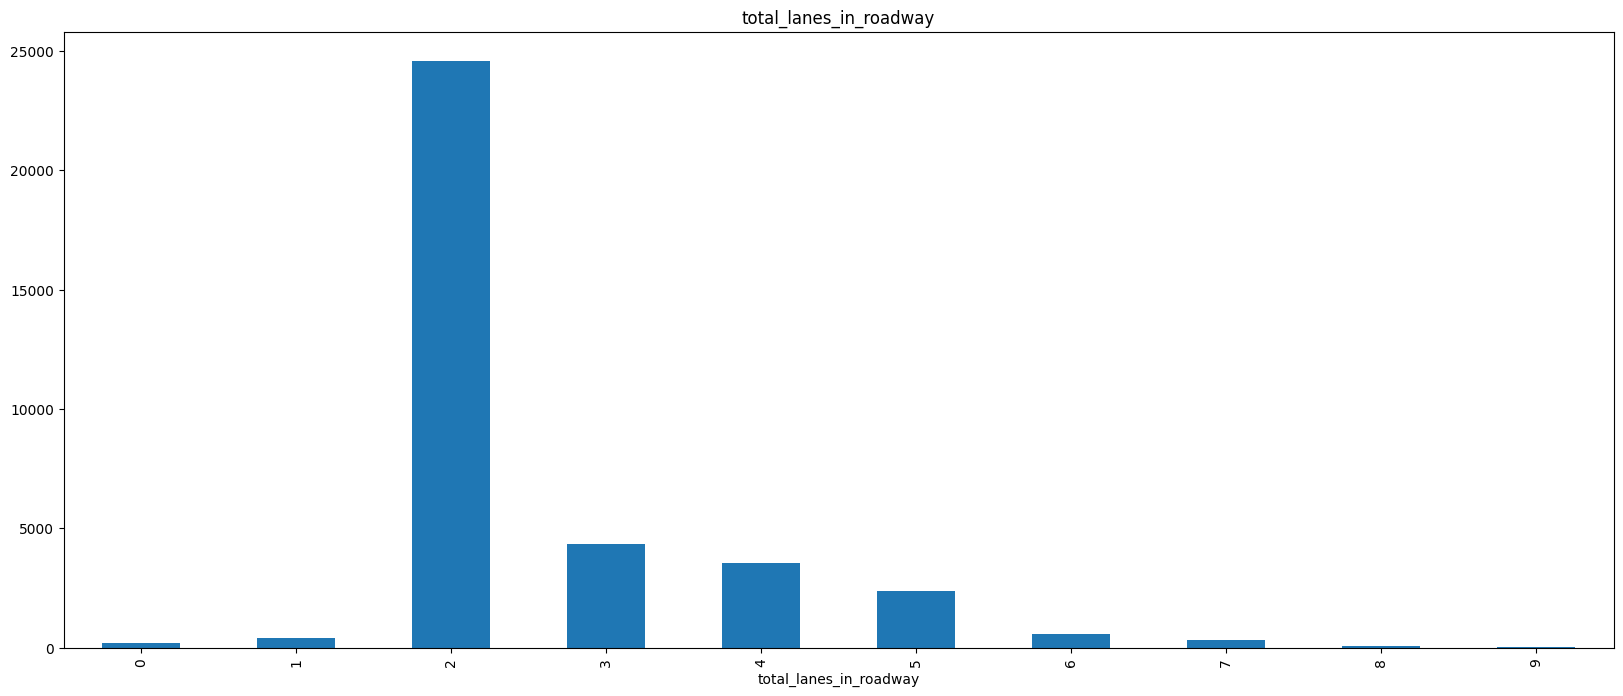

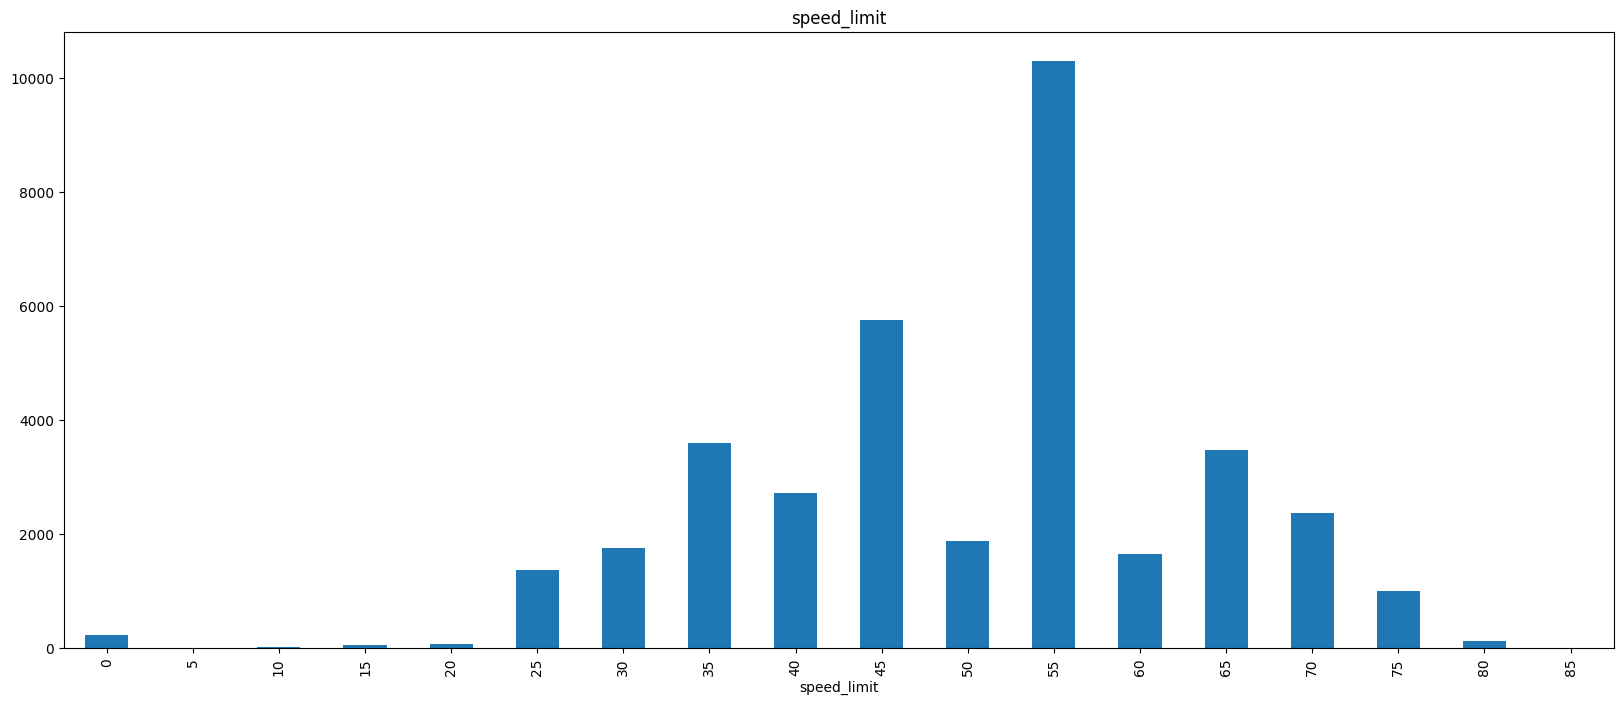

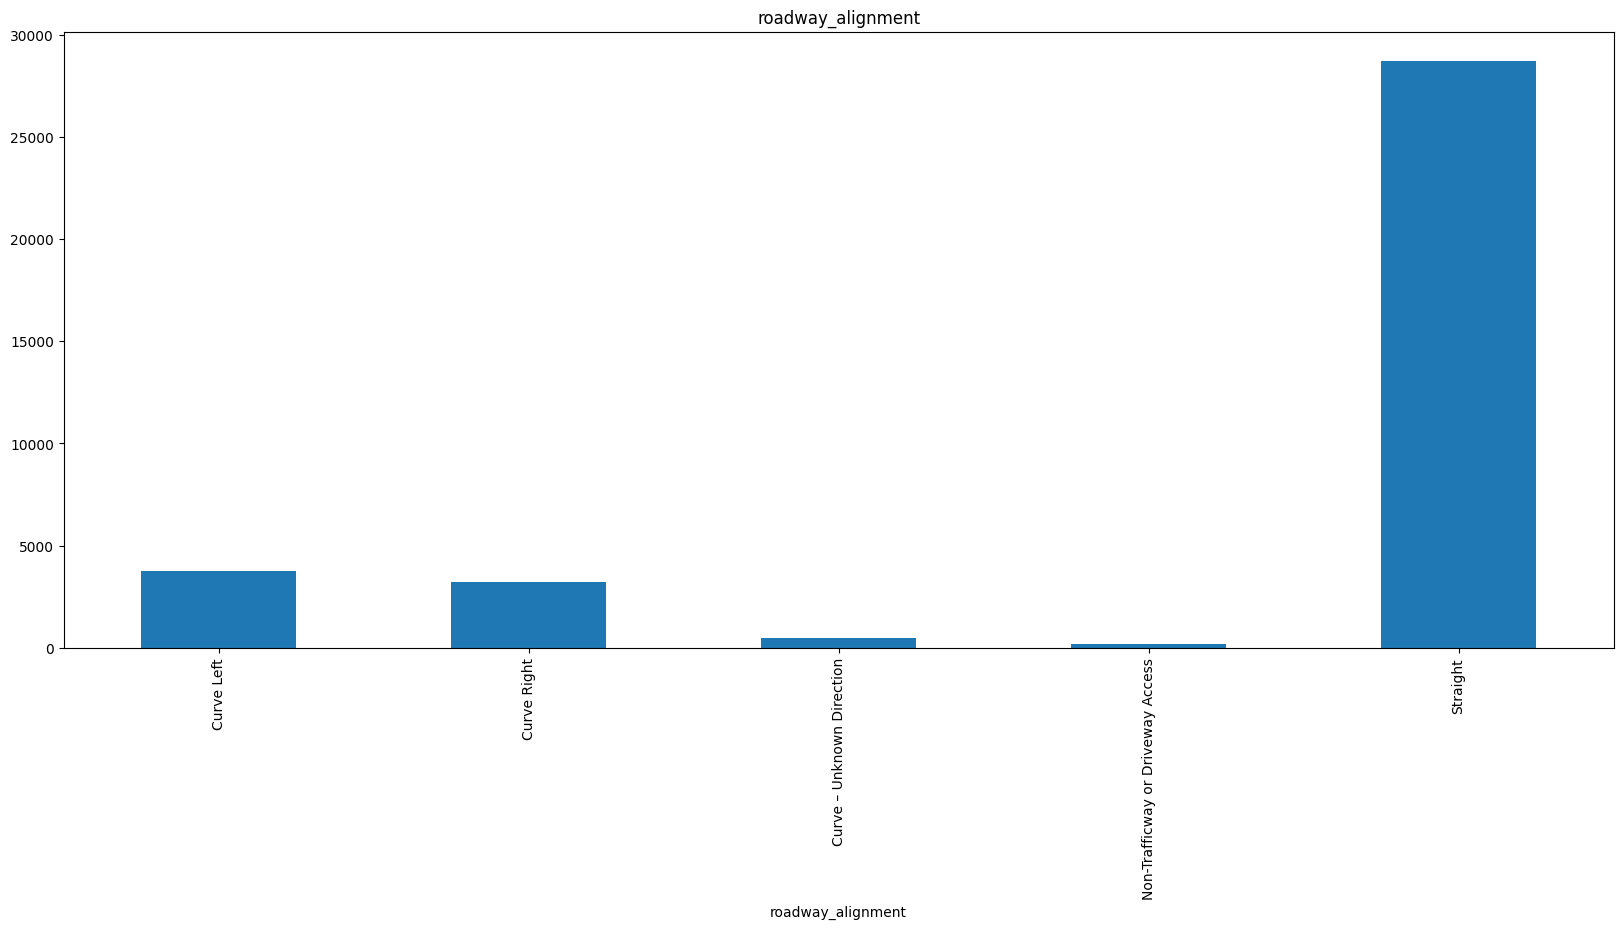

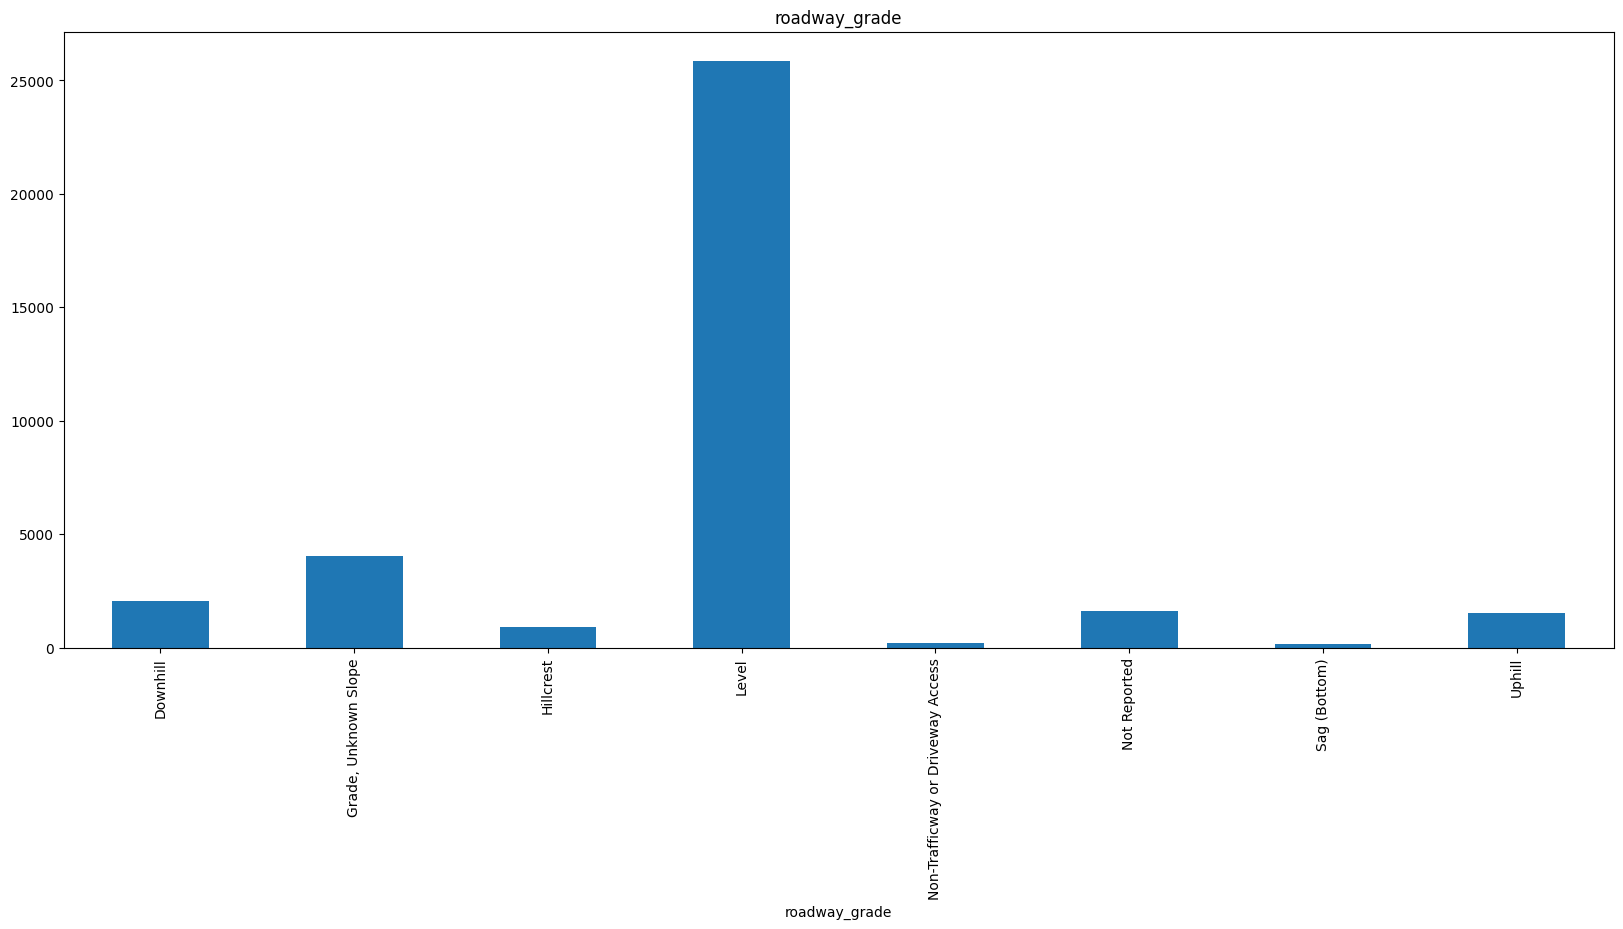

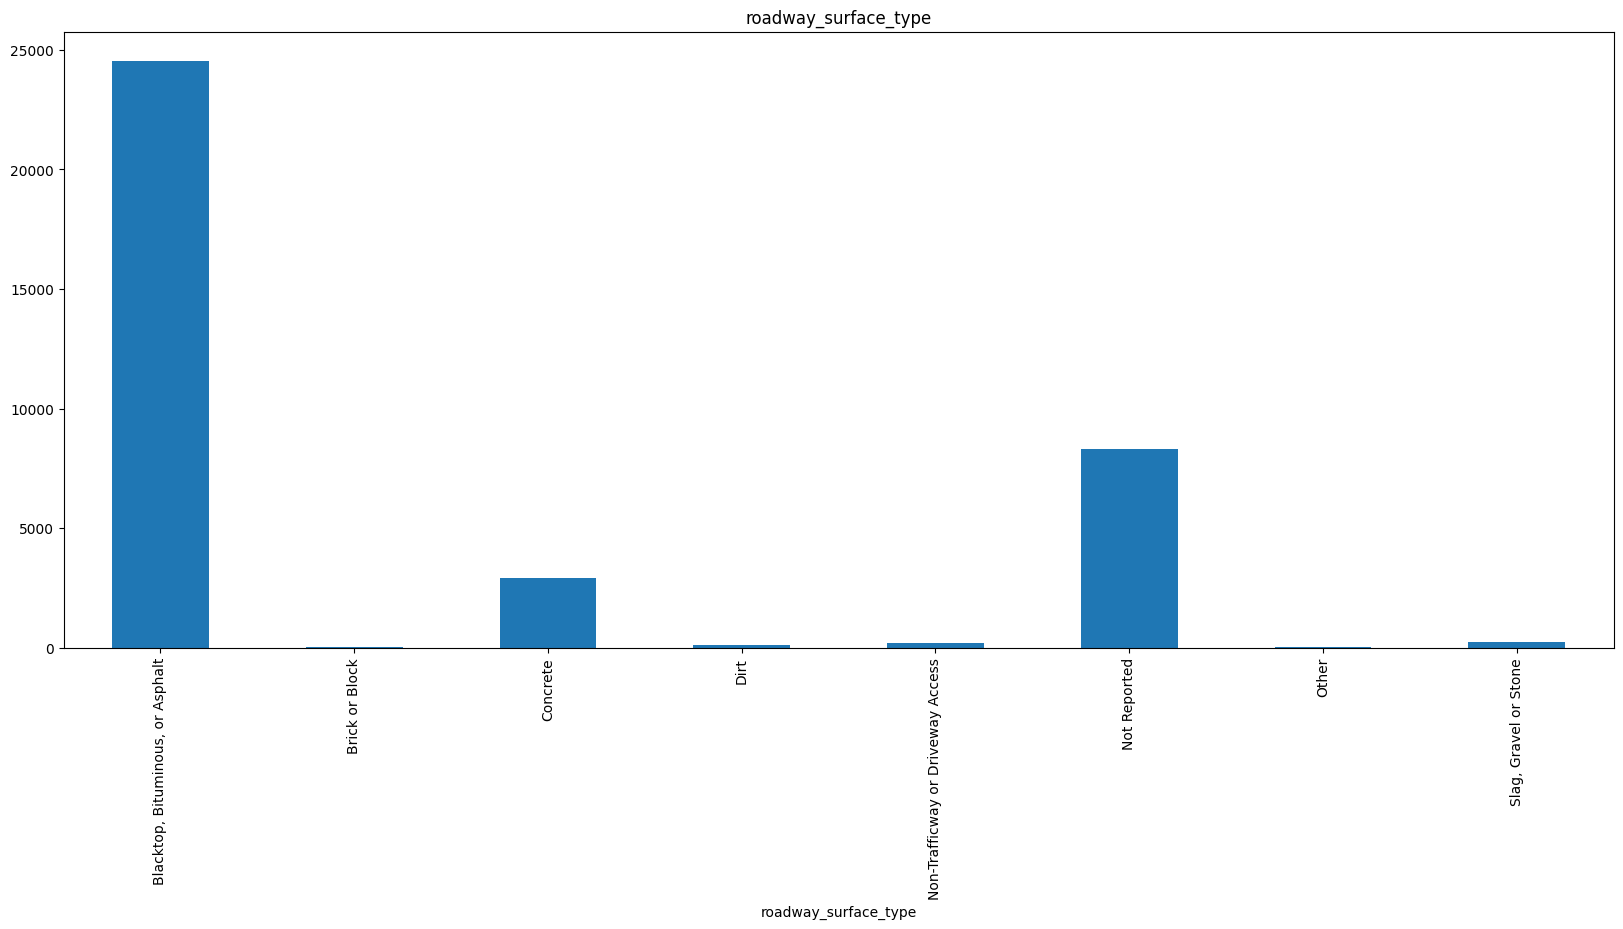

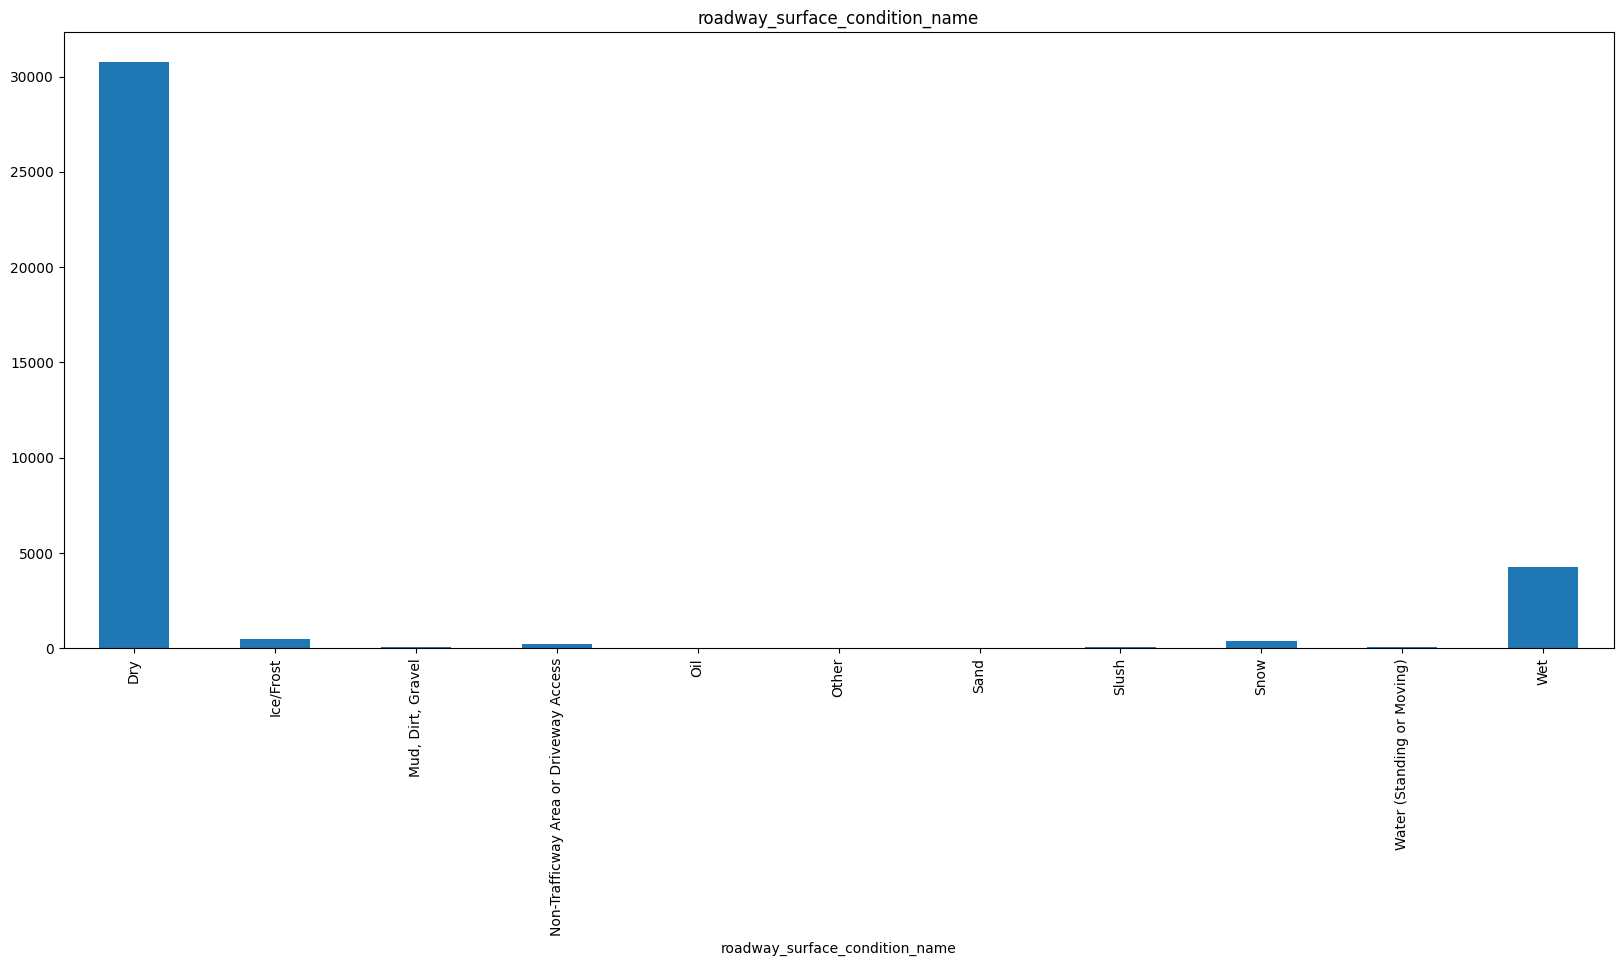

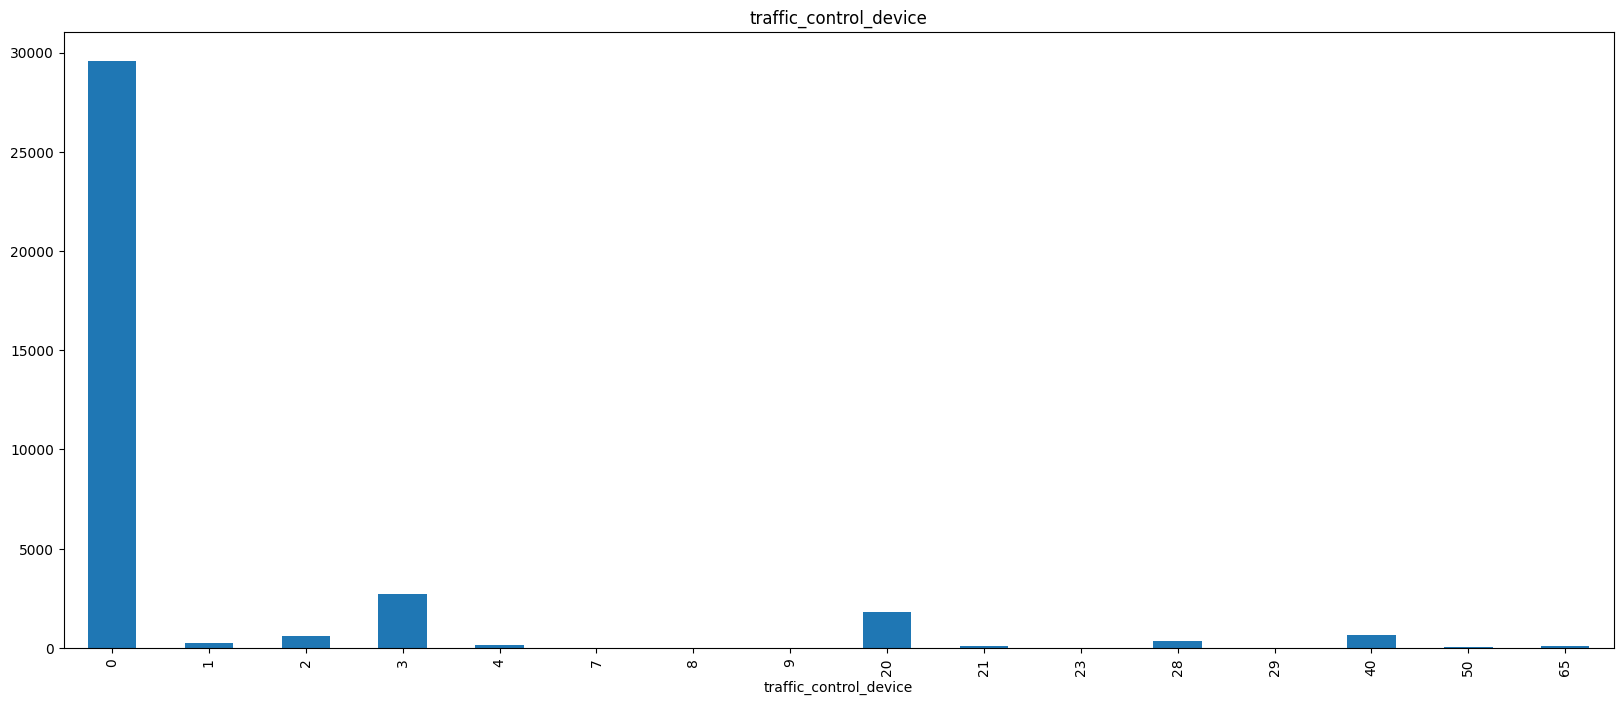

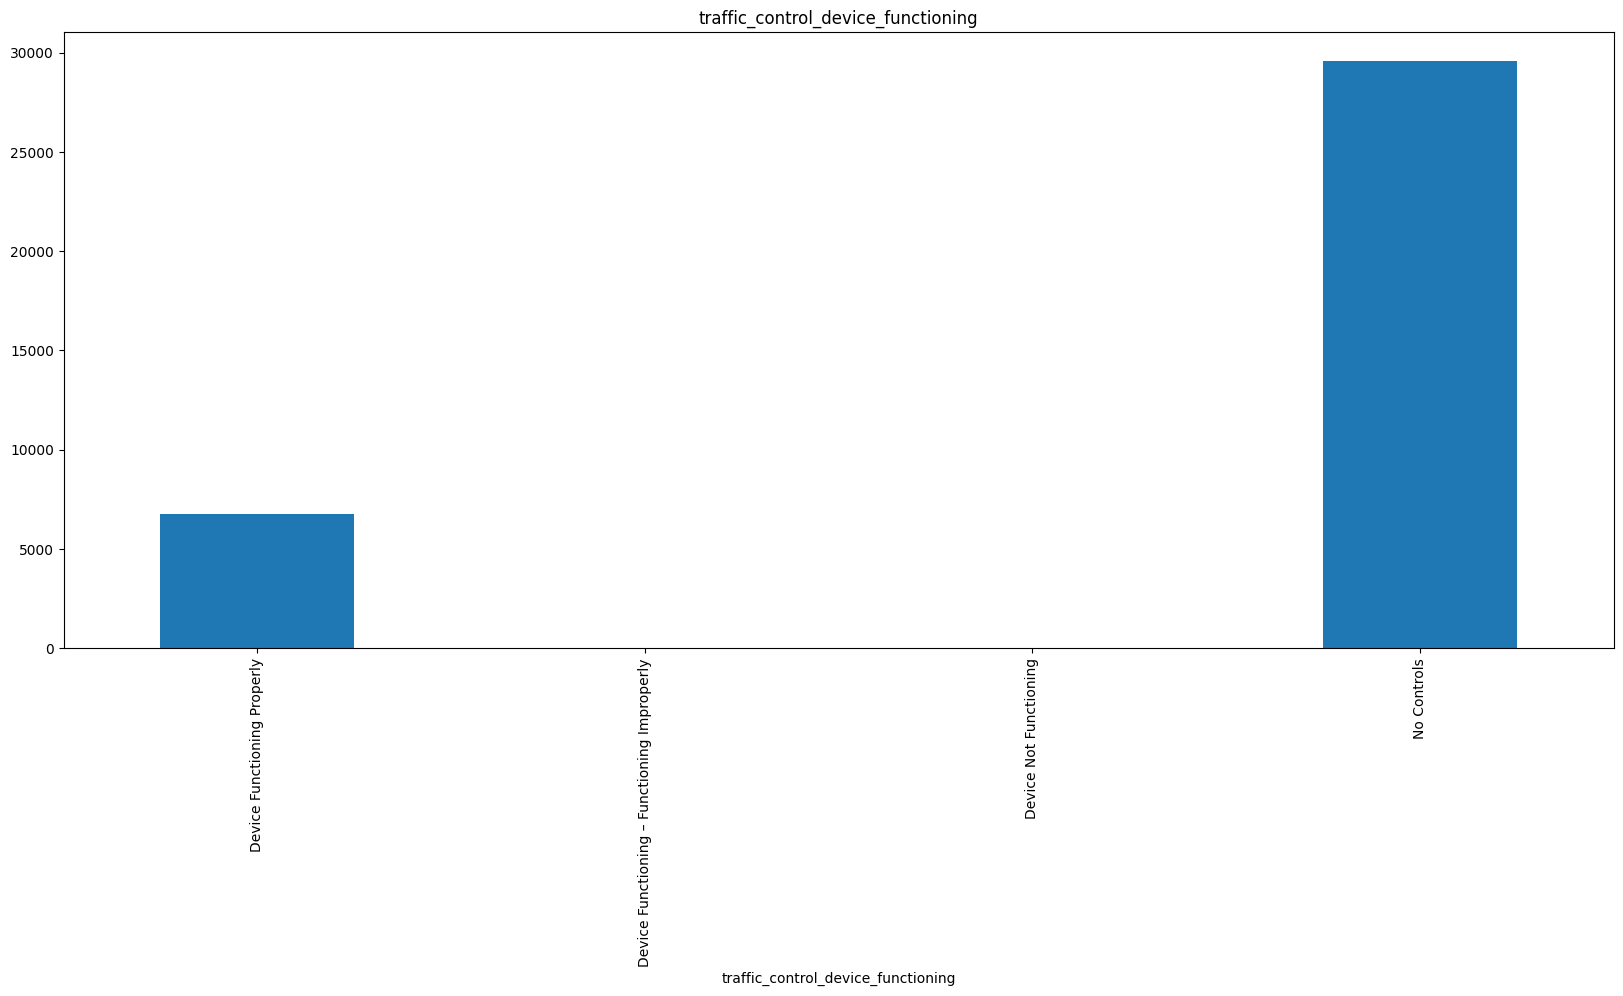

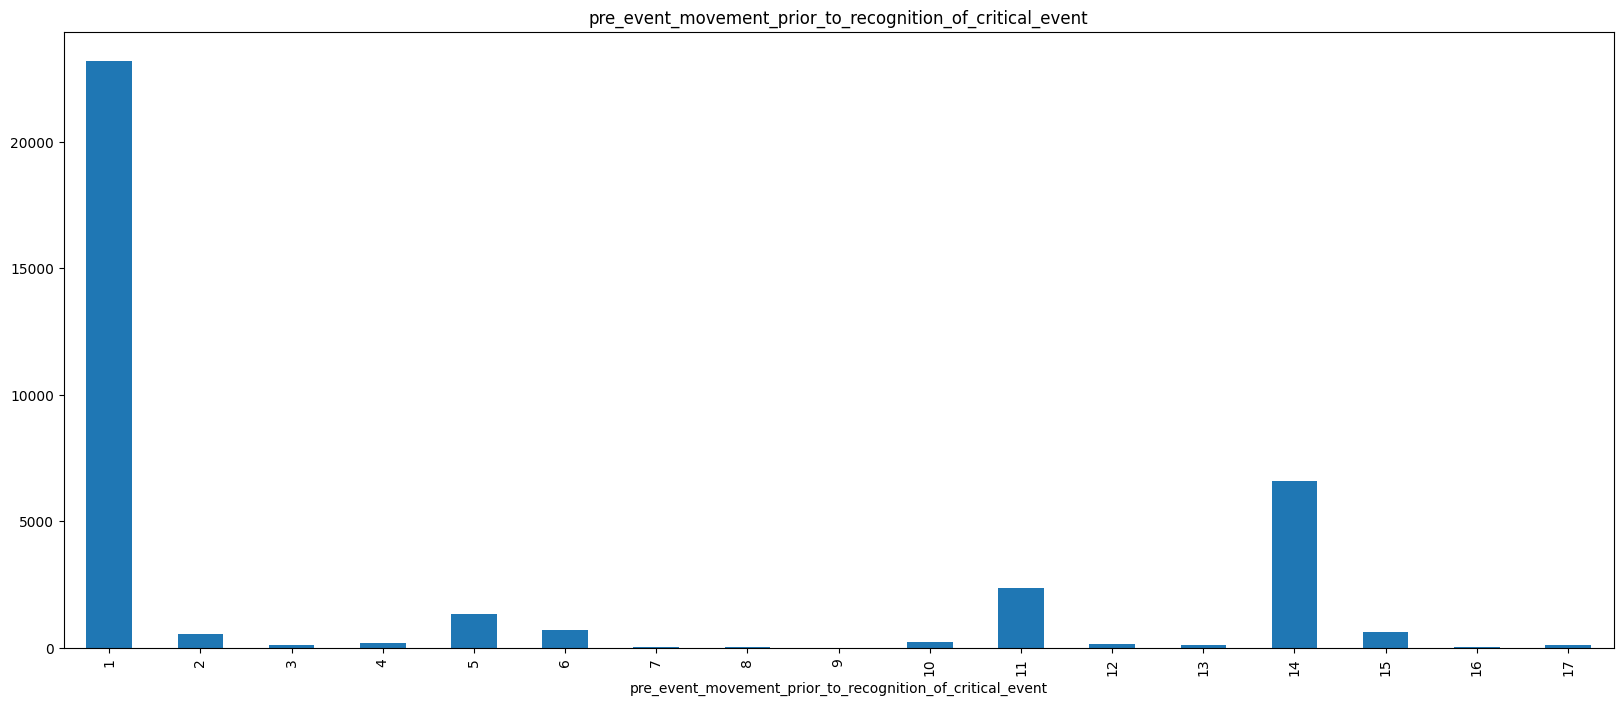

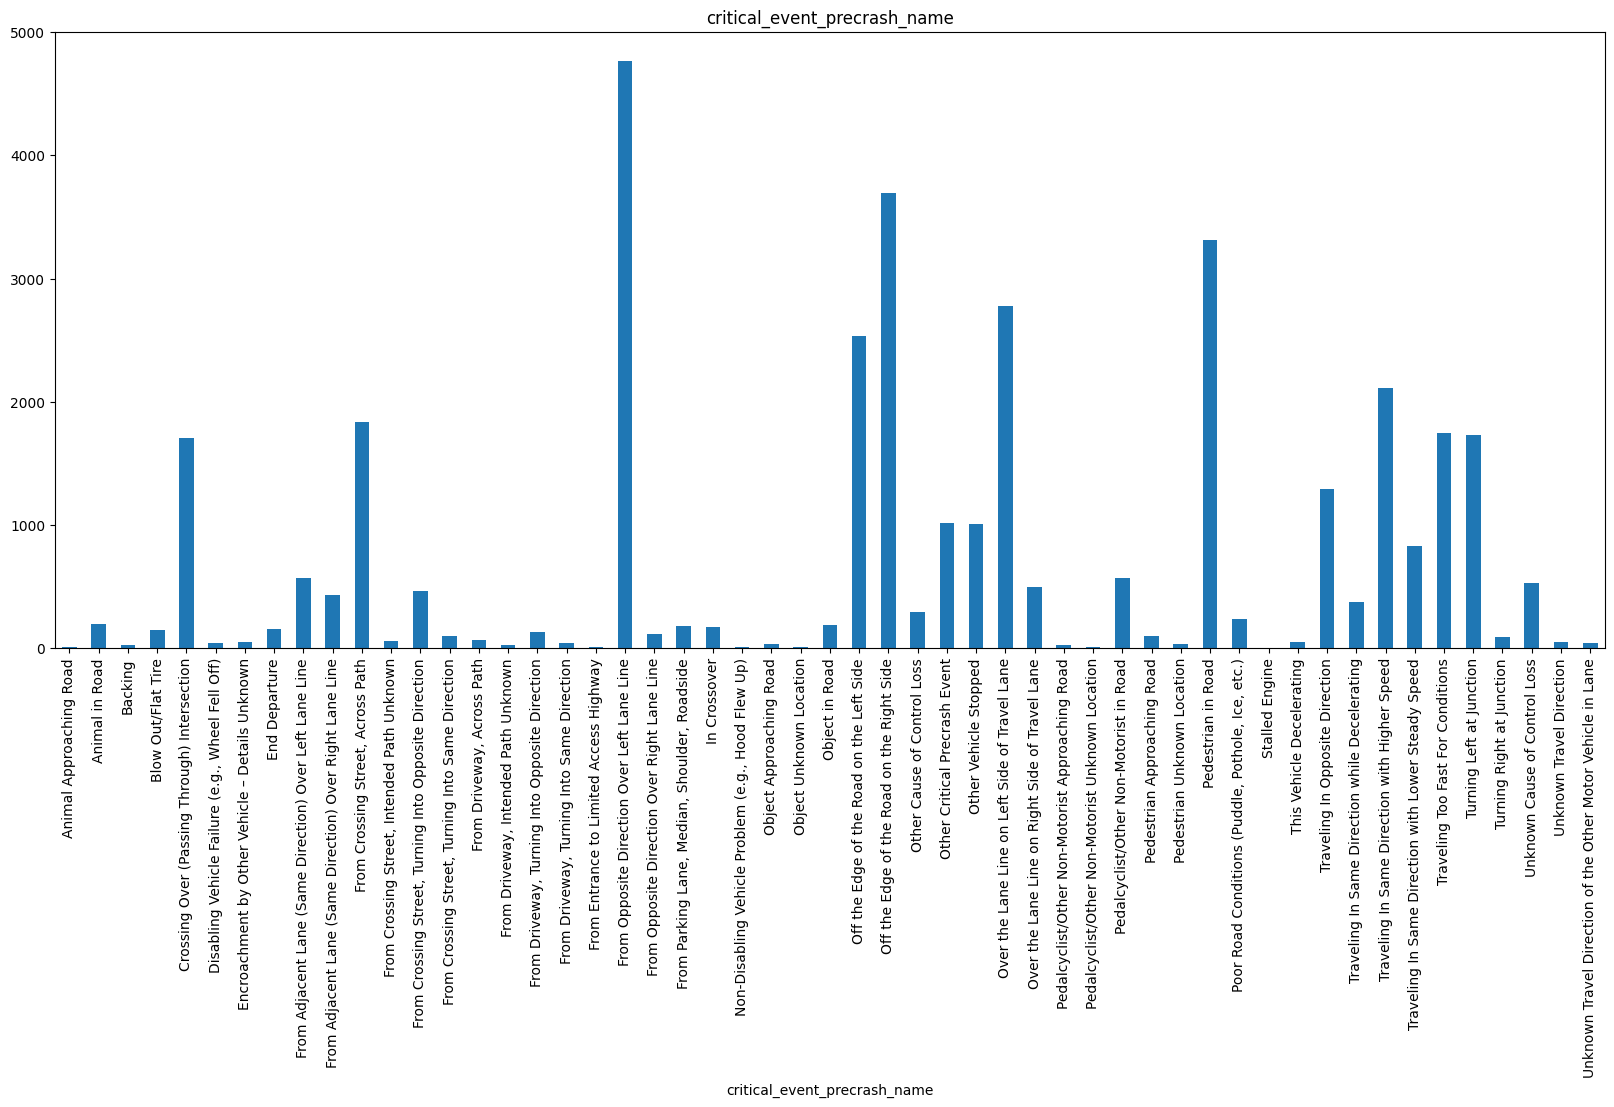

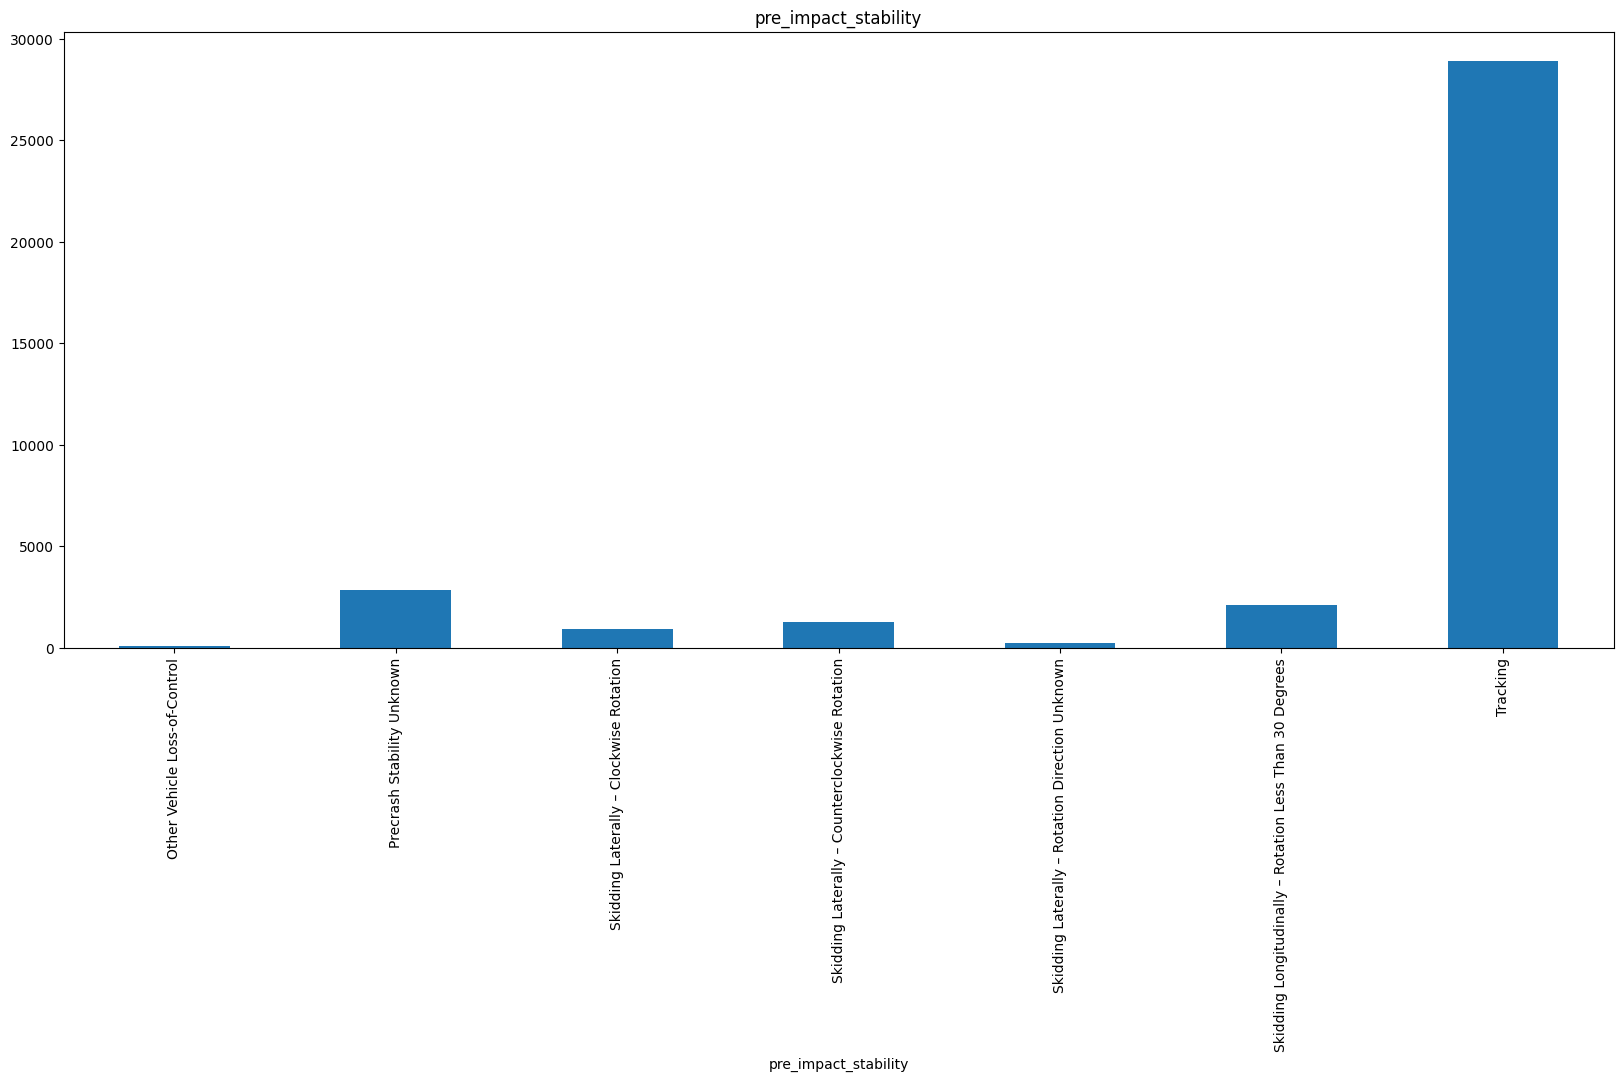

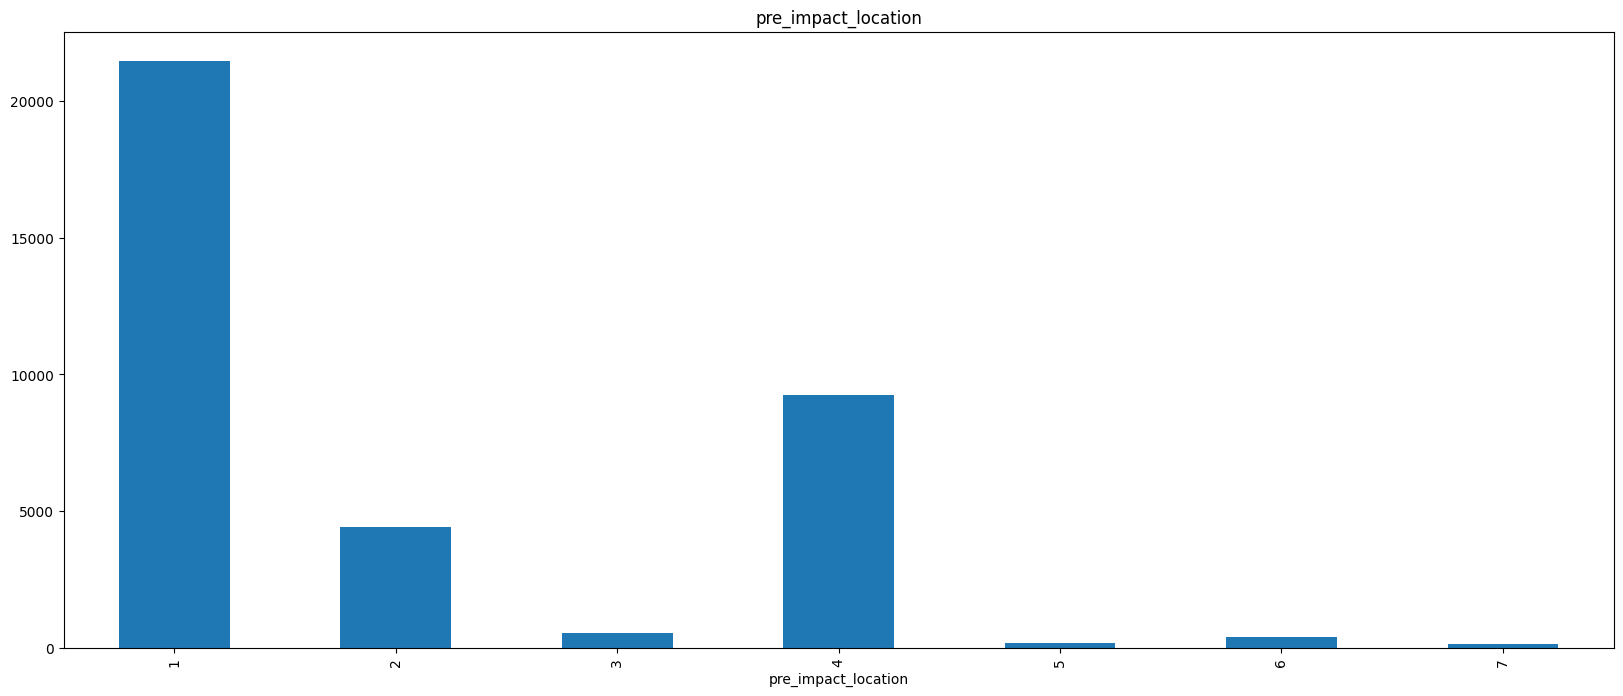

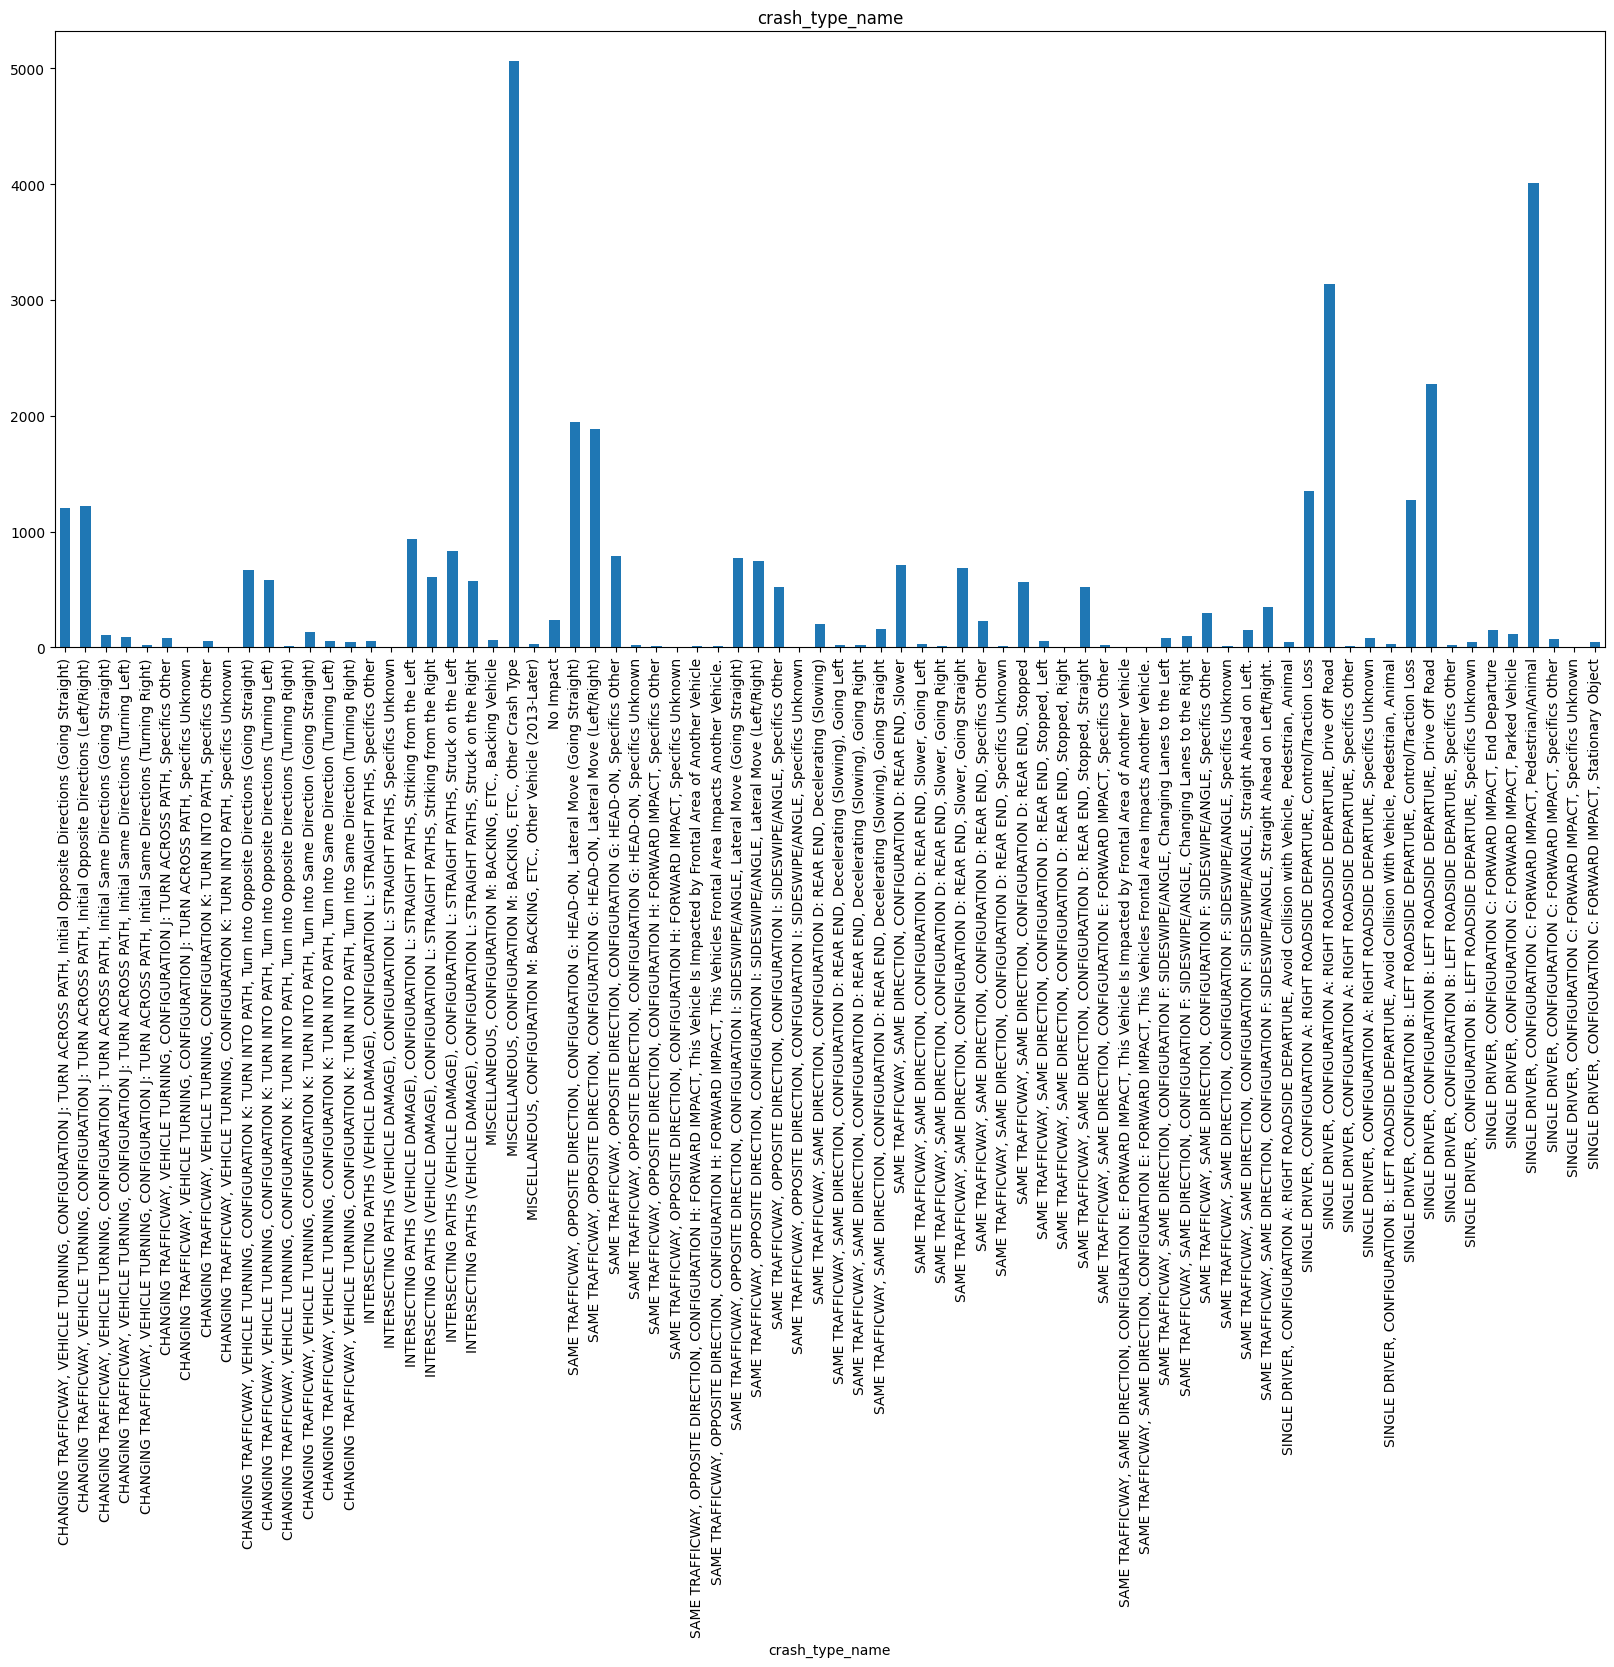

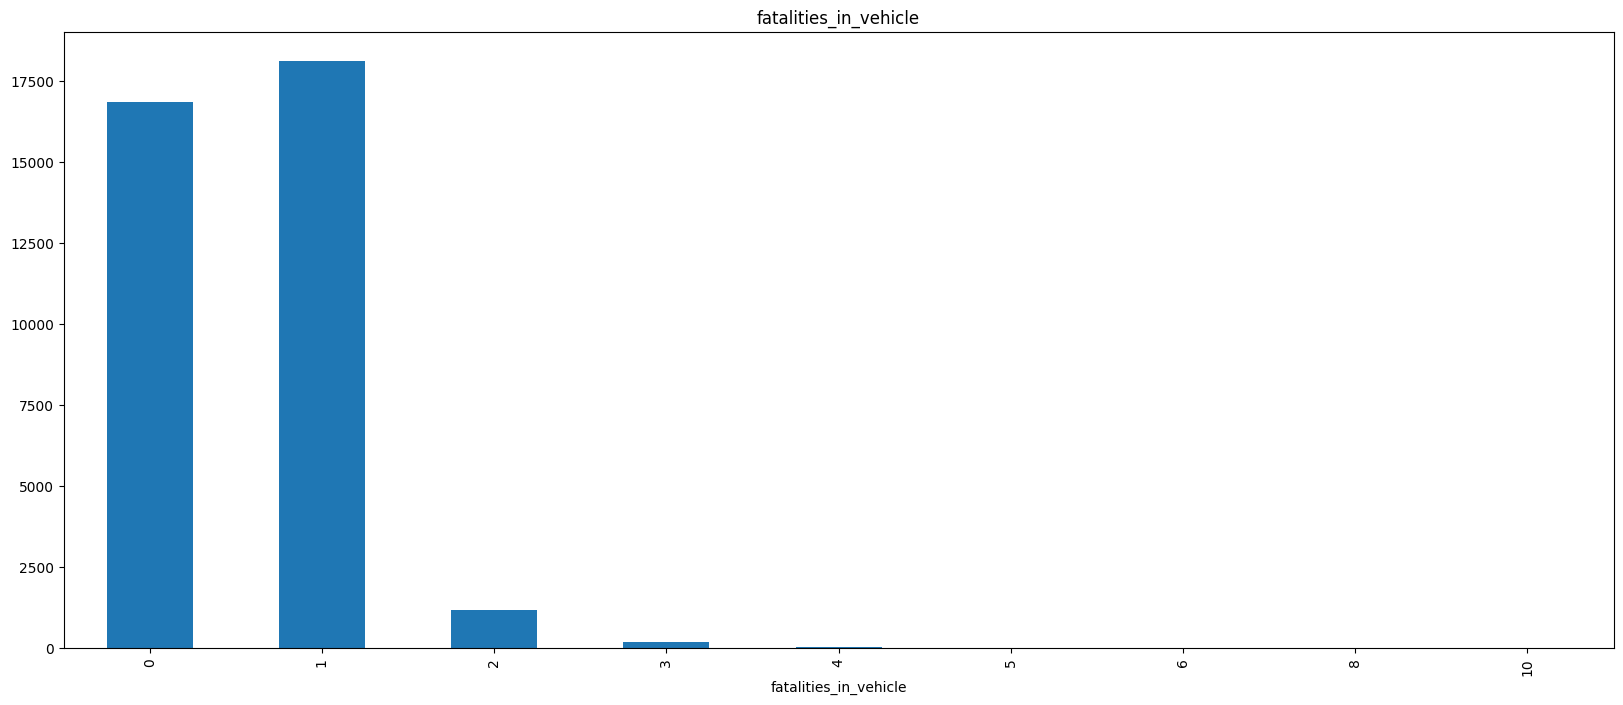

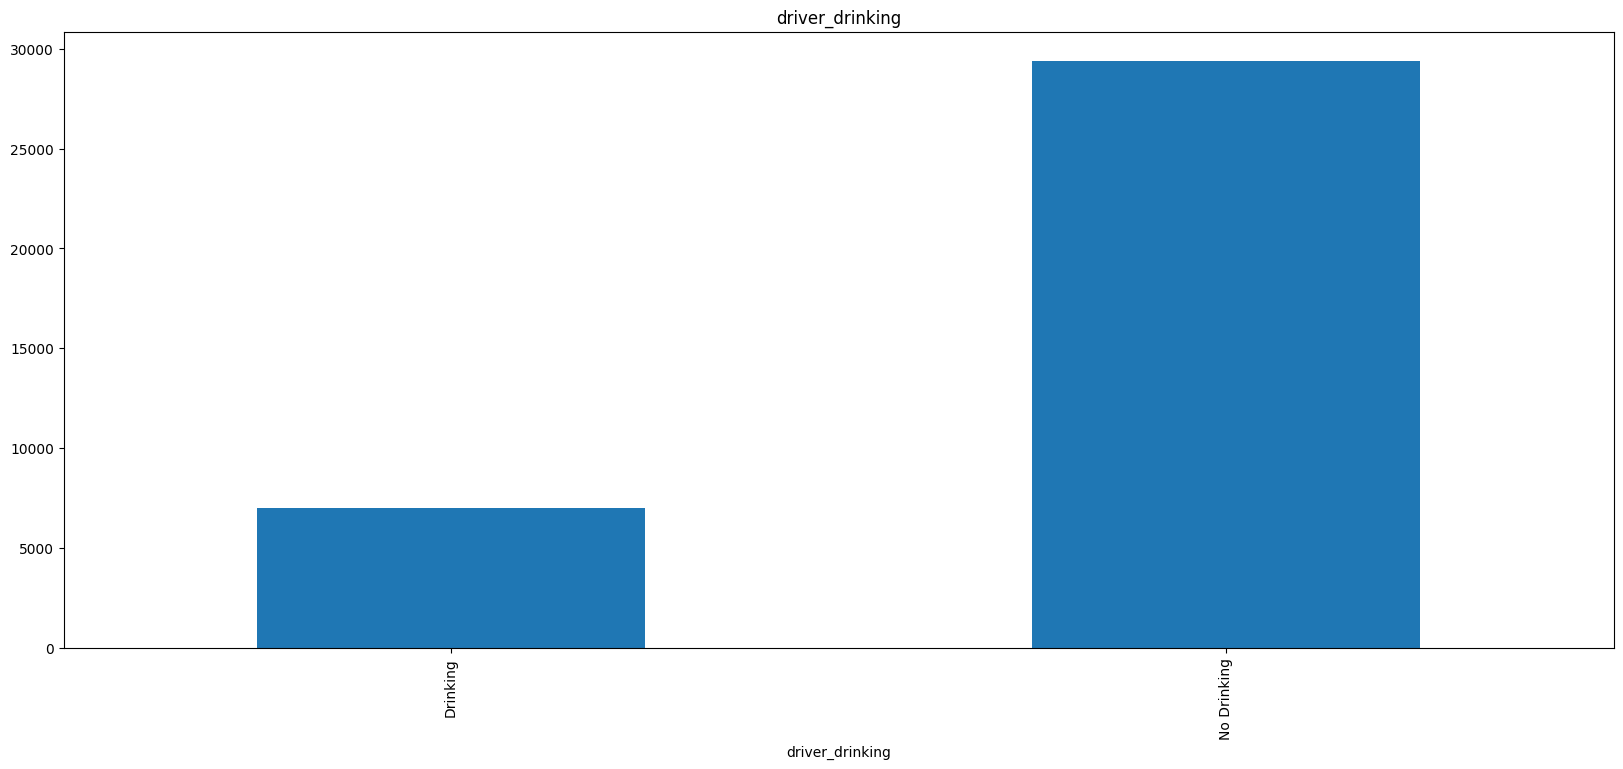

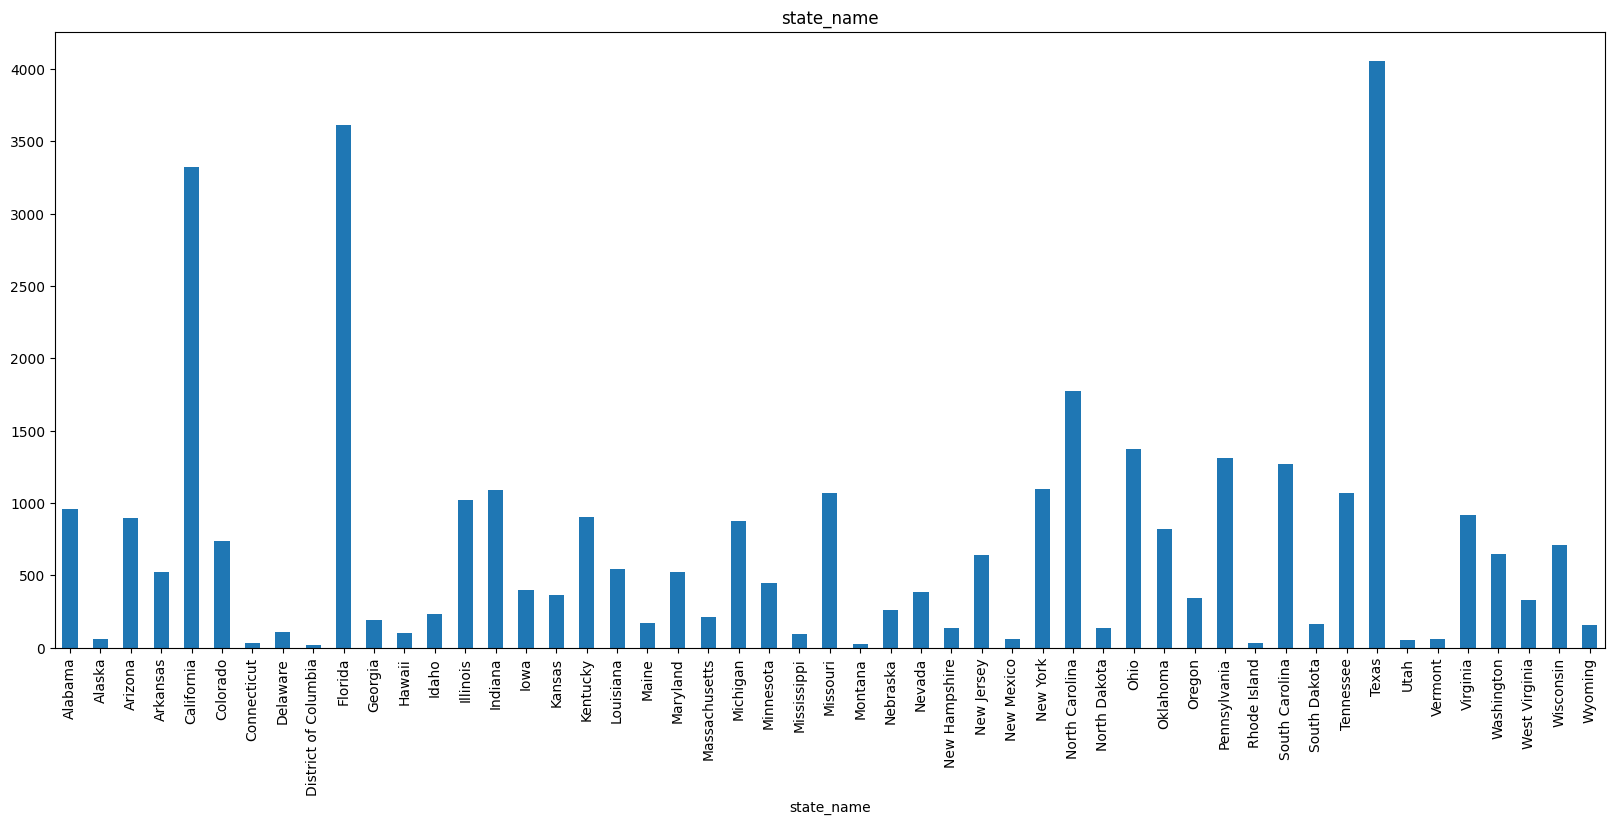

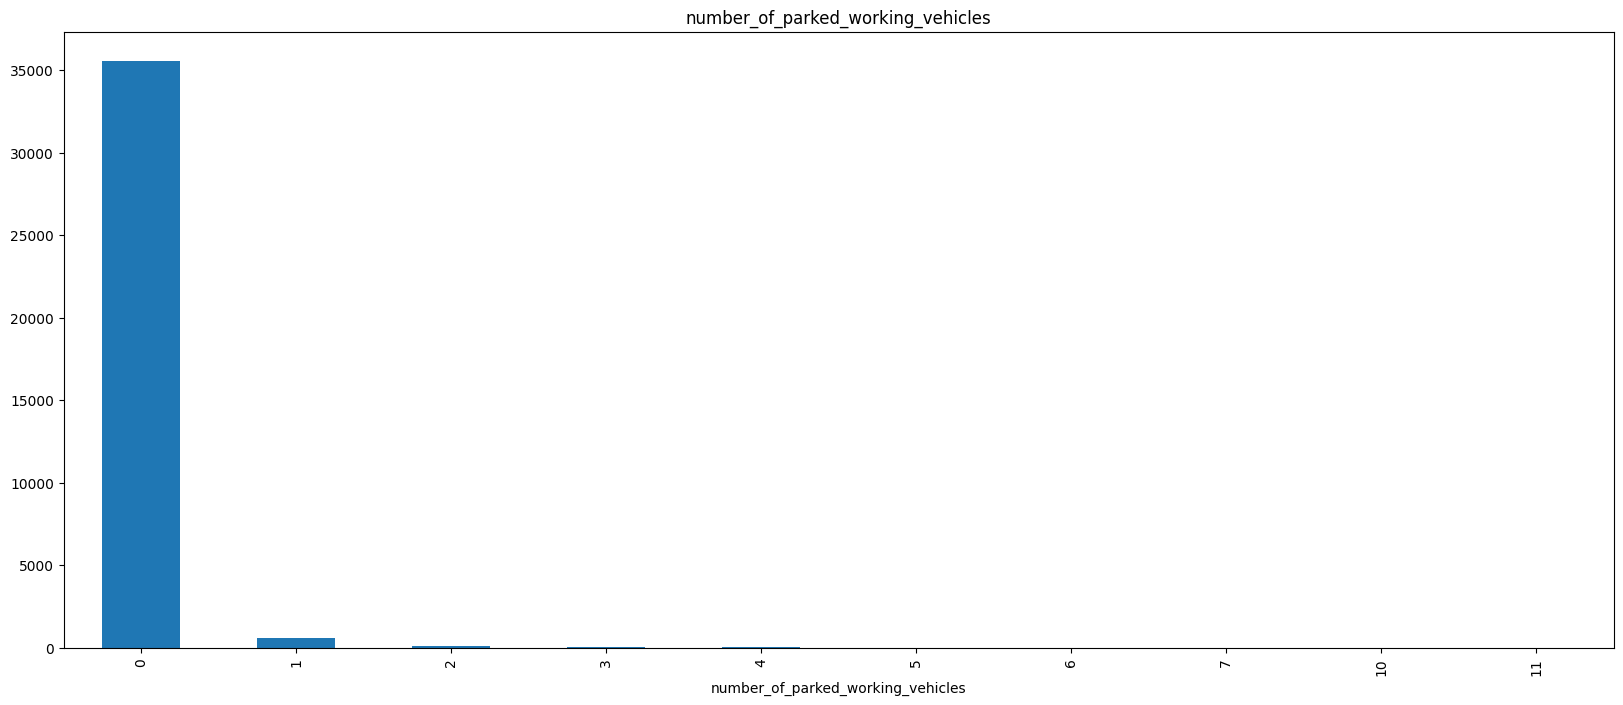

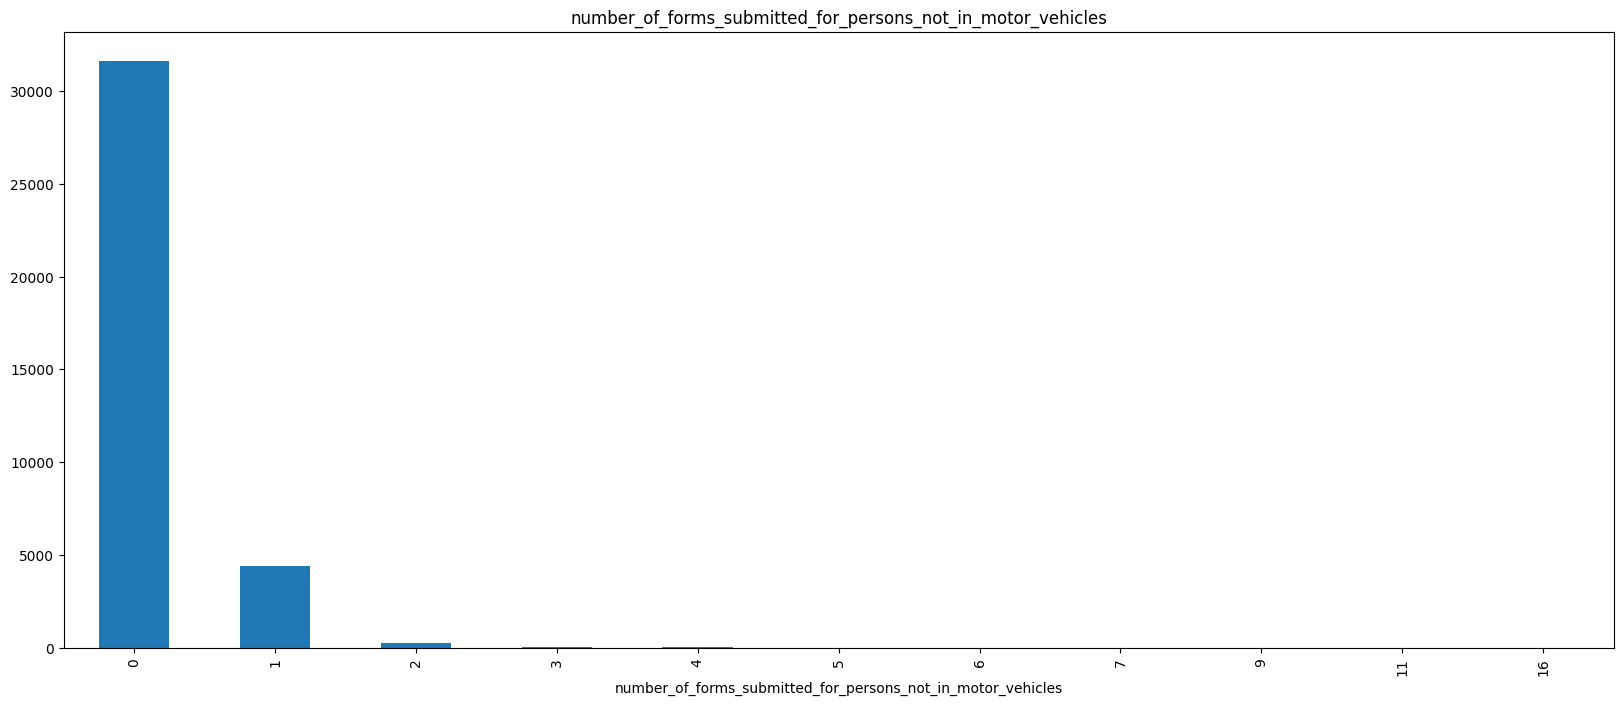

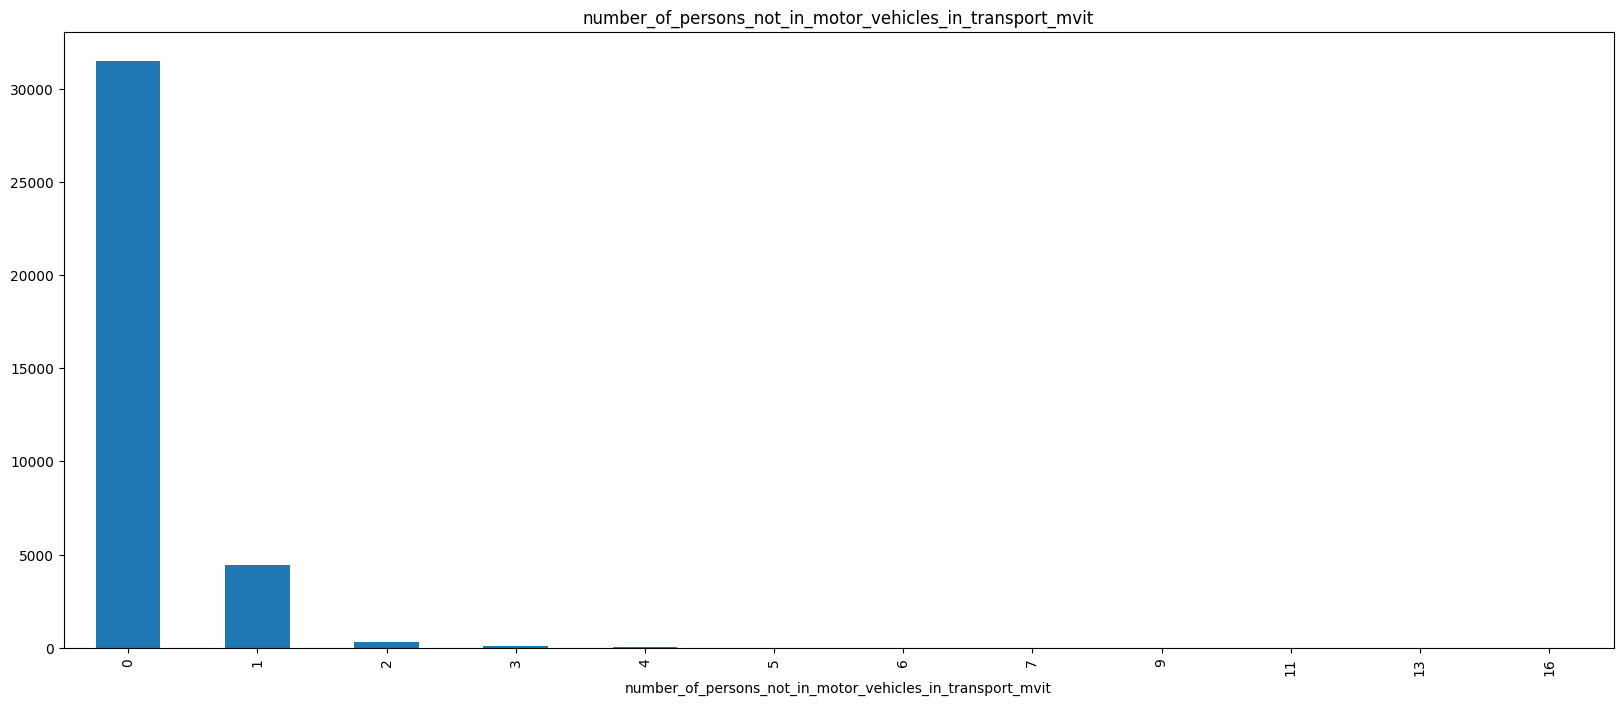

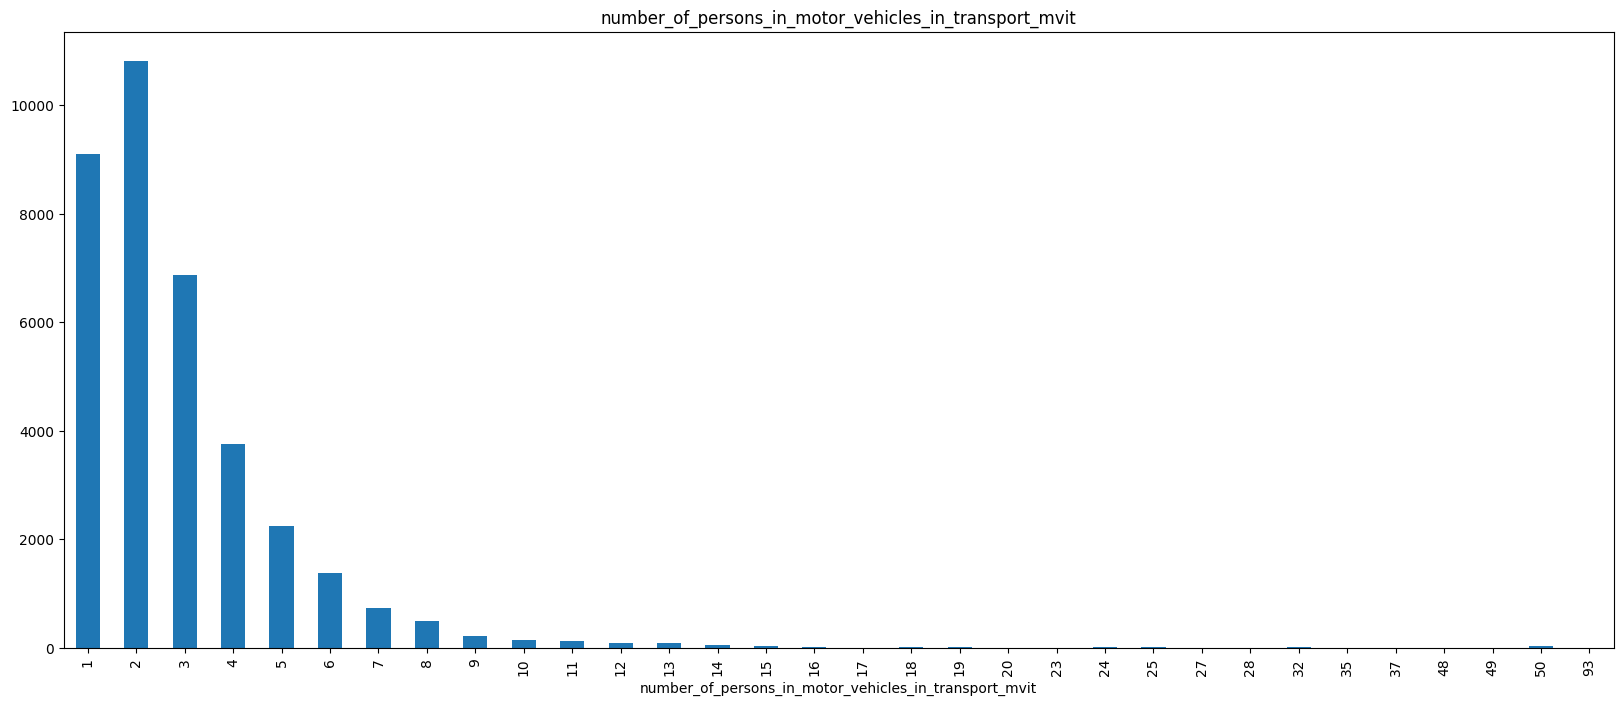

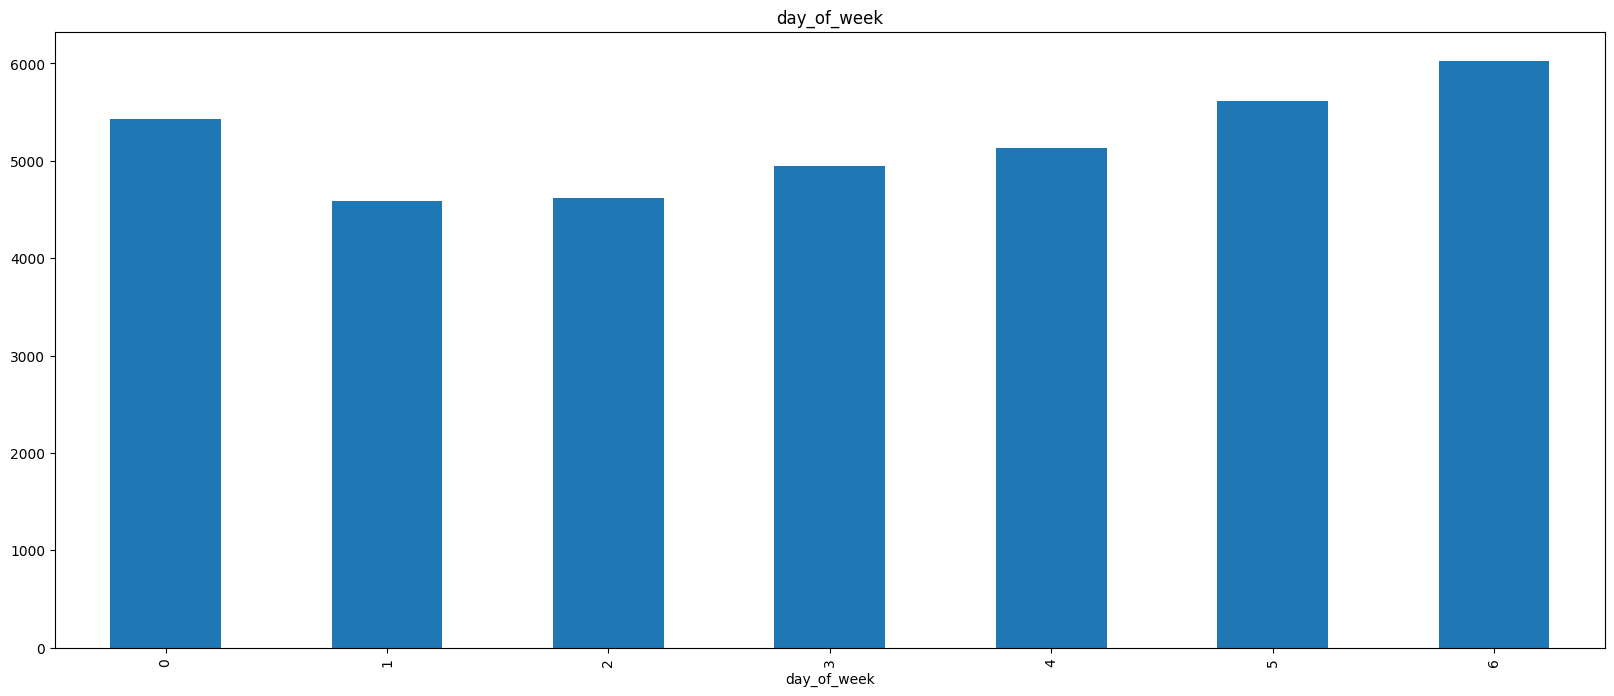

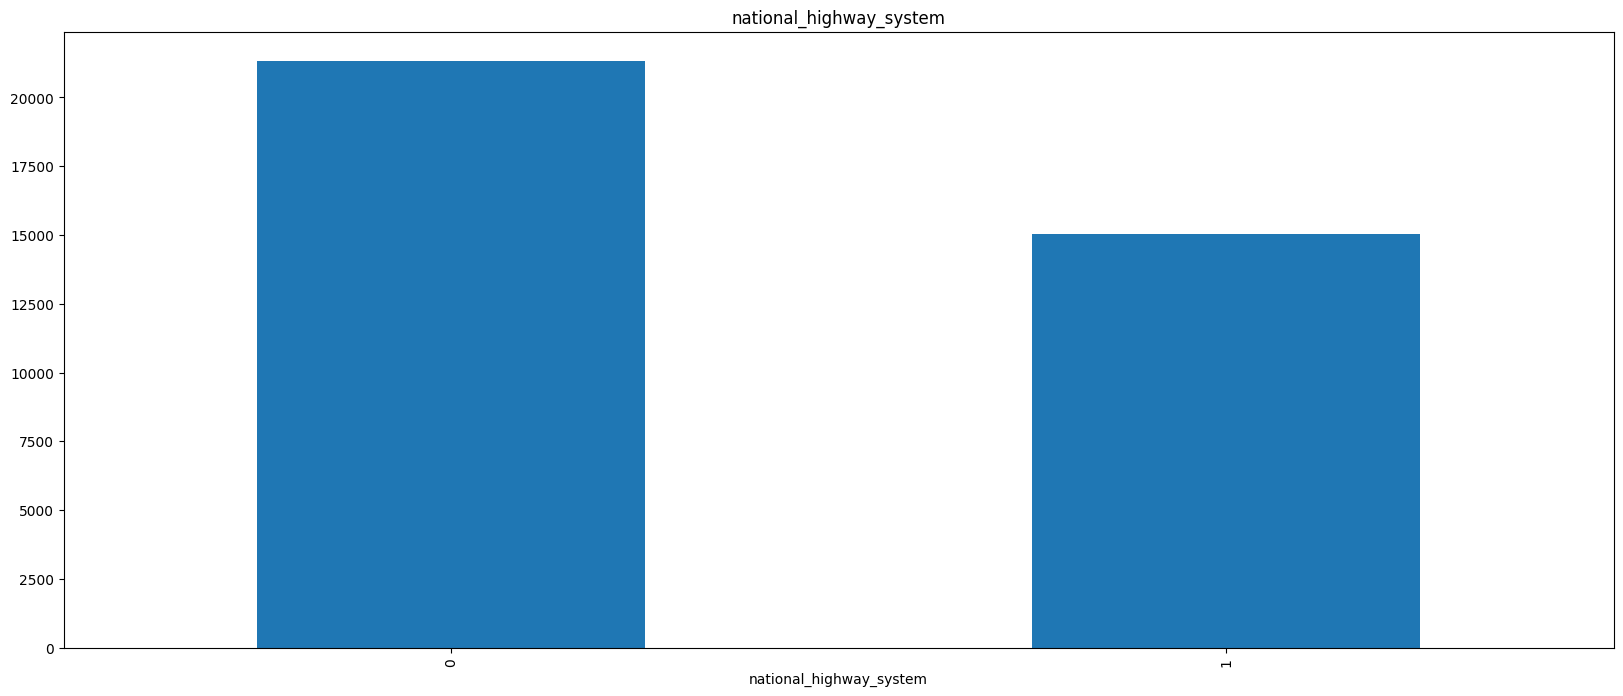

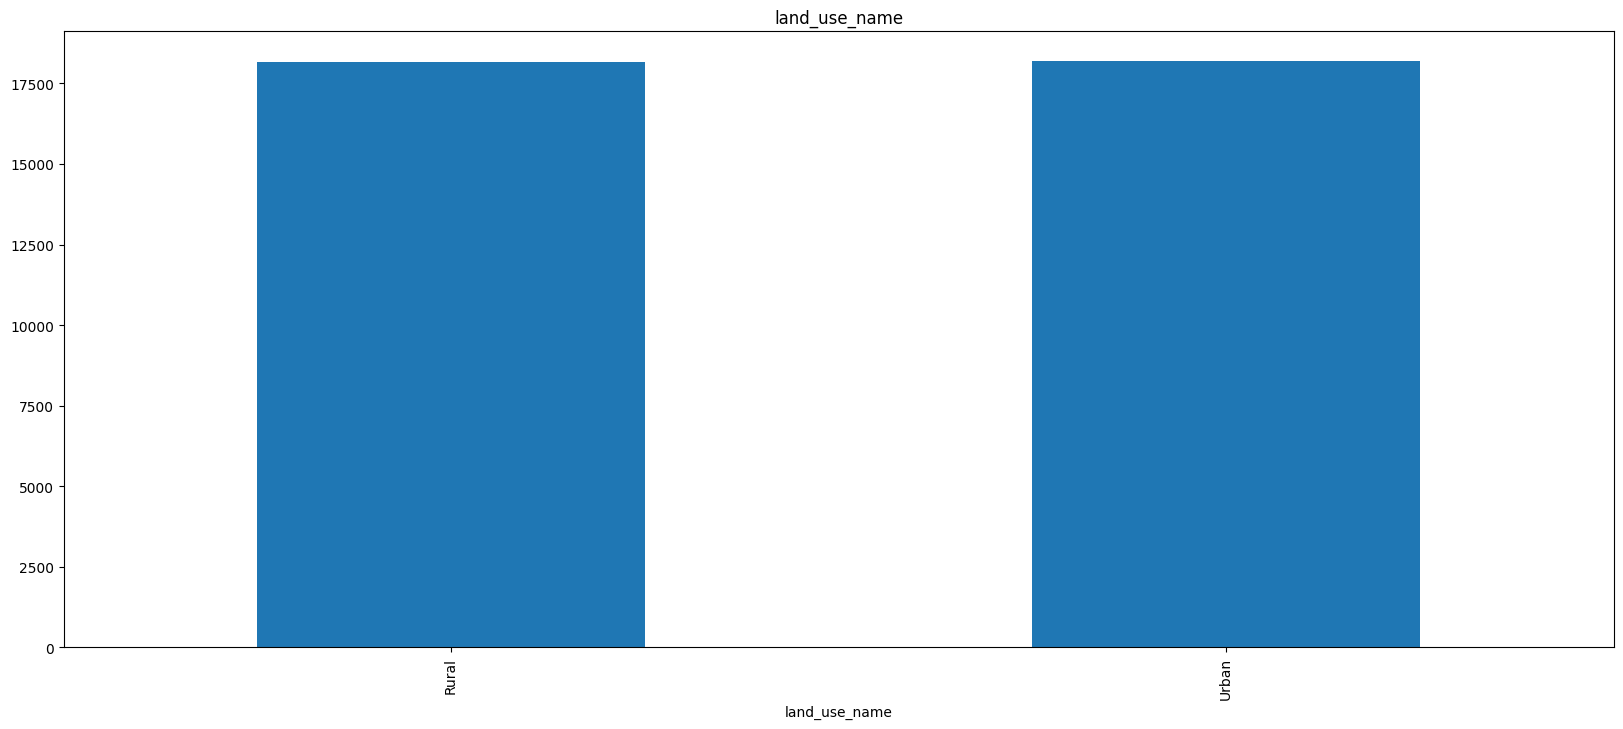

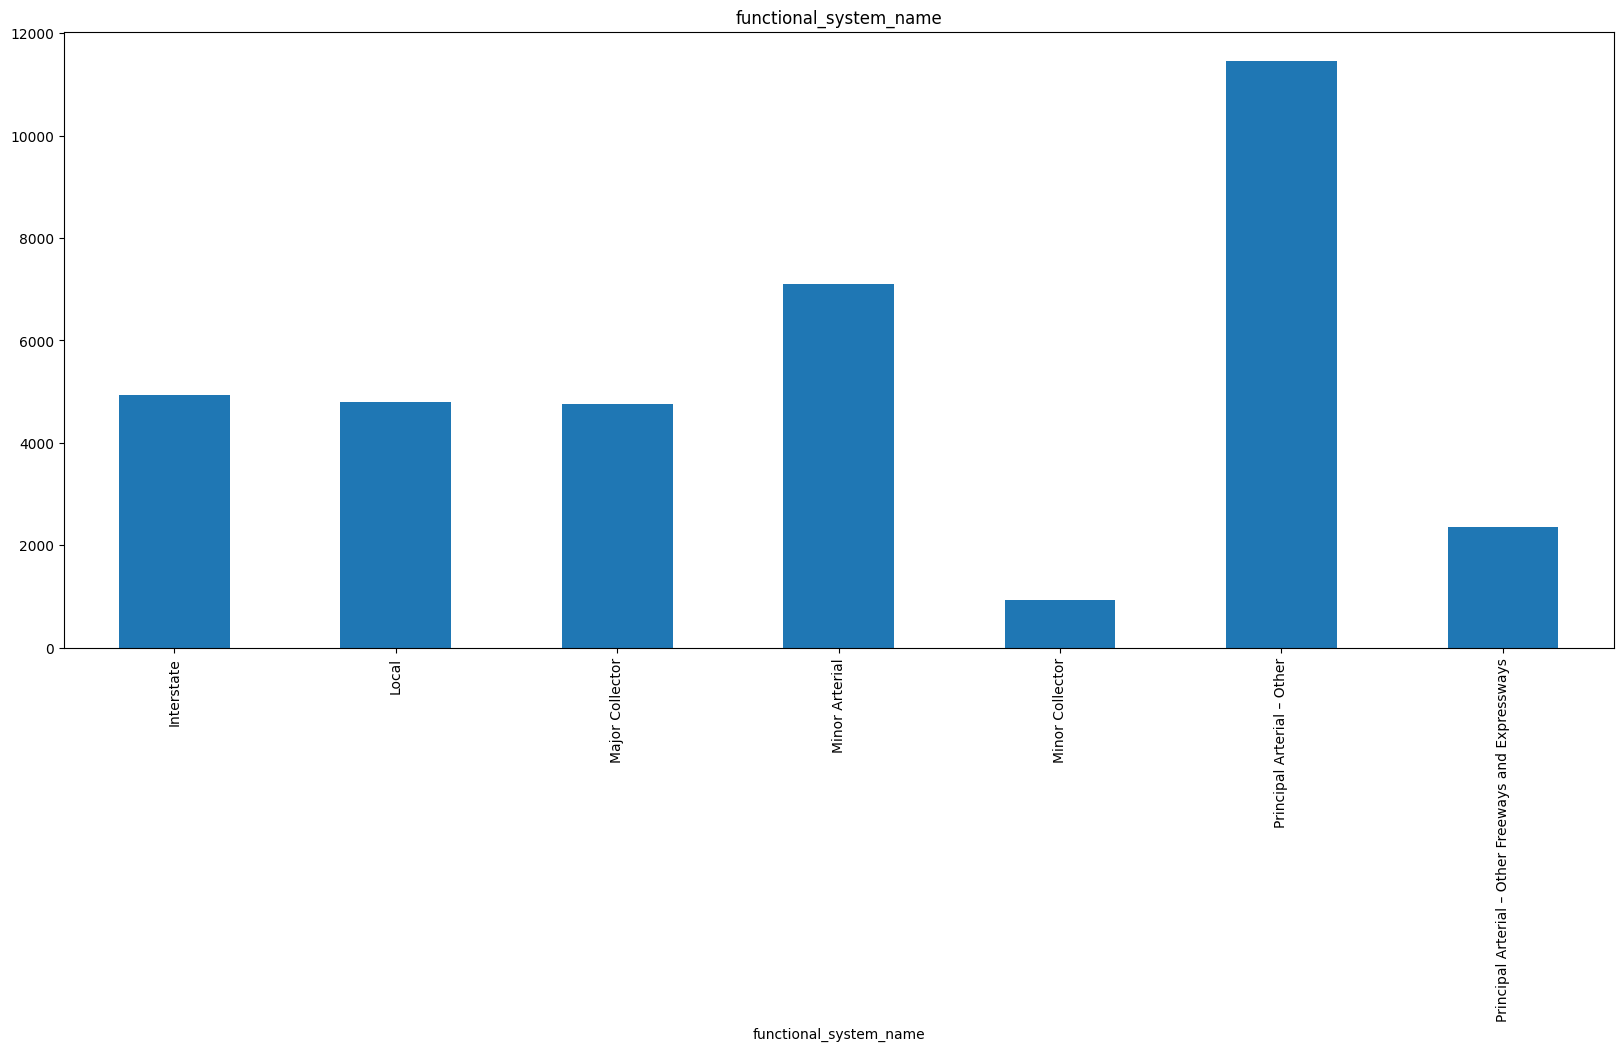

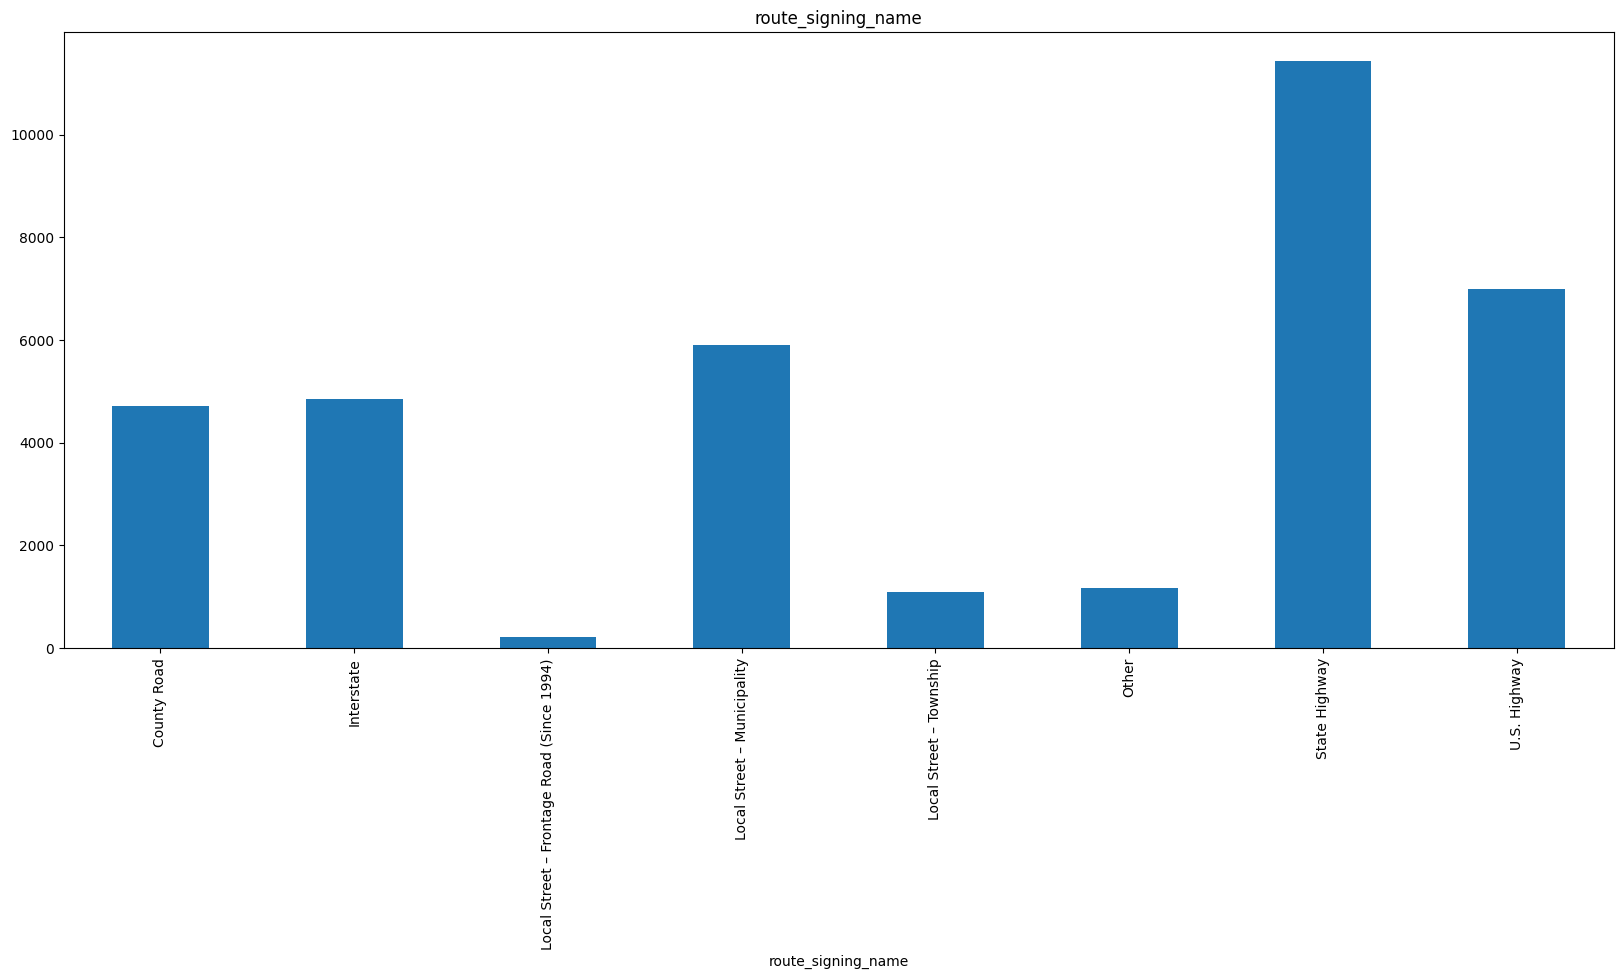

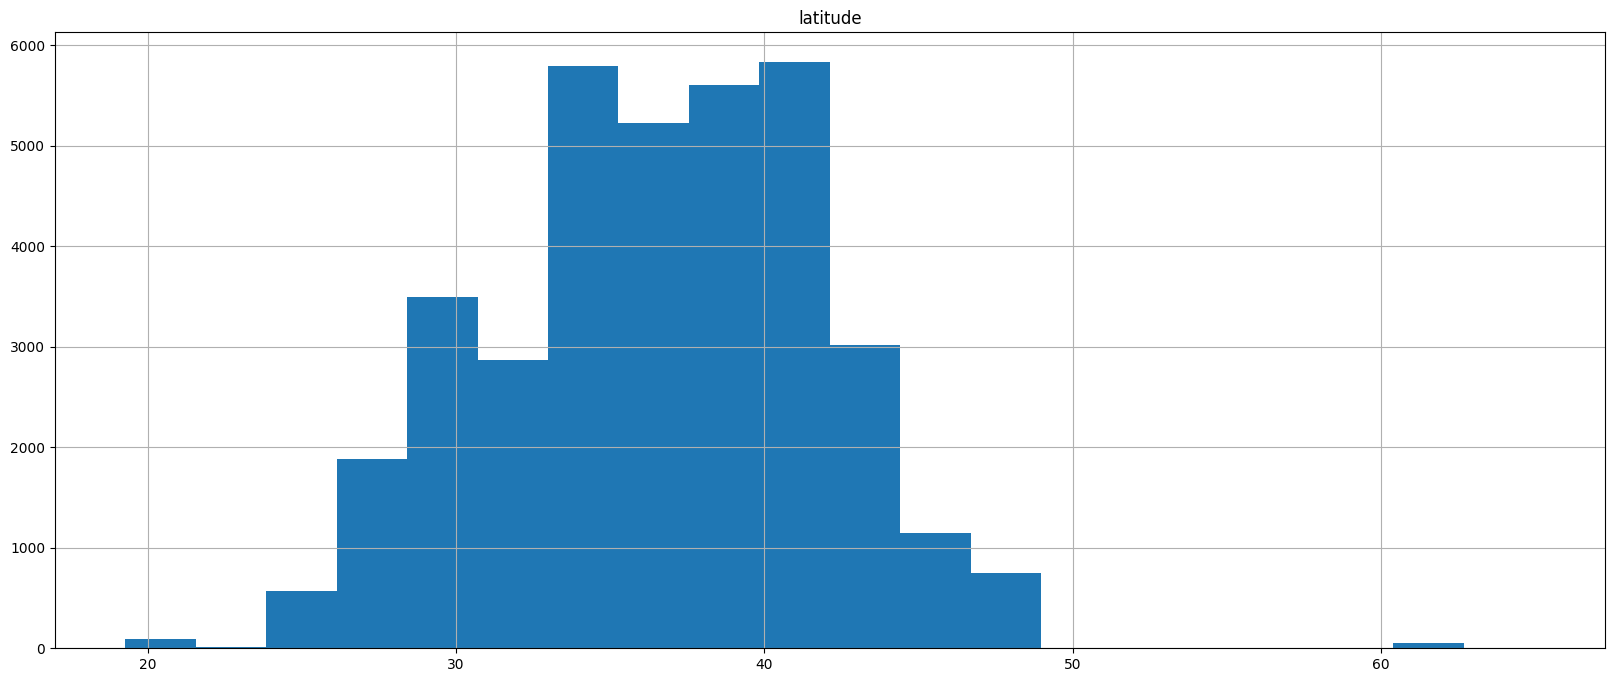

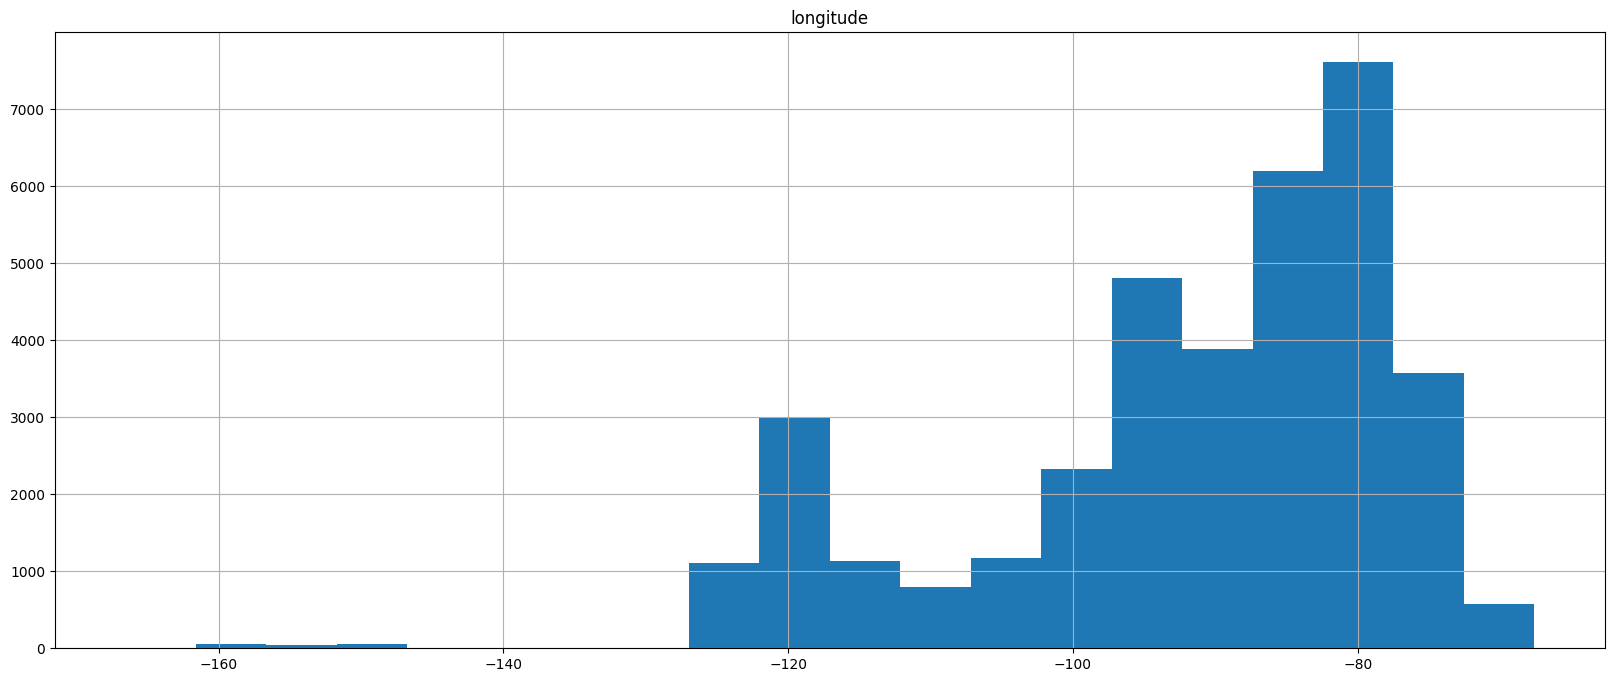

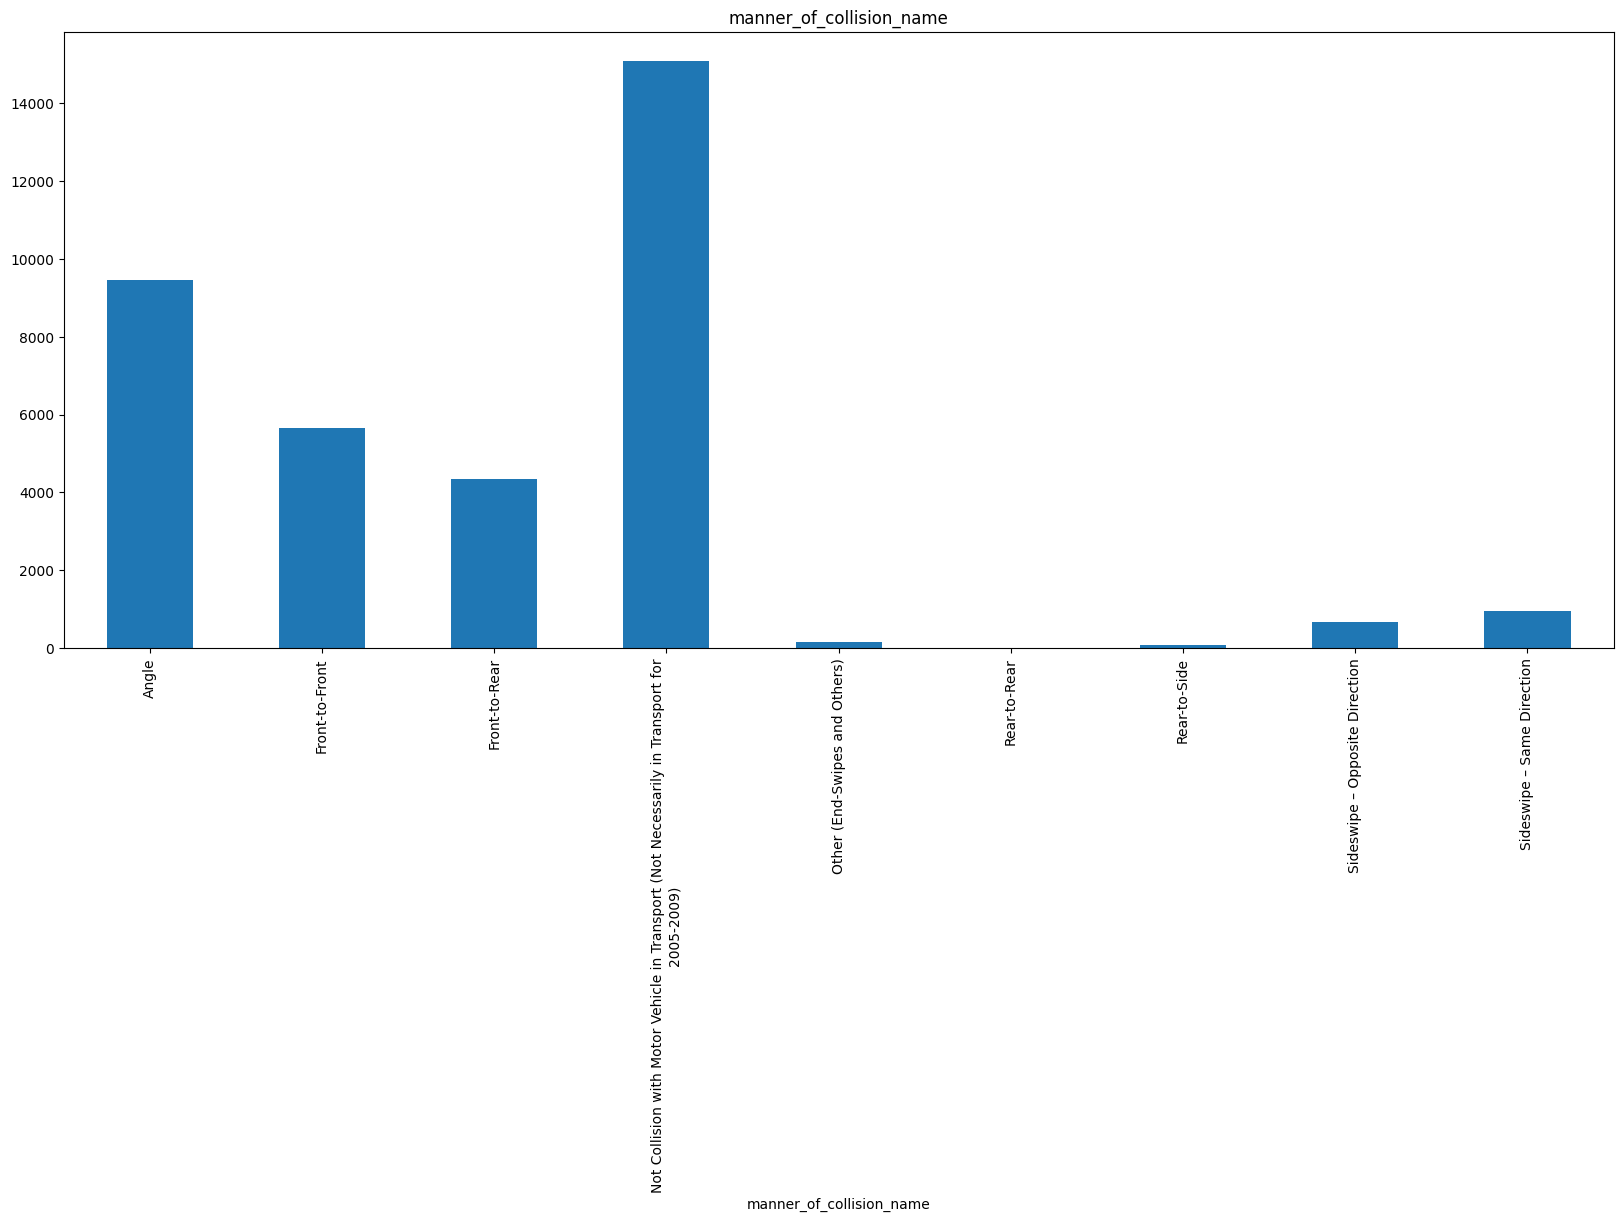

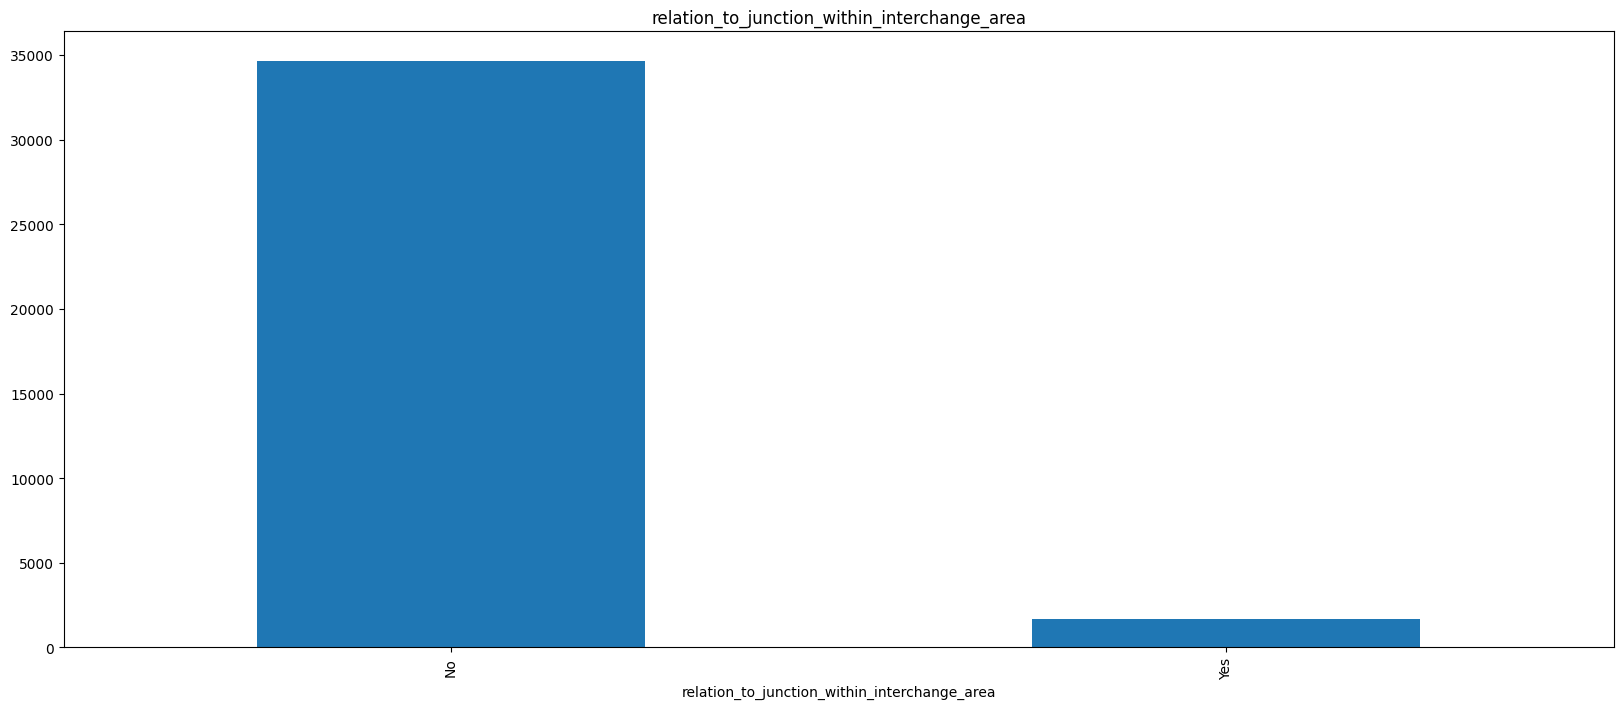

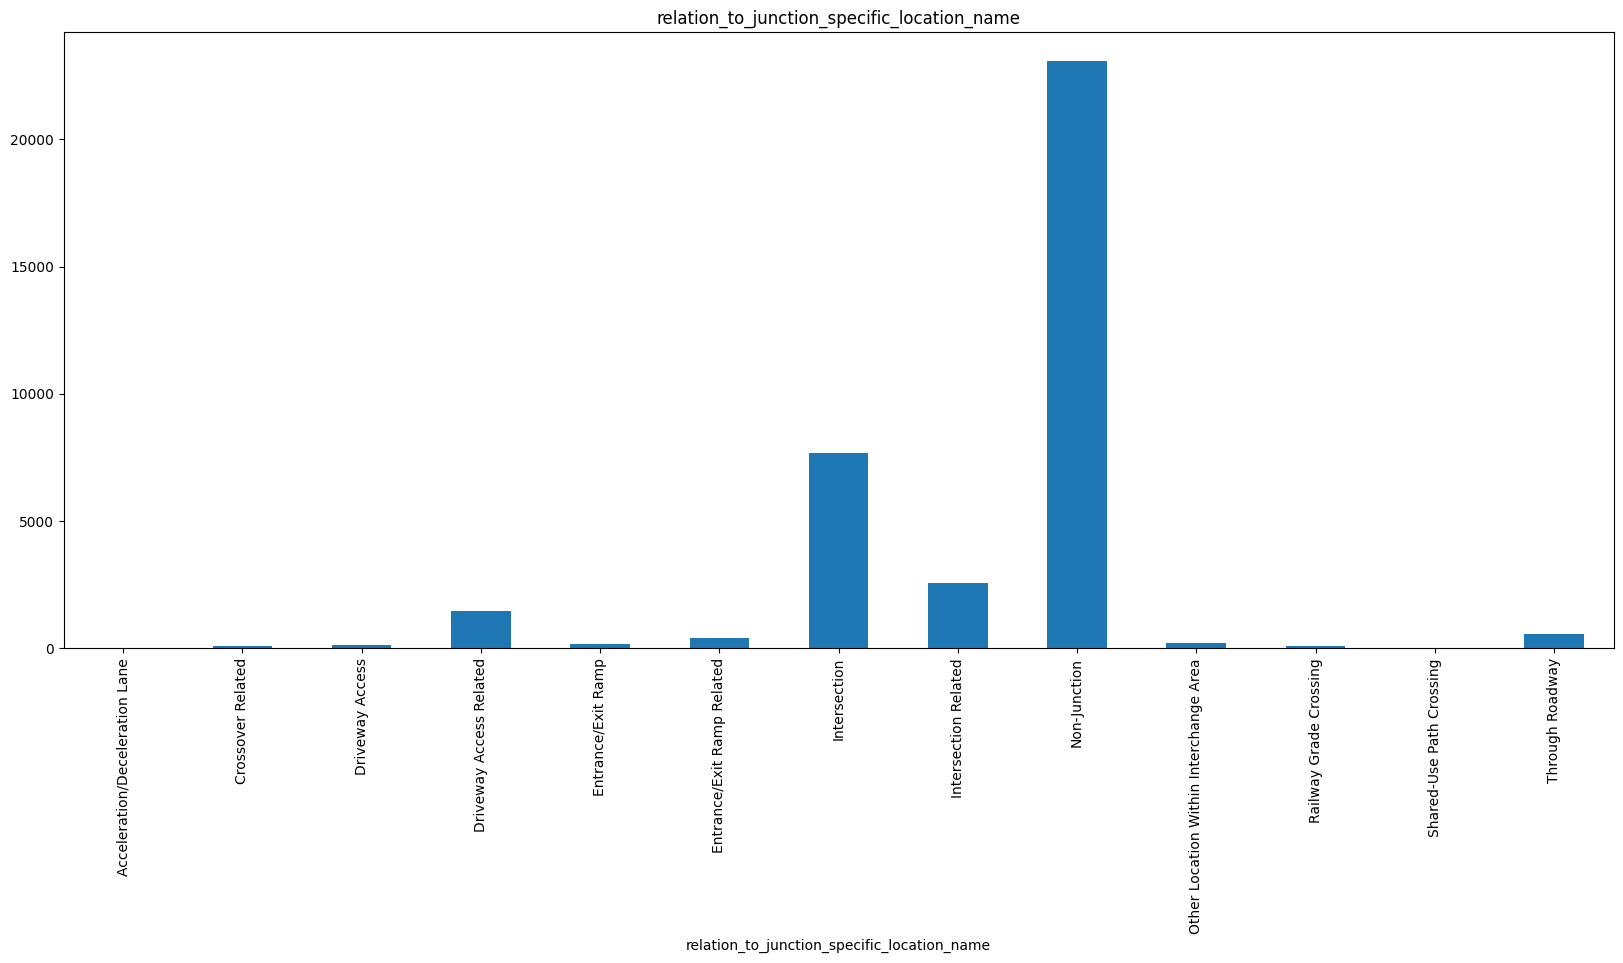

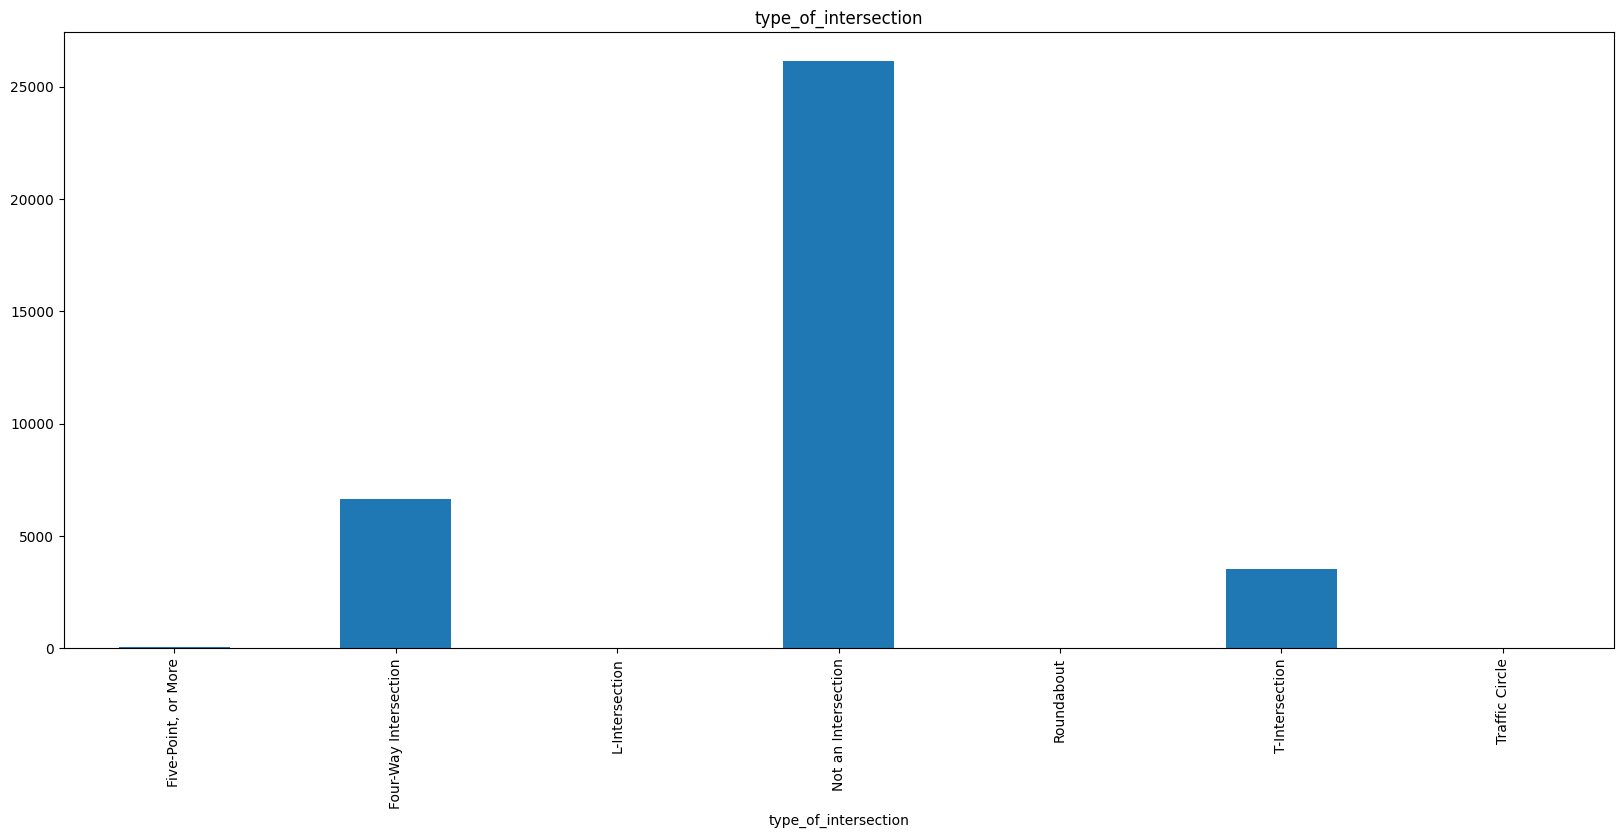

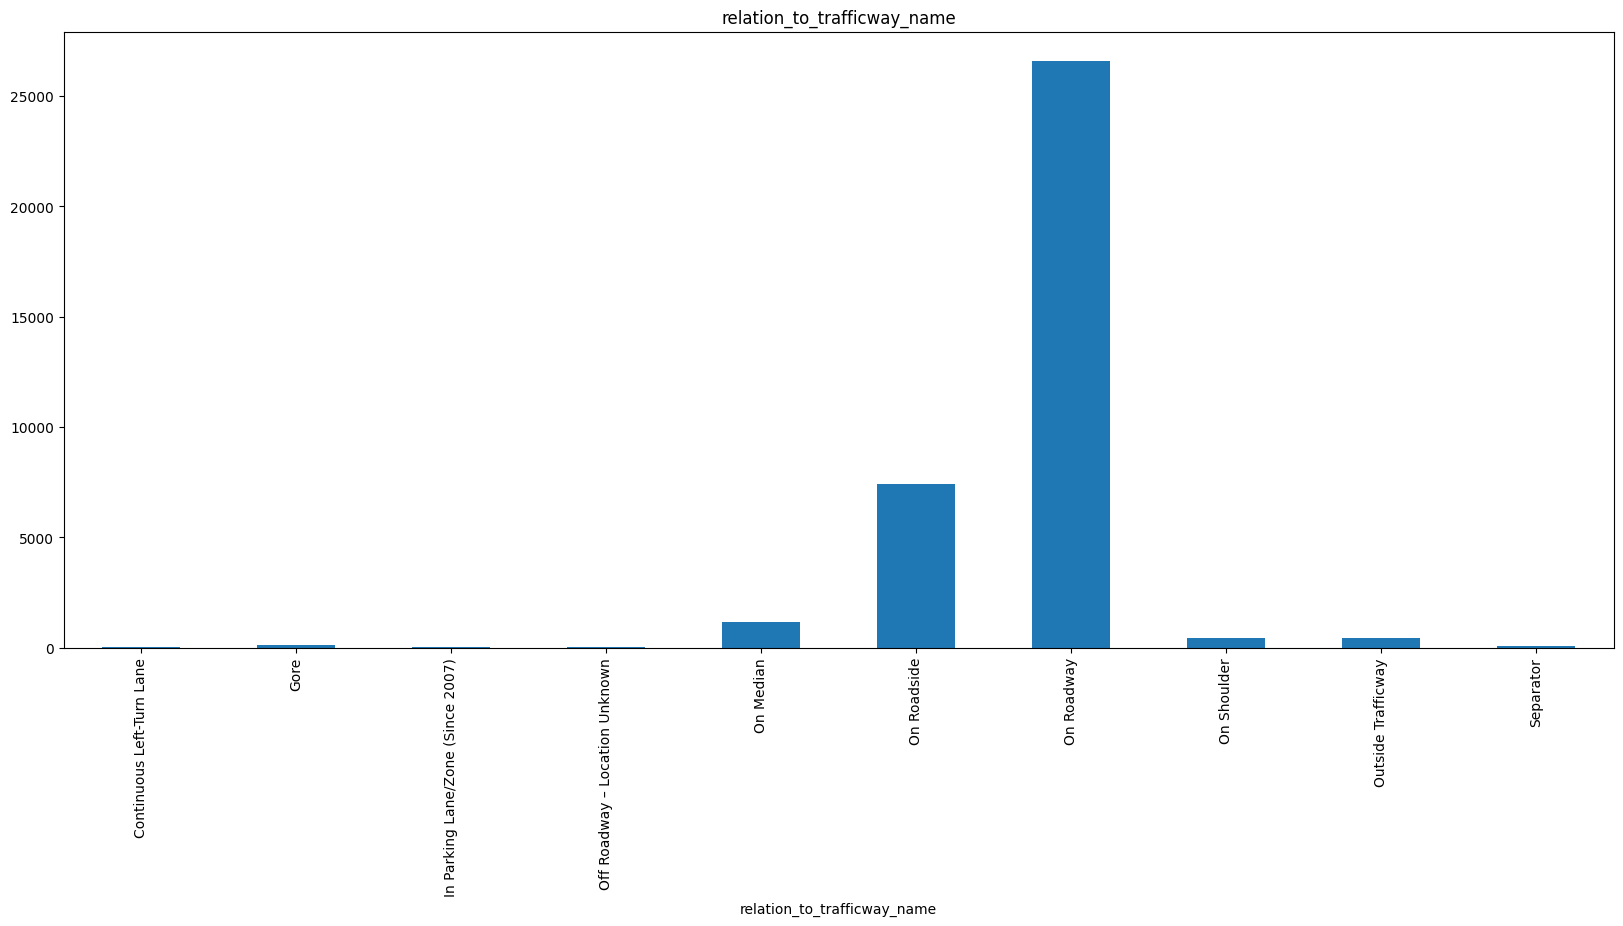

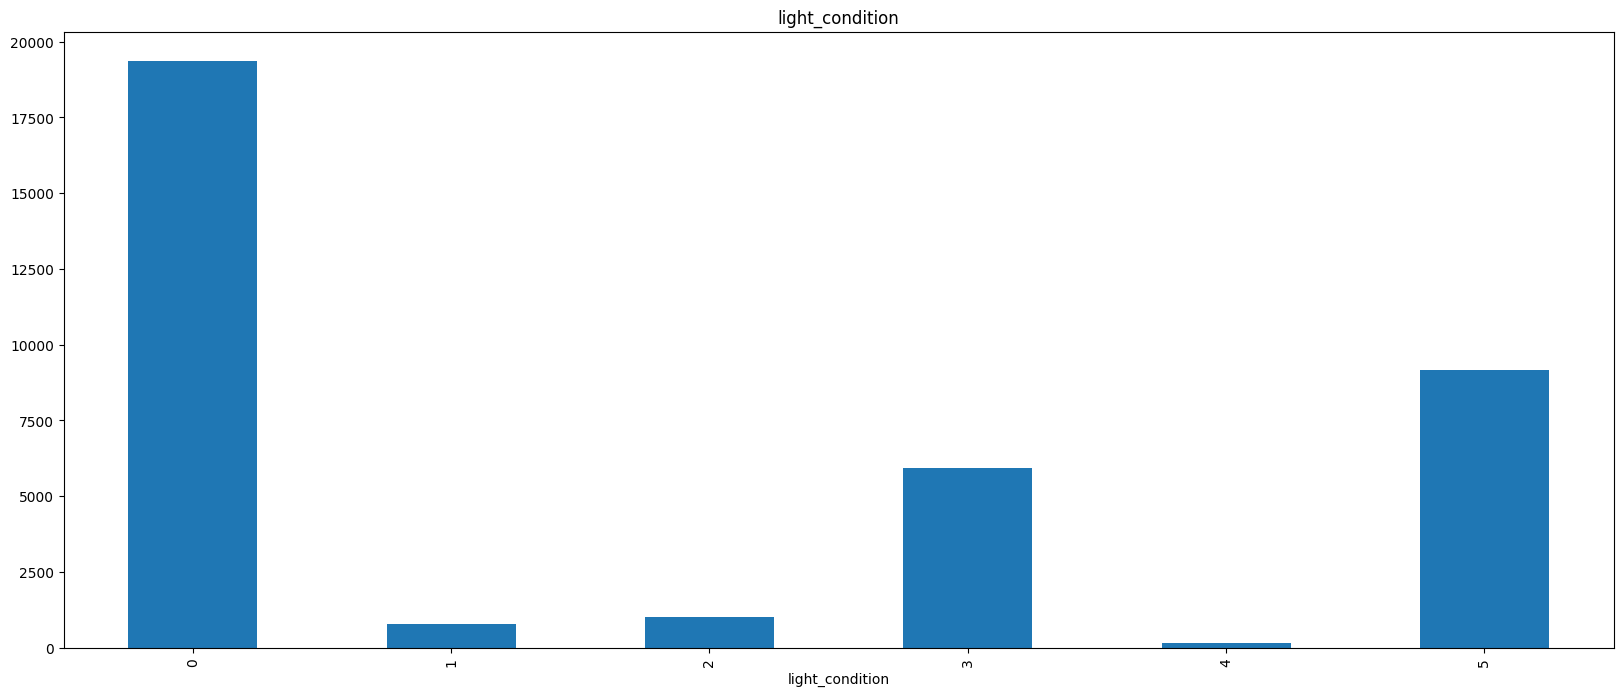

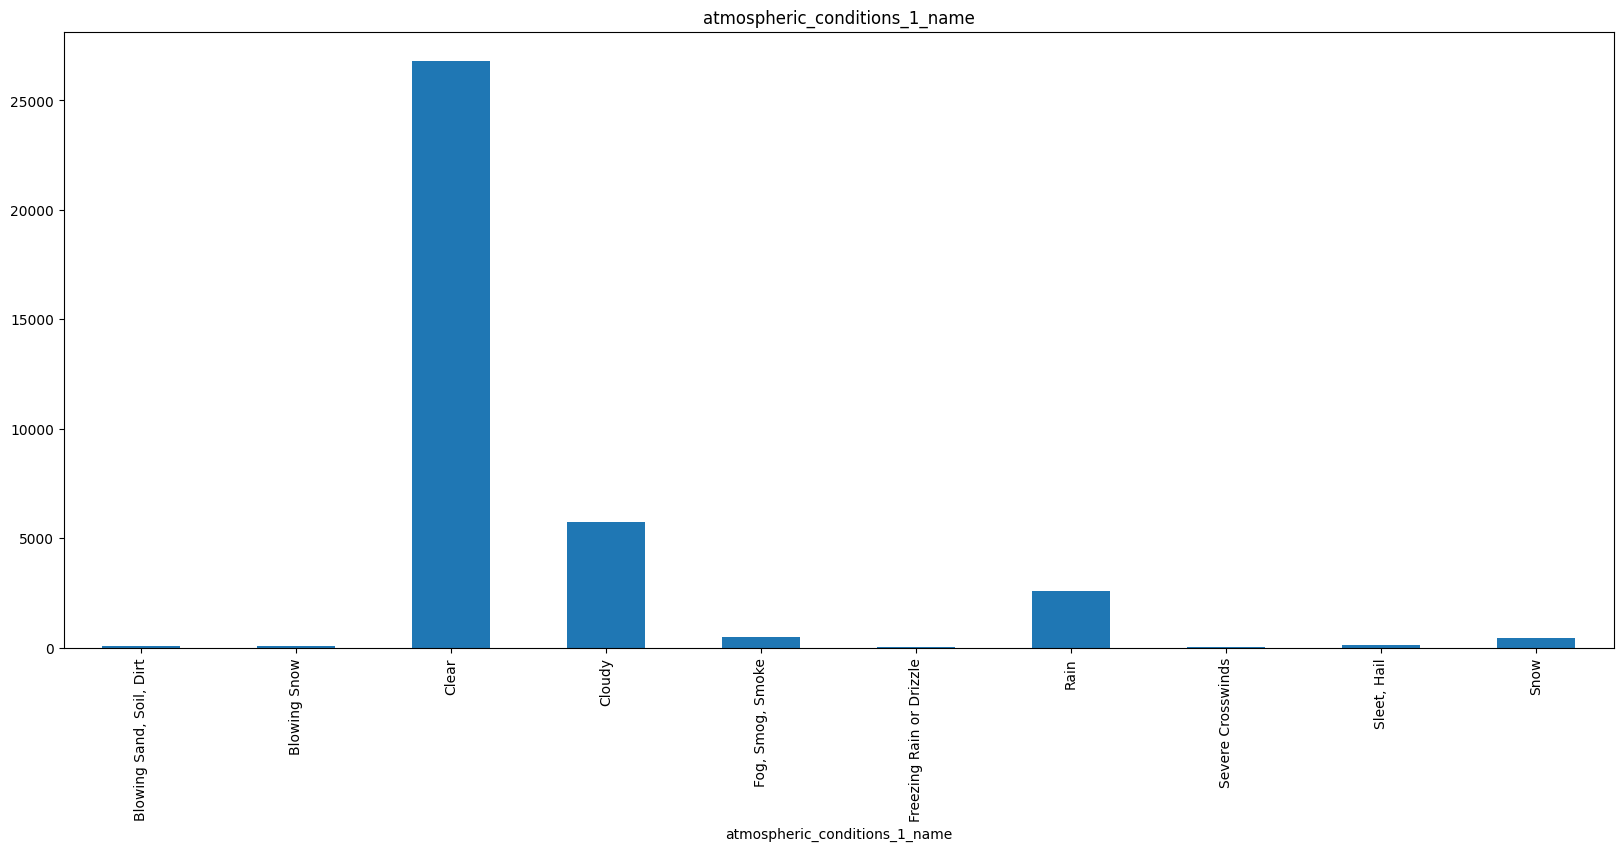

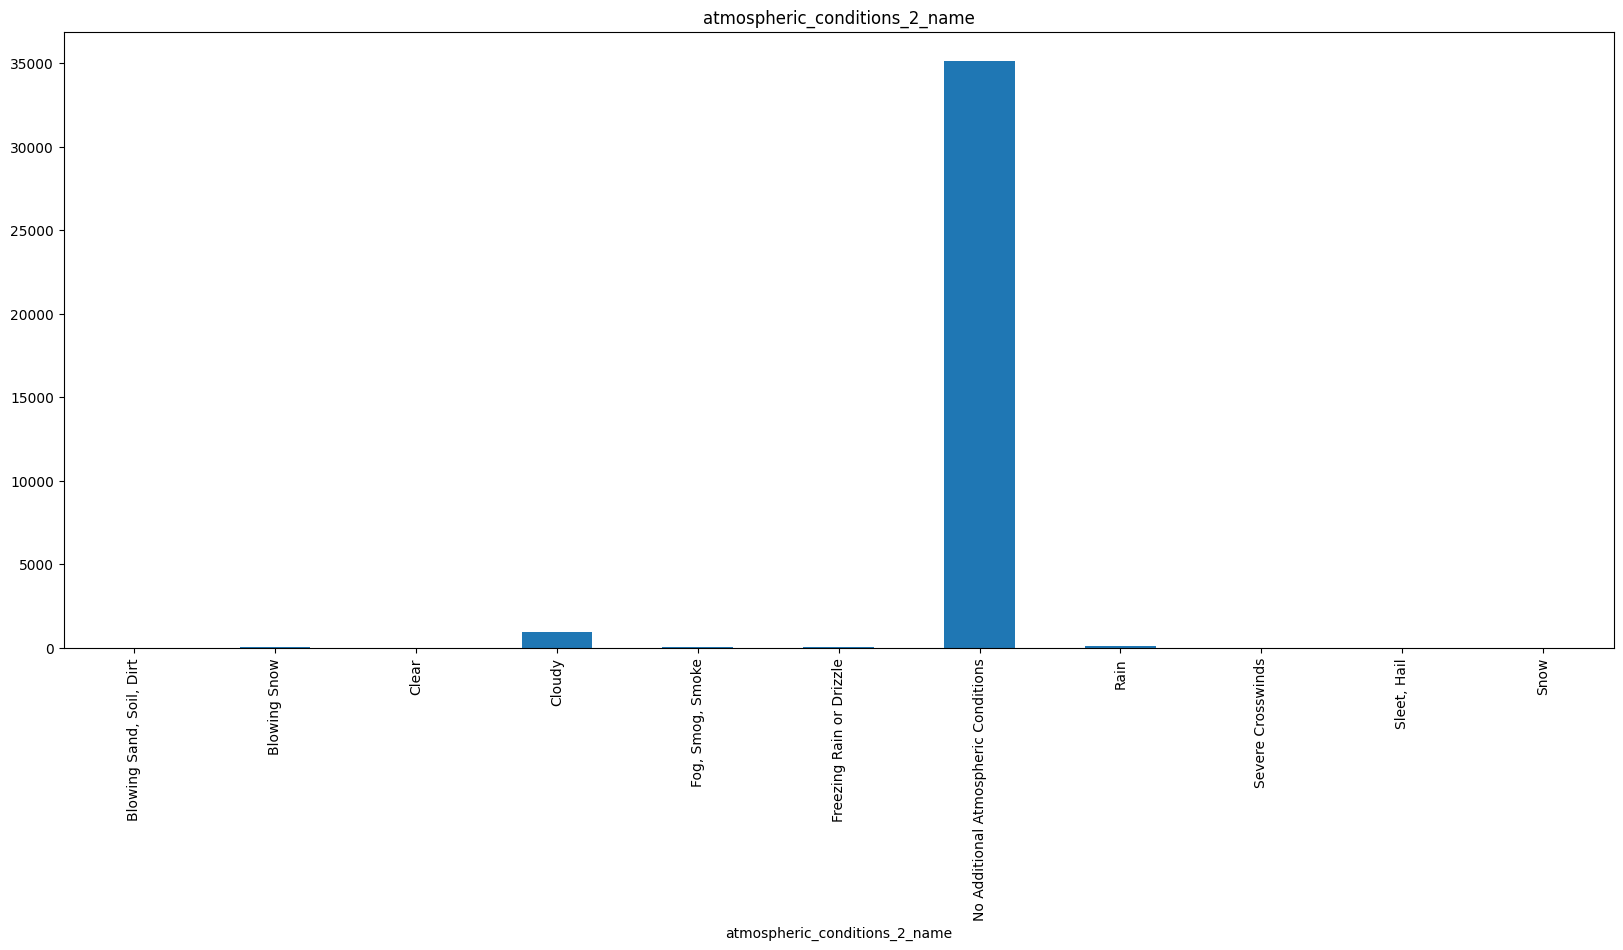

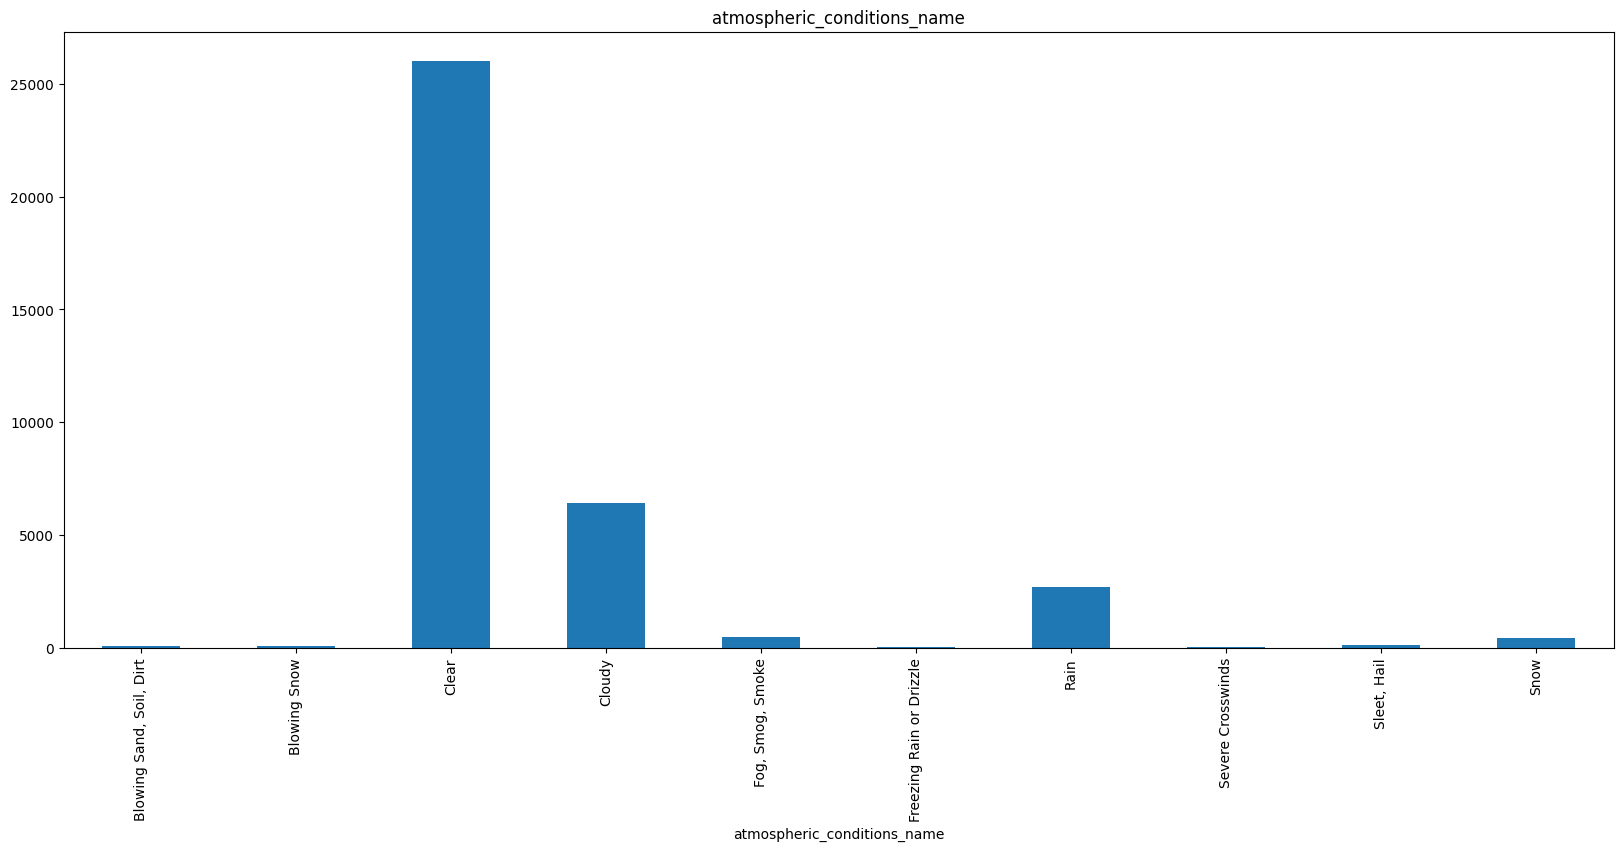

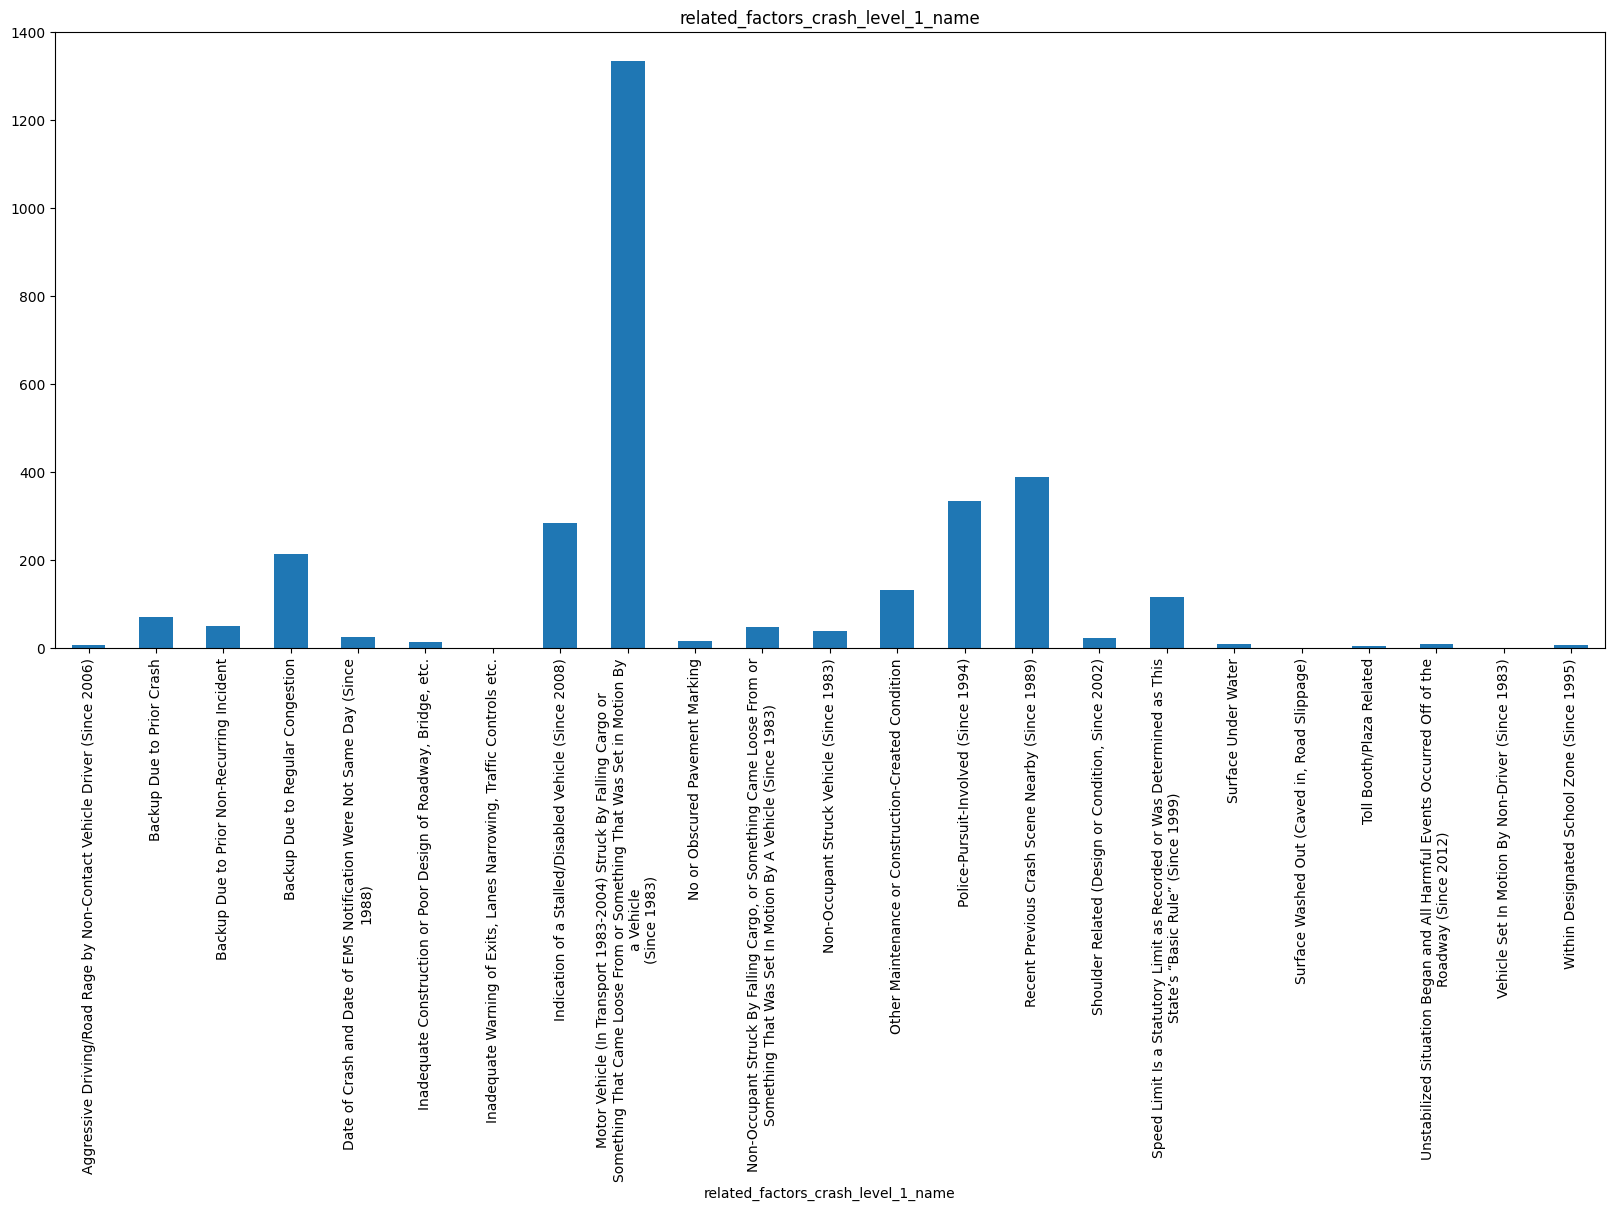

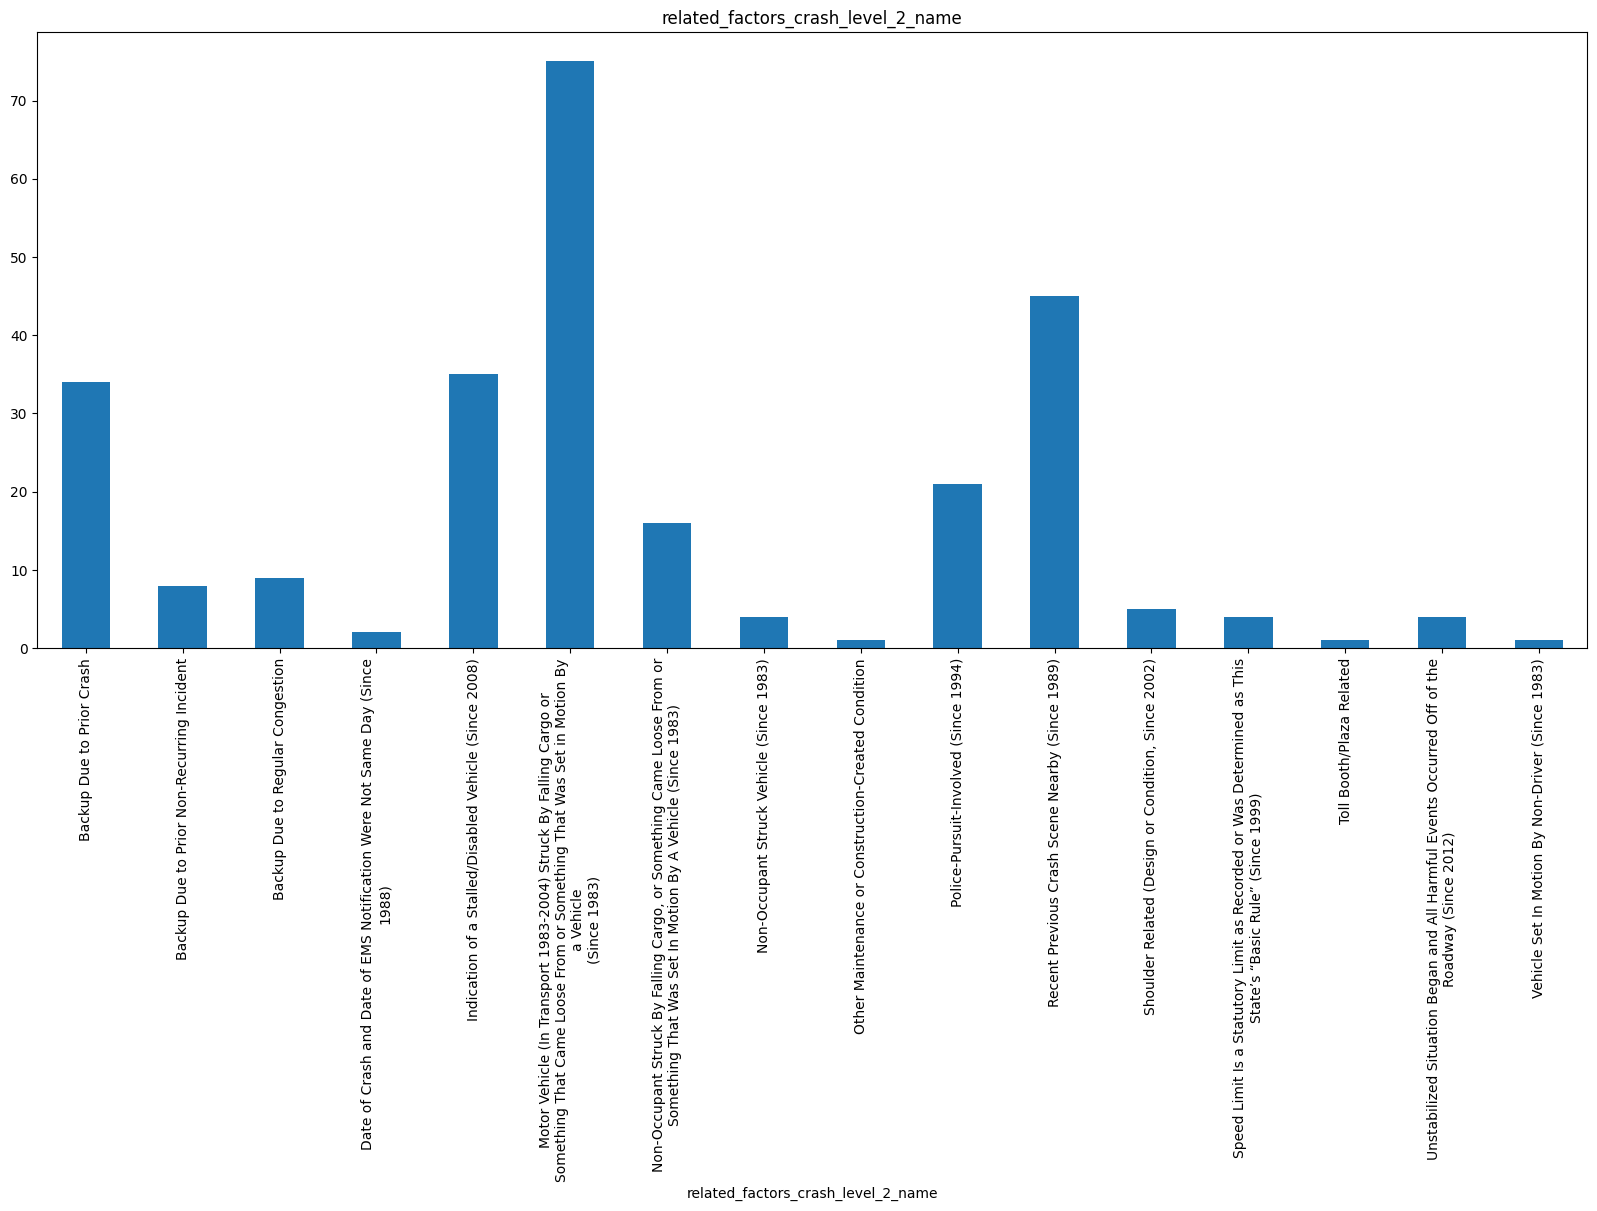

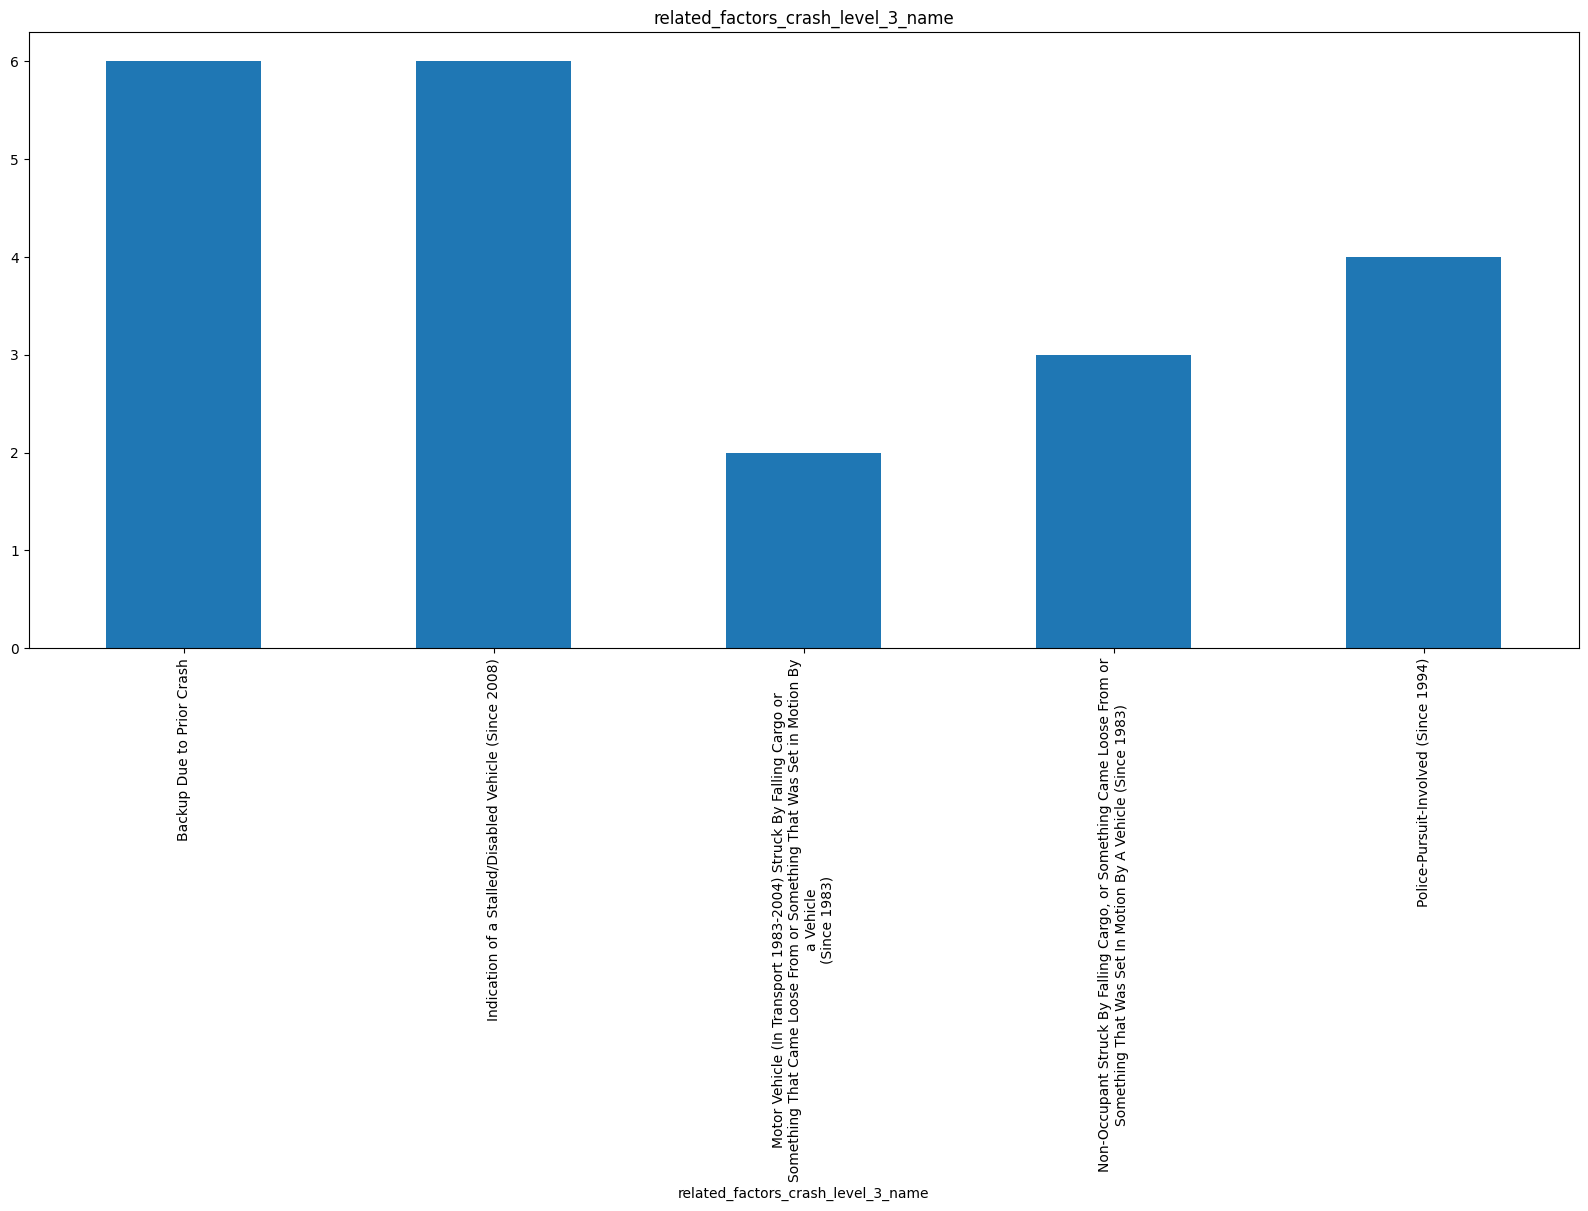

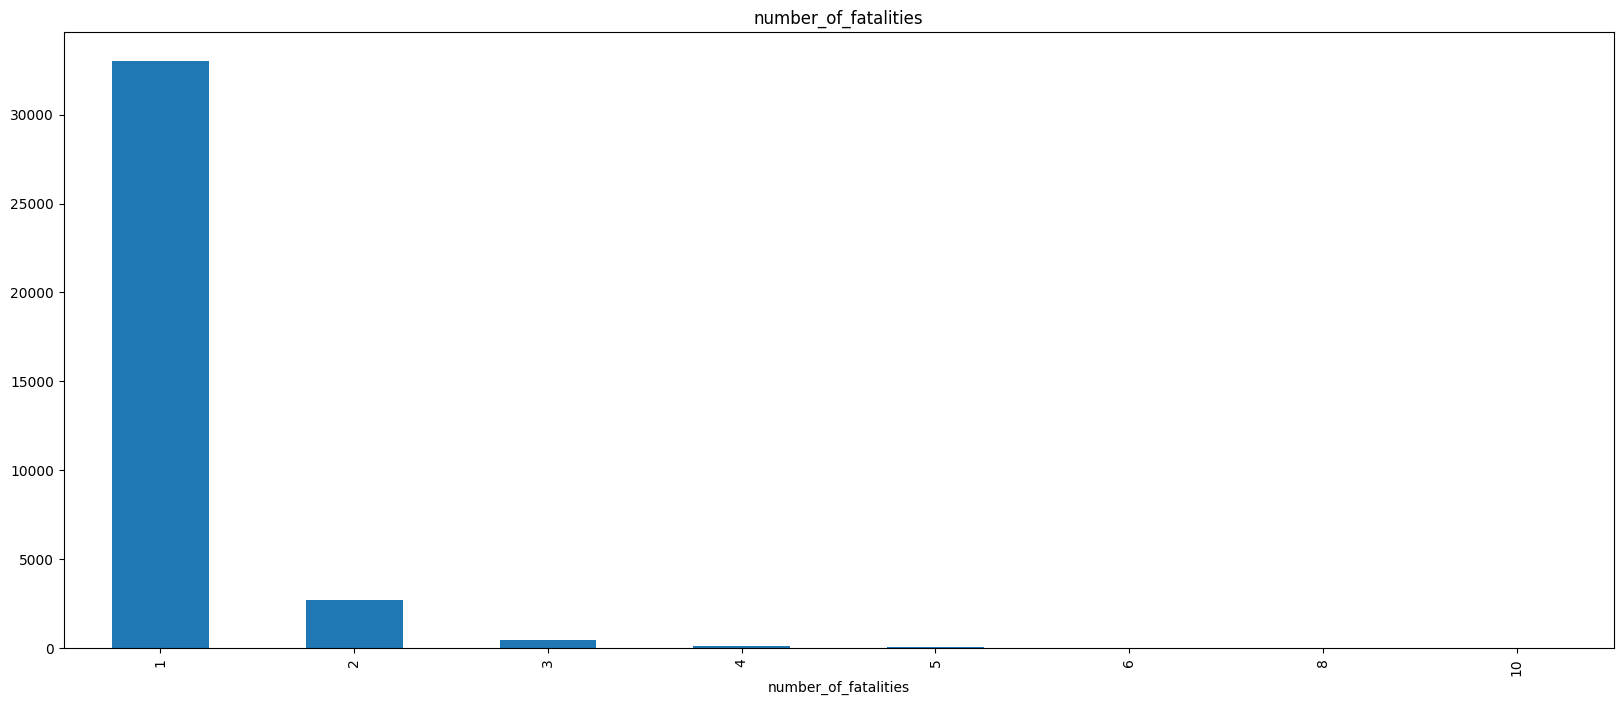

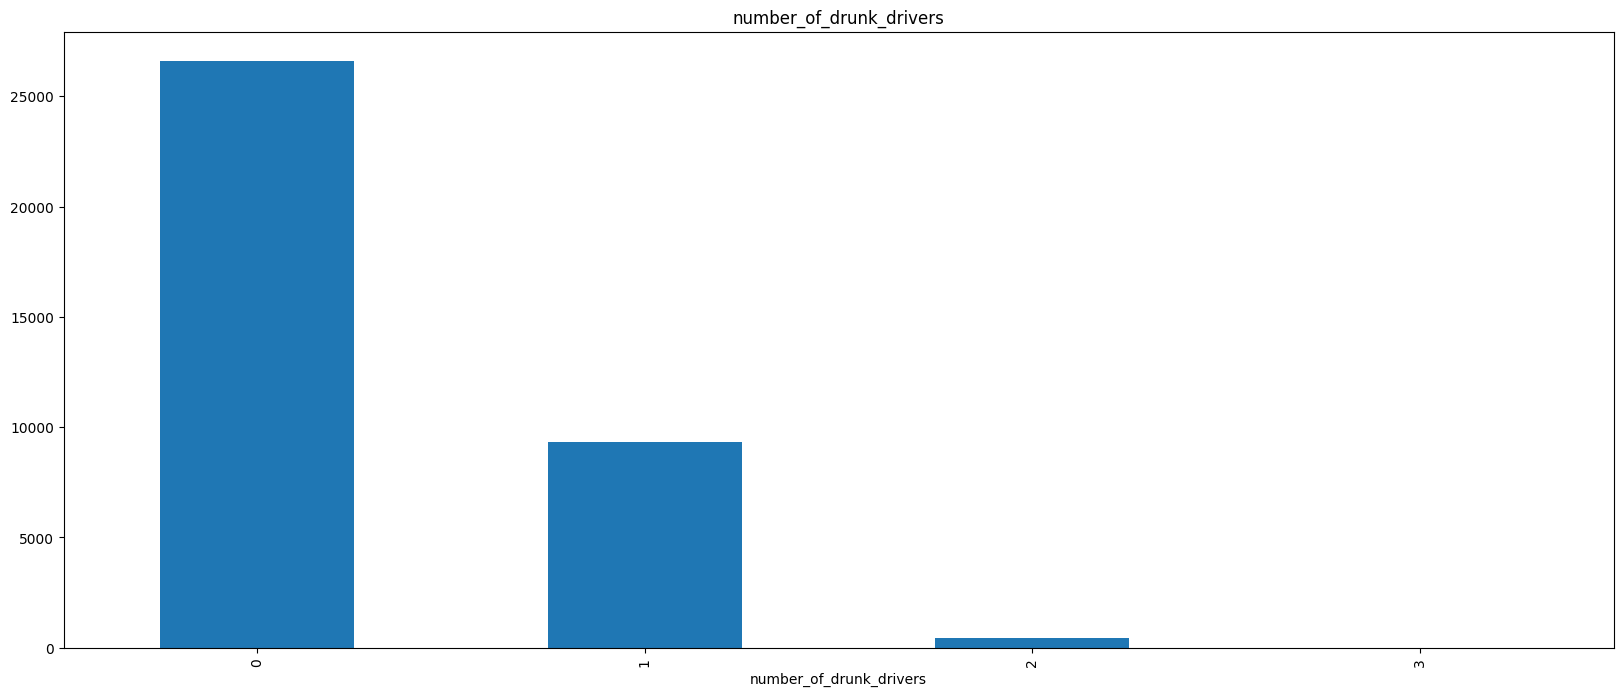

In [17]:
# print out bar graphs
for column in df.columns:
    if column == 'hour_of_crash':
        df[column].hist(bins=24, figsize=(20,8))
    elif column in ['latitude', 'longitude']:
        df[column].hist(bins=20, figsize=(20,8))
    else:
        df[column].value_counts().sort_index(ascending=True).plot.bar(figsize=(20,8))
    plt.title(column)
    plt.show()

In [18]:
# make a dict of features to convert to boolean and the values on which to convert to false
cols_to_bool = {'hit_and_run': 'No',
                'vehicle_trailing': 'No Trailing Unit',
                'hazardous_material_involvement': 'No',
                'bus_use': 'Not a Bus',
                'rollover': 'No Rollover',
                'fire_occurrence': 'No or Not Reported',
                'speeding_related': 'No',
                'fatalities_in_vehicle': 0,
                'driver_drinking': 'No Drinking',
                'national_highway_system': 0,
                'relation_to_junction_within_interchange_area': 'No'}

In [19]:
# convert certain columns to boolean
for key, value in cols_to_bool.items():
    df.loc[df[key] != value, key] = True
    df.loc[df[key] == value, key] = False
    df[key] = df[key].astype('bool')

C:\Users\Shaief\AppData\Local\Temp\ipykernel_13552\3219566013.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[key] != value, key] = True
C:\Users\Shaief\AppData\Local\Temp\ipykernel_13552\3219566013.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[key] != value, key] = True


In [20]:
# make a list of columns to one-hot encode
cols_to_oh_encode = ['first_harmful_event_name',
                     'manner_of_collision_name',
                     'registration_state_name',
                     'registered_vehicle_owner_name',
                     'vehicle_make_name',
                     'vehicle_model',
                     'body_type_name',
                     'jackknife',
                     'cargo_body_type_name',
                     'underride_override',
                     'location_of_rollover',
                     'initial_contact_point',
                     'extent_of_damage',
                     'most_harmful_event',
                     'related_factors_vehicle_level_1',
                     'related_factors_vehicle_level_2',
                     'drivers_license_state',
                     'non_cdl_license_type',
                     'compliance_with_cdl_endorsements',
                     'compliance_with_license_restrictions',
                     'previous_recorded_crashes',
                     'previous_recorded_suspensions_and_revocations',
                     'previous_dwi_convictions',
                     'previous_speeding_convictions',
                     'previous_other_moving_violation_convictions',
                     'related_factors_driver_level_1',
                     'related_factors_driver_level_2',
                     'related_factors_driver_level_3',
                     'related_factors_driver_level_4',
                     'trafficway_description',
                     'speed_limit',
                     'roadway_alignment',
                     'roadway_grade',
                     'roadway_surface_type',
                     'roadway_surface_condition_name',
                     'traffic_control_device',
                     'traffic_control_device_functioning',
                     'pre_event_movement_prior_to_recognition_of_critical_event',
                     'critical_event_precrash_name',
                     'pre_impact_stability',
                     'pre_impact_location',
                     'crash_type_name',
                     'state_name',
                     'land_use_name',
                     'functional_system_name',
                     'route_signing_name',
                     'relation_to_junction_specific_location_name',
                     'type_of_intersection',
                     'relation_to_trafficway_name',
                     'atmospheric_conditions_1_name',
                     'atmospheric_conditions_2_name',
                     'atmospheric_conditions_name',
                     'related_factors_crash_level_1_name',
                     'related_factors_crash_level_2_name',
                     'related_factors_crash_level_3_name']

In [21]:
# one-hot encode the columns
df = pd.get_dummies(df, columns=cols_to_oh_encode)

In [22]:
# reset the index
df.reset_index(inplace=True, drop=True)

In [23]:
# create a function to remove special characters from column names to prevent errors

def format_column_names(df):
    columns = []

    for col in df.columns:
        column = col
        if col.find(',') != -1:
            column = column.replace(',', '_')
        if col.find('<') != -1:
            column = column.replace('<', 'less than')
        if col.find('[') != -1:
            column = column.replace('[', '(')
        if col.find(']') != -1:
            column = column.replace(']', ')')
        columns.append(column)
    
    return columns

In [24]:
# revise the column names to the formatted ones
df.columns = format_column_names(df)

In [25]:
# export to CSV for modeling
df.to_csv('../data/accident_vehicle_2015_formatted.csv', index=None)

## Save the 2016 data in a similar manner:

In [26]:
# do the same for the 2016 data
# import 2016 data to test model
vehicle_2016 = pd.read_csv('../data/vehicle_2016.csv')
accident_2016 = pd.read_csv('../data/accident_2016.csv')

vehicle_2016_formatted = vehicle_2016.drop(cols_to_drop_vehicle, axis=1)
accident_2016_formatted = accident_2016.drop(cols_to_drop_accident, axis=1)

C:\Users\Shaief\AppData\Local\Temp\ipykernel_13552\4089930859.py:3: DtypeWarning: Columns (41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_2016 = pd.read_csv('../data/vehicle_2016.csv')


In [27]:
df_2016 = vehicle_2016_formatted.merge(accident_2016_formatted,
                                       how='left',
                                       on='consecutive_number',
                                       suffixes=(),
                                       copy=True)

In [28]:
# drop the rows that have values that will not be used
for key, values in rows_to_remove.items():
    df_2016.drop(df_2016.loc[df_2016[key].isin(values)].index, inplace=True)

# drop more columns
df_2016.drop('consecutive_number', axis=1, inplace=True)

In [29]:
# add minutes to the hour column, then drop
df_2016['hour_of_crash'] = df_2016['hour_of_crash'] + (df_2016['minute_of_crash'] / 60)
df_2016.drop('minute_of_crash', axis=1, inplace=True)

In [30]:
# Convert certain columns to boolean
for key, value in cols_to_bool.items():
    df_2016.loc[df_2016[key] != value, key] = True
    df_2016.loc[df_2016[key] == value, key] = False
    df_2016[key] = df_2016[key].astype('bool')

C:\Users\Shaief\AppData\Local\Temp\ipykernel_13552\409094080.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_2016.loc[df_2016[key] != value, key] = True
C:\Users\Shaief\AppData\Local\Temp\ipykernel_13552\409094080.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_2016.loc[df_2016[key] != value, key] = True


In [31]:
# one-hot encode the columns
df_2016 = pd.get_dummies(df_2016, columns=cols_to_oh_encode)

In [32]:
# change the values for days of the week
df_2016['day_of_week'] = df_2016['day_of_week'] - 1
df_2016[df_2016['day_of_week'] == 0]['day_of_week'] = 7

C:\Users\Shaief\AppData\Local\Temp\ipykernel_13552\2380806593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016[df_2016['day_of_week'] == 0]['day_of_week'] = 7


In [33]:
# convert the categorical values of the lighting conditions to an ordinal one
# multiply all values by 10 to avoid any overlapping
df_2016['light_condition'] = df_2016['light_condition'] * 10


for key, value in light_dict.items():
    df_2016.loc[df_2016['light_condition'] == key, 'light_condition'] = value

In [34]:
# reset the index
df_2016.reset_index(inplace=True, drop=True)

In [35]:
# revise the column names to the formatted ones
df_2016.columns = format_column_names(df_2016)

In [36]:
# export to CSV for testing
df_2016.to_csv('../data/accident_vehicle_2016_formatted.csv', index=None)

## Format and save accident tables only:

In [37]:
# create a list of columns to drop based on preliminary analysis of the CSV files (done outside of coding using MS Excel)
cols_to_drop_accident_only = ['state_number',
                              'consecutive_number',
                              'number_of_vehicle_forms_submitted_all',
                              'number_of_motor_vehicles_in_transport_mvit',
                              'number_of_forms_submitted_for_persons_in_motor_vehicles',
                              'county',
                              'city',
                              'land_use',
                              'functional_system',
                              'ownership',
                              'ownership_name',
                              'route_signing',
                              'trafficway_identifier',
                              'trafficway_identifier_2',
                              'milepoint',
                              'special_jurisdiction',
                              'special_jurisdiction_name',
                              'first_harmful_event',
                              'manner_of_collision',
                              'relation_to_junction_specific_location',
                              'work_zone',
                              'relation_to_trafficway',
                              'light_condition_name',
                              'atmospheric_conditions_1',
                              'atmospheric_conditions_2',
                              'atmospheric_conditions',
                              'school_bus_related',
                              'rail_grade_crossing_identifier',
                              'hour_of_notification',
                              'minute_of_notification',
                              'hour_of_arrival_at_scene',
                              'minute_of_arrival_at_scene',
                              'hour_of_ems_arrival_at_hospital',
                              'minute_of_ems_arrival_at_hospital',
                              'related_factors_crash_level_1',
                              'related_factors_crash_level_2',
                              'related_factors_crash_level_3',
                              'timestamp_of_crash',
                              'year_of_crash']

In [38]:
# create two new dataframes for accident data only and drop the features that aren't required
accident_2015_formatted = accident_2016.drop(cols_to_drop_accident_only, axis=1)
accident_2016_formatted = accident_2016.drop(cols_to_drop_accident_only, axis=1)

In [39]:
# drop the rows that have values that will not be used
for key, values in rows_to_remove.items():
    if key in accident_2015_formatted.columns:
        accident_2015_formatted.drop(accident_2015_formatted.loc[accident_2015_formatted[key].isin(values)].index, inplace=True)
    if key in accident_2016_formatted.columns:
        accident_2016_formatted.drop(accident_2016_formatted.loc[accident_2016_formatted[key].isin(values)].index, inplace=True)

In [40]:
# add minutes to the hour column, then drop
accident_2015_formatted['hour_of_crash'] = accident_2015_formatted['hour_of_crash'] + (accident_2015_formatted['minute_of_crash'] / 60)
accident_2015_formatted.drop('minute_of_crash', axis=1, inplace=True)
accident_2016_formatted['hour_of_crash'] = accident_2016_formatted['hour_of_crash'] + (accident_2016_formatted['minute_of_crash'] / 60)
accident_2016_formatted.drop('minute_of_crash', axis=1, inplace=True)

In [41]:
# convert certain columns to boolean
for key, value in cols_to_bool.items():
    if key in accident_2015_formatted.columns:
        accident_2015_formatted.loc[accident_2015_formatted[key] != value, key] = True
        accident_2015_formatted.loc[accident_2015_formatted[key] == value, key] = False
        accident_2015_formatted[key] = accident_2015_formatted[key].astype('bool')
    if key in accident_2016_formatted.columns:
        accident_2016_formatted.loc[accident_2016_formatted[key] != value, key] = True
        accident_2016_formatted.loc[accident_2016_formatted[key] == value, key] = False
        accident_2016_formatted[key] = accident_2016_formatted[key].astype('bool')

C:\Users\Shaief\AppData\Local\Temp\ipykernel_13552\833470157.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  accident_2015_formatted.loc[accident_2015_formatted[key] != value, key] = True
C:\Users\Shaief\AppData\Local\Temp\ipykernel_13552\833470157.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  accident_2016_formatted.loc[accident_2016_formatted[key] != value, key] = True


In [42]:
# make an empty list of columns to one-hot encode based on previous list, append only features that are in the accident tables, then one-hot encode the columns in the accident table

cols_to_oh_encode_accident_only = []

for col in cols_to_oh_encode:
    if col in accident_2015_formatted.columns:
        cols_to_oh_encode_accident_only.append(col)

accident_2015_formatted = pd.get_dummies(accident_2015_formatted, columns=cols_to_oh_encode_accident_only)
accident_2016_formatted = pd.get_dummies(accident_2016_formatted, columns=cols_to_oh_encode_accident_only)

In [43]:
# change the values for days of the week
accident_2015_formatted['day_of_week'] = accident_2015_formatted['day_of_week'] - 1
accident_2015_formatted[accident_2015_formatted['day_of_week'] == 0]['day_of_week'] = 7
accident_2016_formatted['day_of_week'] = accident_2016_formatted['day_of_week'] - 1
accident_2016_formatted[accident_2016_formatted['day_of_week'] == 0]['day_of_week'] = 7

C:\Users\Shaief\AppData\Local\Temp\ipykernel_13552\2915128674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_2015_formatted[accident_2015_formatted['day_of_week'] == 0]['day_of_week'] = 7
C:\Users\Shaief\AppData\Local\Temp\ipykernel_13552\2915128674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_2016_formatted[accident_2016_formatted['day_of_week'] == 0]['day_of_week'] = 7


In [44]:
# convert the categorical values of the lighting conditions to an ordinal one
# multiply all values by 10 to avoid any overlapping
accident_2015_formatted['light_condition'] = accident_2015_formatted['light_condition'] * 10
for key, value in light_dict.items():
    accident_2015_formatted.loc[accident_2015_formatted['light_condition'] == key, 'light_condition'] = value
    
accident_2016_formatted['light_condition'] = accident_2016_formatted['light_condition'] * 10
for key, value in light_dict.items():
    accident_2016_formatted.loc[accident_2016_formatted['light_condition'] == key, 'light_condition'] = value

In [45]:
# reset the index
accident_2015_formatted.reset_index(inplace=True, drop=True)
accident_2016_formatted.reset_index(inplace=True, drop=True)

In [46]:
# revise the column names to the formatted ones
accident_2015_formatted.columns = format_column_names(accident_2015_formatted)
accident_2016_formatted.columns = format_column_names(accident_2016_formatted)

In [47]:
# export to CSVs
accident_2015_formatted.to_csv('../data/accident_2015_formatted.csv', index=None)
accident_2016_formatted.to_csv('../data/accident_2016_formatted.csv', index=None)